In [1]:
import matplotlib, os
matplotlib.use('Agg')
%matplotlib inline
from gather_metrics import *

model_directory = '../../../job_results_small/'
class_dirs = [model_directory+'/random_forest/stage_1/',
              model_directory+'/irv/stage_1/',
              model_directory+'/light_chem/stage_1/',
              model_directory+'/neural_networks/stage_1/',
              model_directory+'/docking/stage_1/']
k = 5

In [2]:
#setup gather matrix
gather_df = gather_dir_metrics(class_dirs[0], k)     
gather_df = gather_df.append(gather_dir_metrics(class_dirs[1], k))   
gather_df = gather_df.append(gather_dir_metrics(class_dirs[2], k))   
gather_df = gather_df.append(gather_dir_metrics(class_dirs[3], 20))
gather_df = gather_df.append(gather_dir_metrics(class_dirs[4], k))

gather_df = gather_df.dropna(axis=0)

col_indices = list(range(10)) + list(range(15, 20)) + list(range(25, 65)) + list(range(145, 149)) + list(range(150, 183))
col_indices = [i for i in col_indices if 'Mean' not in gather_df.columns[i] and 'Median' not in gather_df.columns[i]]
metric_names = list(gather_df.columns.values[col_indices])

#get tukey results
tukey_dict = tukey_multi_metrics(gather_df, col_indices=col_indices)
tukey_analysis_dict = analyze_tukey_dict(tukey_dict)
#setup comparison matrix and overlaps
tukey_dict = tukey_multi_metrics(gather_df)
tukey_analysis_dict = analyze_tukey_dict(tukey_dict)
mm_comp_dicts = get_mean_median_comps(gather_df)
agg_comp_dict = get_agg_comp(mm_comp_dicts, tukey_analysis_dict, mean_w=0, median_w=0, tukey_w=1)
overlapping_models = get_overlap(agg_comp_dict, N=1)

C:\Users\Moeman\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3578: RuntimeWarning: Invalid value encountered in median for 185 results
  RuntimeWarning)
C:\Users\Moeman\Anaconda3\lib\site-packages\pandas\core\generic.py:1765: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self.ix[indexer]
C:\Users\Moeman\Anaconda3\lib\site-packages\pandas\core\indexing.py:796: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_lowerdim(tup)


---
## Model Ordering by Metric (Best-to-Worst)
Shows table with model-winscore pairs in the cells.

In [3]:
ordered_df = get_model_ordering(agg_comp_dict, metric_names)
ordered_df

ROC AUC PriA-SSB AS                ROC AUC PriA-SSB FP  \
0                          CBF_b, 1.0            SingleRegression_b, 1.0   
1                          CBF_c, 1.0            SingleRegression_a, 1.0   
2                          CBF_f, 1.0                         CBF_c, 3.0   
3             SingleRegression_b, 4.0                         CBF_b, 4.0   
4                 RandomForest_d, 4.0                         CBF_f, 5.0   
5                          CBF_d, 4.0                         CBF_a, 5.0   
6                          CBF_e, 4.0                         CBF_d, 7.0   
7                          CBF_a, 4.0                         CBF_e, 7.0   
8                 RandomForest_e, 4.0         MultiClassification_b, 9.0   
9                 RandomForest_h, 4.0               RandomForest_e, 10.0   
10               RandomForest_c, 11.0               RandomForest_h, 10.0   
11               RandomForest_b, 11.0      ConsensusDocking_median, 12.0   
12               RandomForest_a, 11.0               Docking_hybrid, 12.0   
13        MultiClassification_b, 11.0                 Docking_fred, 12.0   
14        MultiClassification_a, 11.0                Docking_dock6, 12.0   
15       SingleClassification_b, 11.0                  Docking_ad4, 12.0   
16       SingleClassification_a, 11.0  ConsensusDocking_rocauc_opt, 12.0   
17                        IRV_e, 11.0               RandomForest_f, 12.0   
18                        IRV_d, 11.0        ConsensusDocking_mean, 12.0   
19                        IRV_c, 11.0               Docking_plants, 12.0   
20           SingleRegression_a, 11.0    ConsensusDocking_efr1_opt, 12.0   
21               RandomForest_g, 11.0       SingleClassification_a, 12.0   
22               RandomForest_f, 11.0       SingleClassification_b, 12.0   
23                        IRV_a, 24.0         ConsensusDocking_max, 12.0   
24                        IRV_b, 24.0             Docking_rdocktot, 12.0   
25                       LSTM_b, 26.0             Docking_rdockint, 12.0   
26                       LSTM_a, 27.0                Docking_smina, 12.0   
27             Docking_rdocktot, 28.0              Docking_surflex, 12.0   
28         ConsensusDocking_max, 28.0               RandomForest_g, 12.0   
29              Docking_surflex, 28.0                        IRV_b, 12.0   
30                Docking_smina, 28.0                        IRV_c, 12.0   
31    ConsensusDocking_efr1_opt, 28.0                        IRV_d, 12.0   
32        ConsensusDocking_mean, 28.0                        IRV_e, 12.0   
33               Docking_plants, 28.0                       LSTM_a, 12.0   
34      ConsensusDocking_median, 28.0                       LSTM_b, 12.0   
35  ConsensusDocking_rocauc_opt, 28.0        MultiClassification_a, 12.0   
36                  Docking_ad4, 28.0               RandomForest_a, 12.0   
37                Docking_dock6, 28.0               RandomForest_b, 12.0   
38                 Docking_fred, 28.0               RandomForest_c, 12.0   
39               Docking_hybrid, 28.0               RandomForest_d, 12.0   
40             Docking_rdockint, 28.0                        IRV_a, 12.0   

                   ROC AUC RMI-FANCM1             BEDROC AUC PriA-SSB AS  \
0                          CBF_d, 1.0                         CBF_c, 1.0   
1                          CBF_f, 1.0                         CBF_f, 2.0   
2                 RandomForest_h, 1.0                RandomForest_h, 3.0   
3                 RandomForest_g, 1.0                RandomForest_g, 3.0   
4                 RandomForest_f, 1.0                         CBF_d, 3.0   
5                 RandomForest_e, 1.0                         CBF_e, 3.0   
6                 RandomForest_d, 1.0                RandomForest_d, 7.0   
7                 RandomForest_a, 8.0                         CBF_b, 7.0   
8                 RandomForest_b, 8.0                RandomForest_e, 9.0   
9                          CBF_e, 8.0                RandomForest

---
## Metrics Most Similar to N-Hits

In [1]:
get_similar_to_nhits(agg_comp_dict, metric_names[:-21], metric_names[-21:])

NameError: name 'get_similar_to_nhits' is not defined

---
## Overlapping top 1 models over all metrics

In [5]:
overlapping_models

overlap_perc
RandomForest_h              0.239130
SingleRegression_b          0.173913
CBF_c                       0.163043
CBF_d                       0.076087
CBF_b                       0.076087
RandomForest_a              0.054348
RandomForest_b              0.043478
CBF_f                       0.043478
SingleRegression_a          0.043478
CBF_a                       0.032609
RandomForest_c              0.021739
SingleClassification_b      0.010870
RandomForest_g              0.010870
CBF_e                       0.010870

In [6]:
get_overlap(agg_comp_dict, N=5)

overlap_perc
CBF_c                            0.543478
RandomForest_h                   0.532609
RandomForest_g                   0.467391
CBF_b                            0.413043
CBF_d                            0.402174
CBF_f                            0.369565
RandomForest_e                   0.282609
SingleRegression_b               0.239130
RandomForest_d                   0.217391
RandomForest_b                   0.195652
SingleRegression_a               0.184783
CBF_a                            0.173913
RandomForest_c                   0.152174
RandomForest_a                   0.141304
CBF_e                            0.141304
Docking_rdocktot                 0.076087
Docking_rdockint                 0.065217
IRV_d                            0.065217
RandomForest_f                   0.065217
SingleClassification_b           0.054348
ConsensusDocking_rocauc_opt      0.043478
Docking_smina                    0.032609
Docking_surflex                  0.032609
Docking_plants                   0.032609
IRV_e                            0.021739
SingleClassification_a           0.010870
MultiClassification_b            0.010870
IRV_c                            0.010870
IRV_a                            0.010870
IRV_b                            0.010870

## Spearman's Rank-order correlation coefficient 

In [7]:
spearman_df, ordered_spearman_df = get_spearman_r(agg_comp_dict, metric_names[:-21], metric_names[-21:])

C:\Users\Moeman\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2569: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Moeman\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2570: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Moeman\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Moeman\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Moeman\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [8]:
ordered_spearman_df

n_hits_100 PriA-SSB AS n_hits_100 PriA-SSB FP n_hits_100 RMI-FANCM1  \
0                 NEF_1 %                NEF_1 %             NEF_0.5 %   
1                 NEF_2 %                NEF_2 %               NEF_1 %   
2                 NEF_5 %               NEF_10 %               NEF_5 %   
3               NEF_0.5 %                NEF_5 %               NEF_2 %   
4              BEDROC AUC              NEF_0.5 %       PR auc.integral   
5                 NEF AUC             BEDROC AUC            BEDROC AUC   
6                NEF_10 %                ROC AUC            NEF_0.15 %   
7              NEF_0.15 %                NEF AUC             NEF_0.1 %   
8               NEF_0.1 %               NEF_20 %              NEF_10 %   
9                 ROC AUC              NEF_0.1 %               NEF AUC   
10        PR auc.integral        PR auc.integral               ROC AUC   
11               NEF_20 %             NEF_0.15 %              NEF_20 %   

   n_hits_250 PriA-SSB AS n_hits_250 PriA-SSB FP n_hits_250 RMI-FANCM1  \
0                 NEF_2 %                NEF_2 %               NEF_2 %   
1                 NEF_1 %                NEF_5 %               NEF_5 %   
2                 NEF_5 %               NEF_10 %            BEDROC AUC   
3              BEDROC AUC                NEF_1 %               NEF_1 %   
4                 NEF AUC                NEF AUC              NEF_10 %   
5                NEF_10 %                ROC AUC             NEF_0.5 %   
6                 ROC AUC               NEF_20 %               NEF AUC   
7               NEF_0.5 %             BEDROC AUC       PR auc.integral   
8                NEF_20 %              NEF_0.5 %            NEF_0.15 %   
9              NEF_0.15 %              NEF_0.1 %               ROC AUC   
10              NEF_0.1 %        PR auc.integral             NEF_0.1 %   
11        PR auc.integral             NEF_0.15 %              NEF_20 %   

   n_hits_500 PriA-SSB AS n_hits_500 PriA-SSB FP n_hits_500 RMI-FANCM1  \
0                 NEF_5 %                NEF_2 %               NEF_5 %   
1                 NEF_2 %                NEF_5 %               NEF_2 %   
2              BEDROC AUC               NEF_10 %            BEDROC AUC   
3                 NEF AUC                NEF AUC               NEF AUC   
4                 NEF_1 %               NEF_20 %              NEF_10 %   
5                NEF_10 %                ROC AUC               NEF_1 %   
6                 ROC AUC             BEDROC AUC       PR auc.integral   
7                NEF_20 %                NEF_1 %             NEF_0.5 %   
8               NEF_0.5 %              NEF_0.5 %            NEF_0.15 %   
9              NEF_0.15 %              NEF_0.1 %               ROC AUC   
10              NEF_0.1 %        PR auc.integral              NEF_20 %   
11        PR auc.integral             NEF_0.15 %             NEF_0.1 %   

   n_hits_1000 PriA-SSB AS           ...           n_hits_1000 RMI-FANCM1  \
0                 NEF_10 %           ...                       BEDROC AUC   
1                  NEF AUC           ...                         NEF_10 %   
2               BEDROC AUC           ...                          NEF AUC   
3                  NEF_5 %           ...                          NEF_5 %   
4                  ROC AUC           ...                          NEF_2 %   
5                  NEF_2 %           ...                          ROC AUC   
6                  NEF_1 %           ...                  PR auc.integral   
7                 NEF_20 %           ...                         NEF_20 %   
8                NEF_0.5 %           ...                        NEF_0.5 %   
9               NEF_0.15 %           ...                          NEF_1 %   
10               NEF_0.1 %           ...                       NEF_0.15 %   
11         PR auc.integral           ...                        NEF_0.1 %   

   n_hits_2500 PriA-SSB AS n_hits_2500 PriA-SSB FP n_hits_2500 RMI-FANCM1  \
0                 NEF_20 %         

In [9]:
spearman_df

n_hits_100 PriA-SSB AS  n_hits_100 PriA-SSB FP  \
ROC AUC                        0.831730                0.553213   
BEDROC AUC                     0.930293                0.561477   
PR auc.integral                0.815150               -0.044426   
NEF_0.1 %                      0.863134               -0.044426   
NEF_0.15 %                     0.877400                     NaN   
NEF_0.5 %                      0.942528                0.562731   
NEF_1 %                        0.971646                0.793781   
NEF_2 %                        0.948420                0.682325   
NEF_5 %                        0.944130                0.595833   
NEF_10 %                       0.896717                0.601550   
NEF_20 %                       0.778066                0.517982   
NEF AUC                        0.913103                0.533217   

                 n_hits_100 RMI-FANCM1  n_hits_250 PriA-SSB AS  \
ROC AUC                       0.860970                0.902841   
BEDROC AUC                    0.939253                0.974639   
PR auc.integral               0.942532                0.680402   
NEF_0.1 %                     0.907483                0.737758   
NEF_0.15 %                    0.915529                0.772443   
NEF_0.5 %                     0.974998                0.896816   
NEF_1 %                       0.956003                0.983986   
NEF_2 %                       0.945357                0.994037   
NEF_5 %                       0.953865                0.976107   
NEF_10 %                      0.905868                0.946517   
NEF_20 %                      0.816564                0.859772   
NEF AUC                       0.905735                0.957223   

                 n_hits_250 PriA-SSB FP  n_hits_250 RMI-FANCM1  \
ROC AUC                        0.821693               0.890481   
BEDROC AUC                     0.811617               0.961329   
PR auc.integral                0.346659               0.921973   
NEF_0.1 %                      0.346659               0.865616   
NEF_0.15 %                          NaN               0.891636   
NEF_0.5 %                      0.367051               0.930622   
NEF_1 %                        0.858718               0.961110   
NEF_2 %                        0.999594               0.992007   
NEF_5 %                        0.893076               0.967542   
NEF_10 %                       0.891244               0.935995   
NEF_20 %                       0.815854               0.838271   
NEF AUC                        0.828560               0.927667   

                 n_hits_500 PriA-SSB AS  n_hits_500 PriA-SSB FP  \
ROC AUC                        0.918501                0.774566   
BEDROC AUC                     0.980684                0.761624   
PR auc.integral                0.642791                0.424050   
NEF_0.1 %                      0.706945                0.424050   
NEF_0.15 %                     0.746047                     NaN   
NEF_0.5 %                      0.864332                0.424050   
NEF_1 %                        0.956630                0.734450   
NEF_2 %                        0.983297                0.932767   
NEF_5 %                        0.984596                0.845302   
NEF_10 %                       0.954613                0.829984   
NEF_20 %                       0.883622                0.786559   
NEF AUC                        0.969522                0.787378   

                 n_hits_500 RMI-FANCM1  n_hits_1000 PriA-SSB AS  \
ROC AUC                       0.901486                 0.947431   
BEDROC AUC                    0.965622                 0.984714   
PR auc.integral               0.928368                 0.615259   
NEF_0.1 %                     0.864352                 0.651718   
NEF_0.15 %                    0.909031                 0.698583   
NEF_0.5 %                     0.927319                 0.834929   
NEF_1 %                       0.932243                 0.936018   
NEF_2 %            

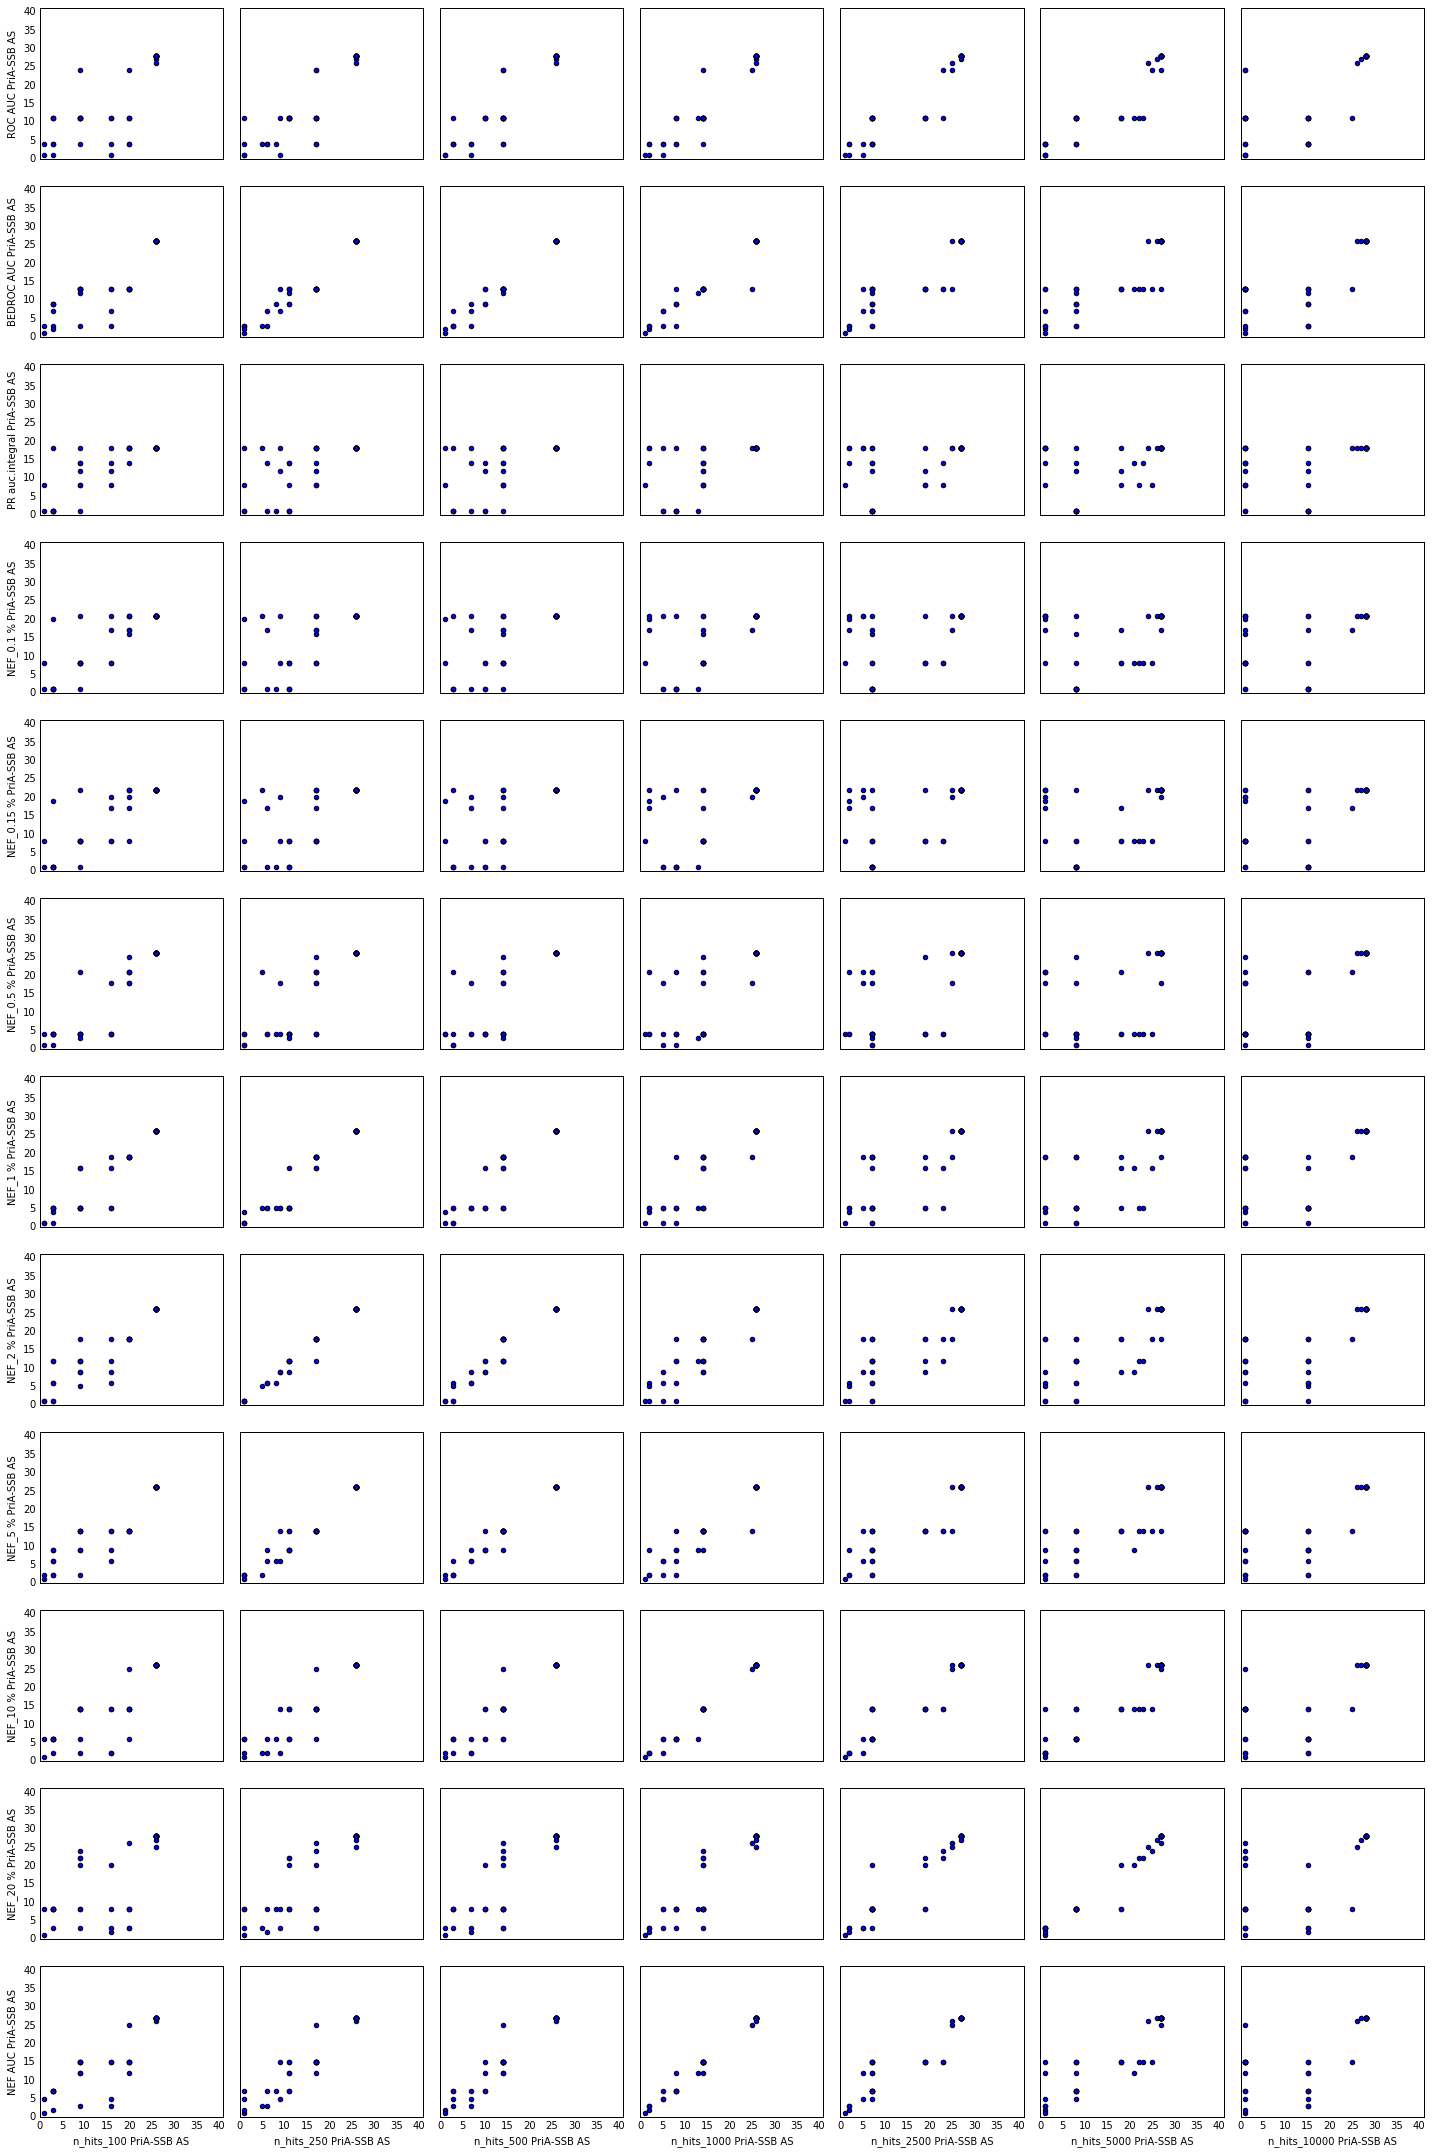

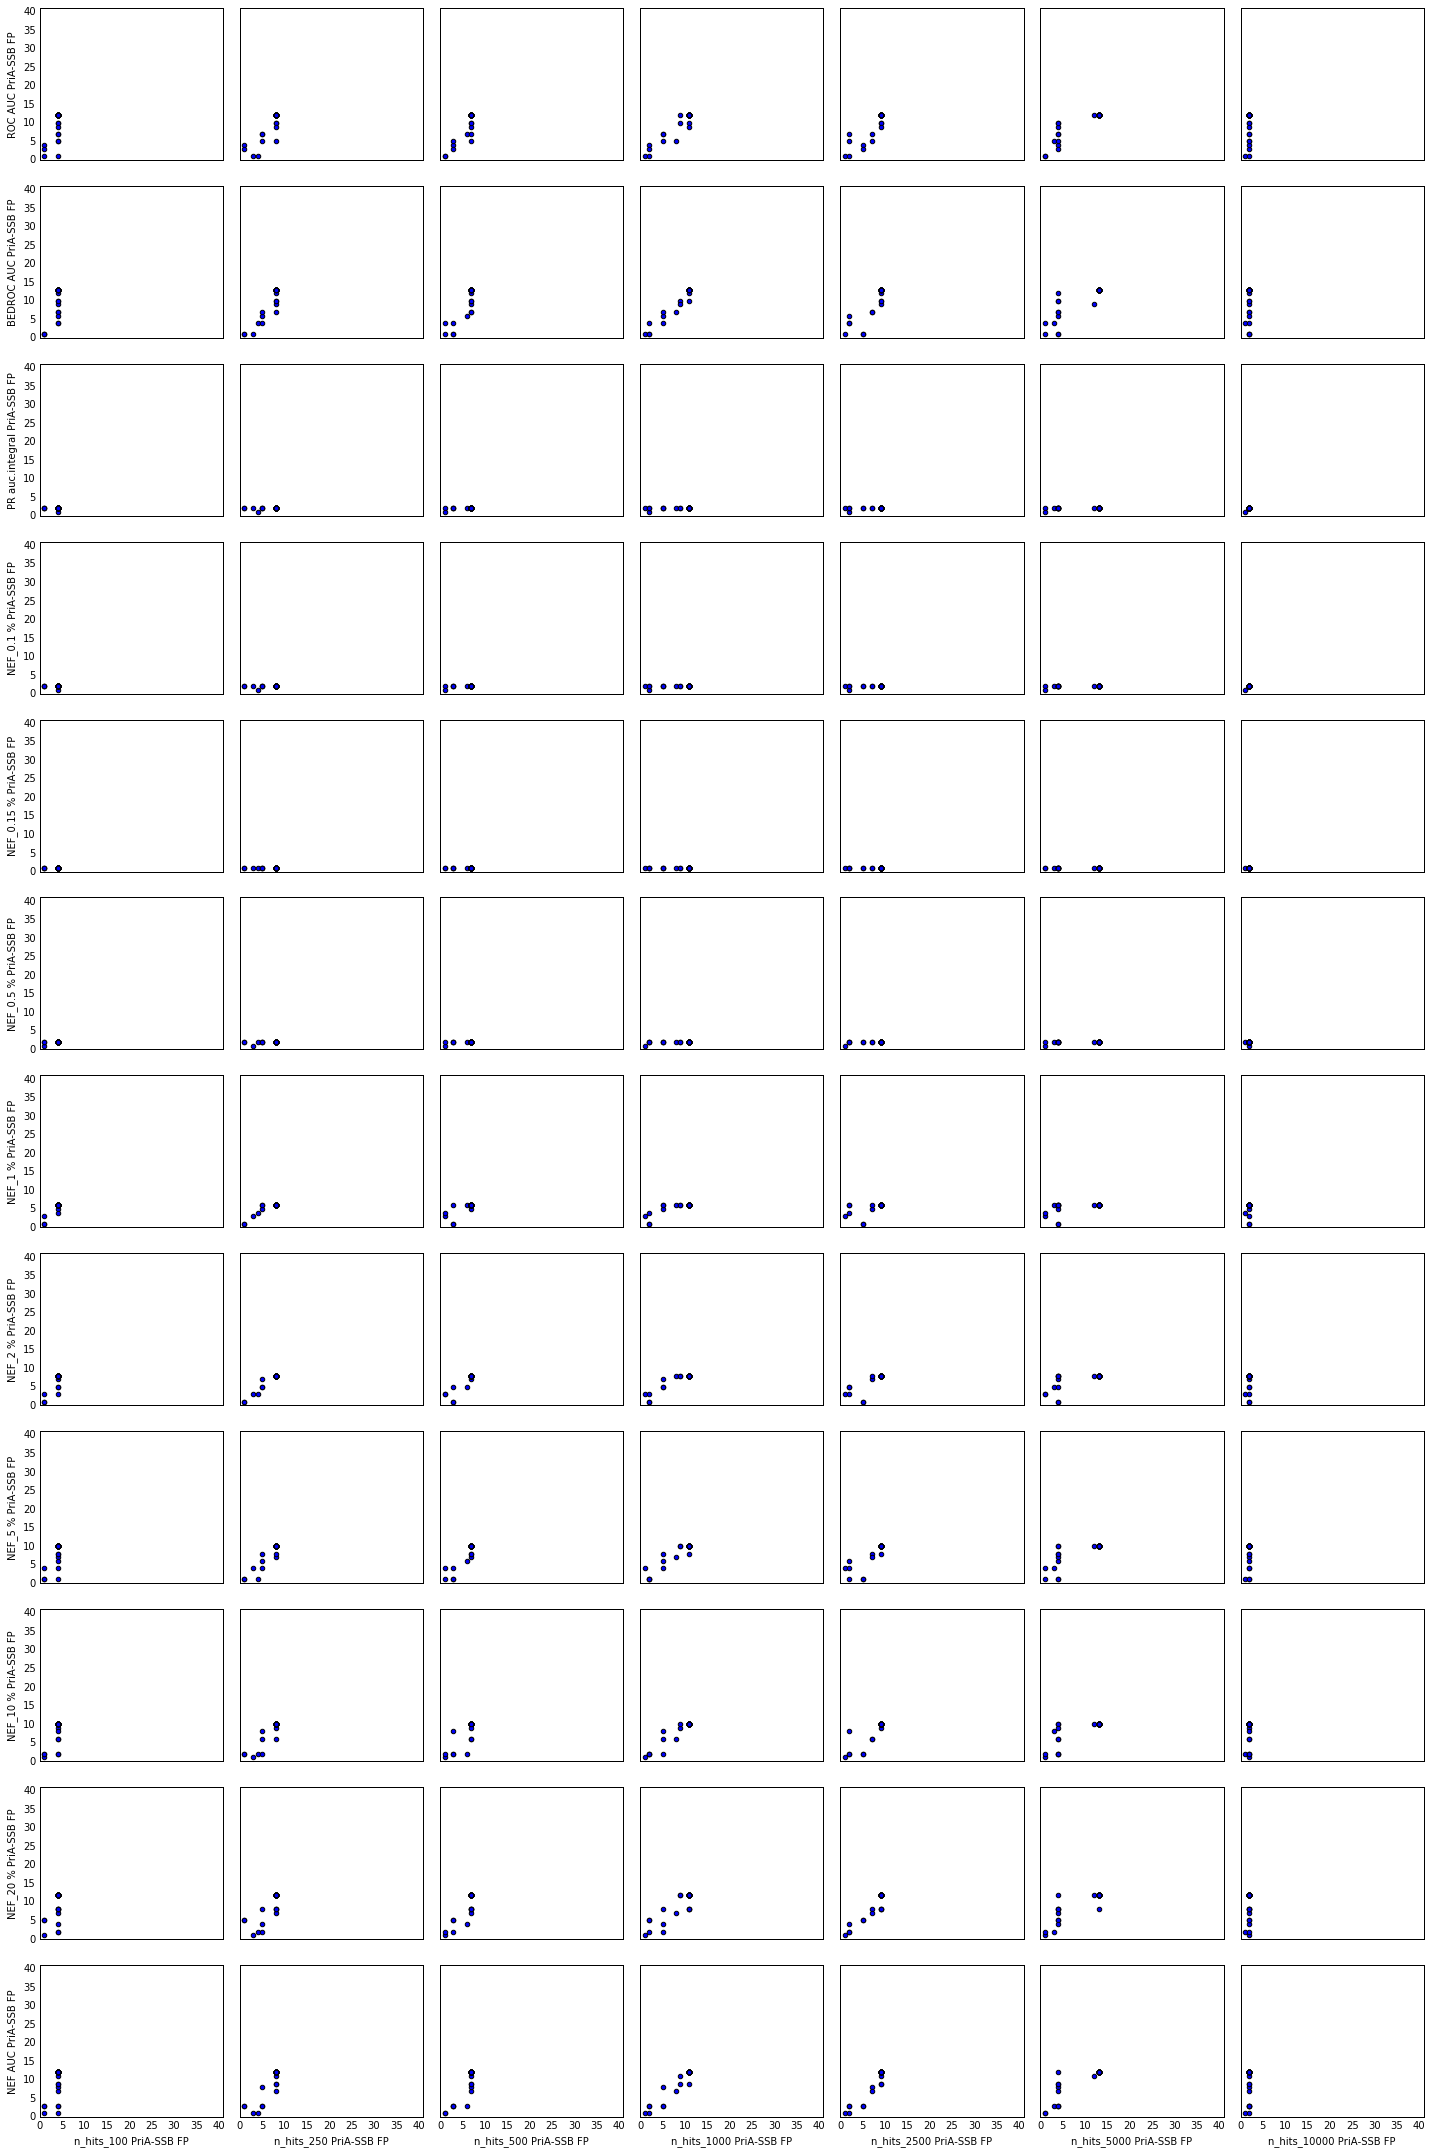

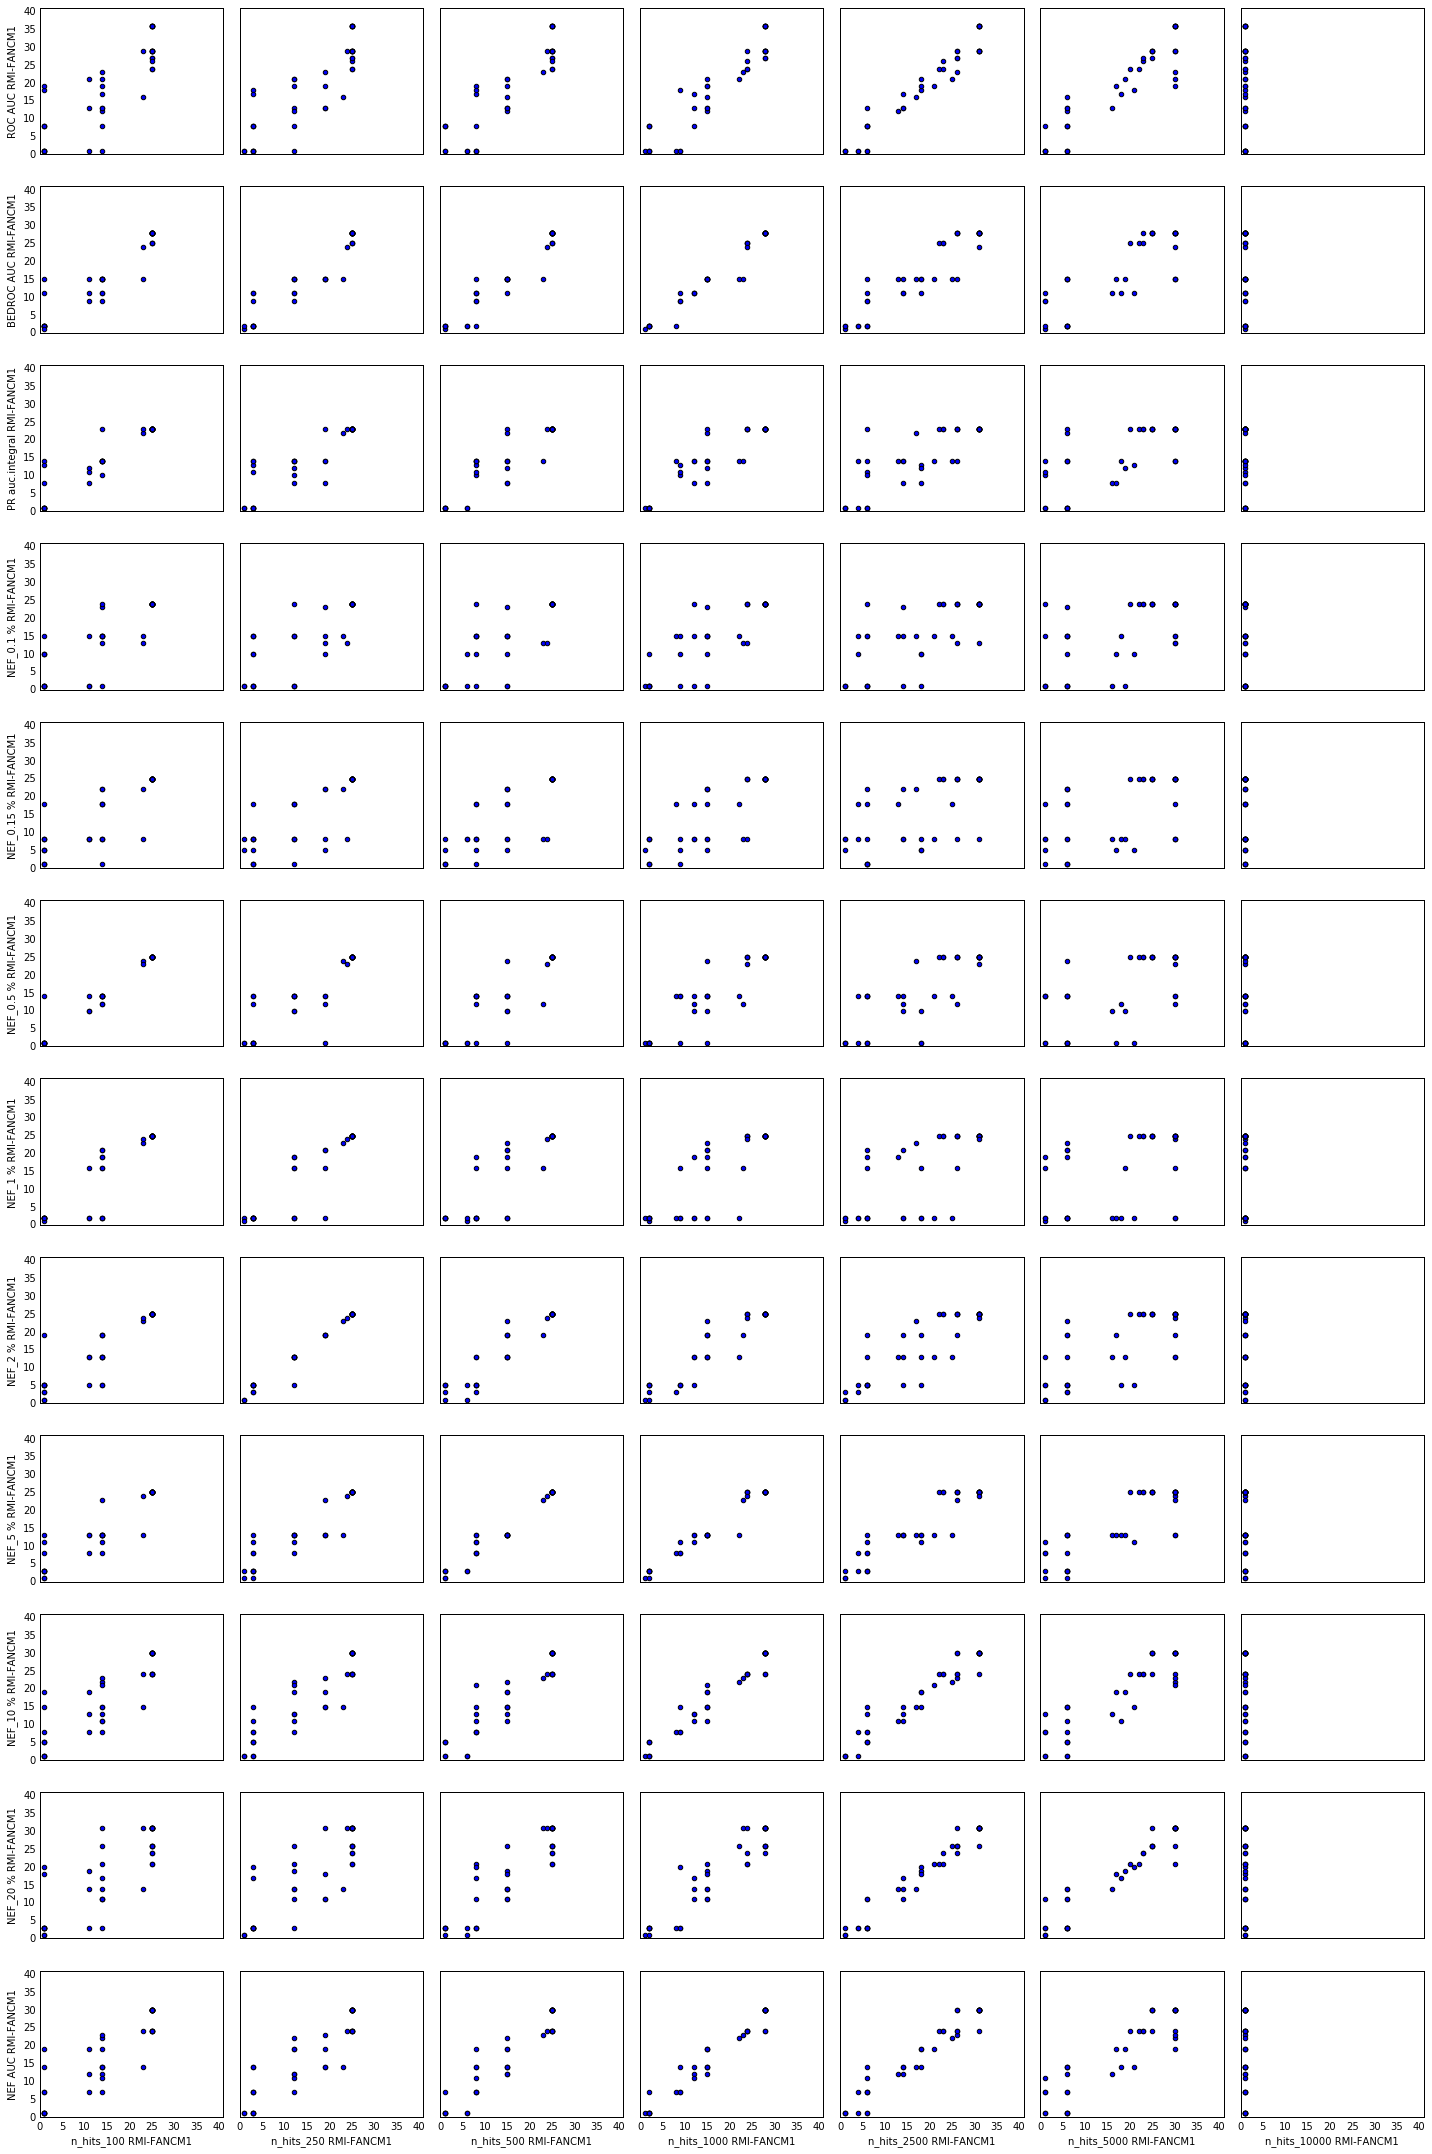

In [10]:
labels=['PriA-SSB AS','PriA-SSB FP','RMI-FANCM1']
matplotlib.rcParams.update({'font.size': 10})
if not os.path.exists('./cv_ps_figures/cv_scatter_plots_nhits/'):
    os.makedirs('./cv_ps_figures/cv_scatter_plots_nhits/')
for l in labels:
    curr_metrics = [m for m in metric_names[:-21] if l in m]
    curr_hits = [m for m in metric_names[-21:] if l in m]
    file_name = './cv_ps_figures/cv_scatter_plots_nhits/' + l.replace(' ', '_') + '.png'
    plot_scatter_nhits_alt(agg_comp_dict, curr_metrics, curr_hits, file_name, figsize=(20,30))

---
## Uninversal Confidence Intervals

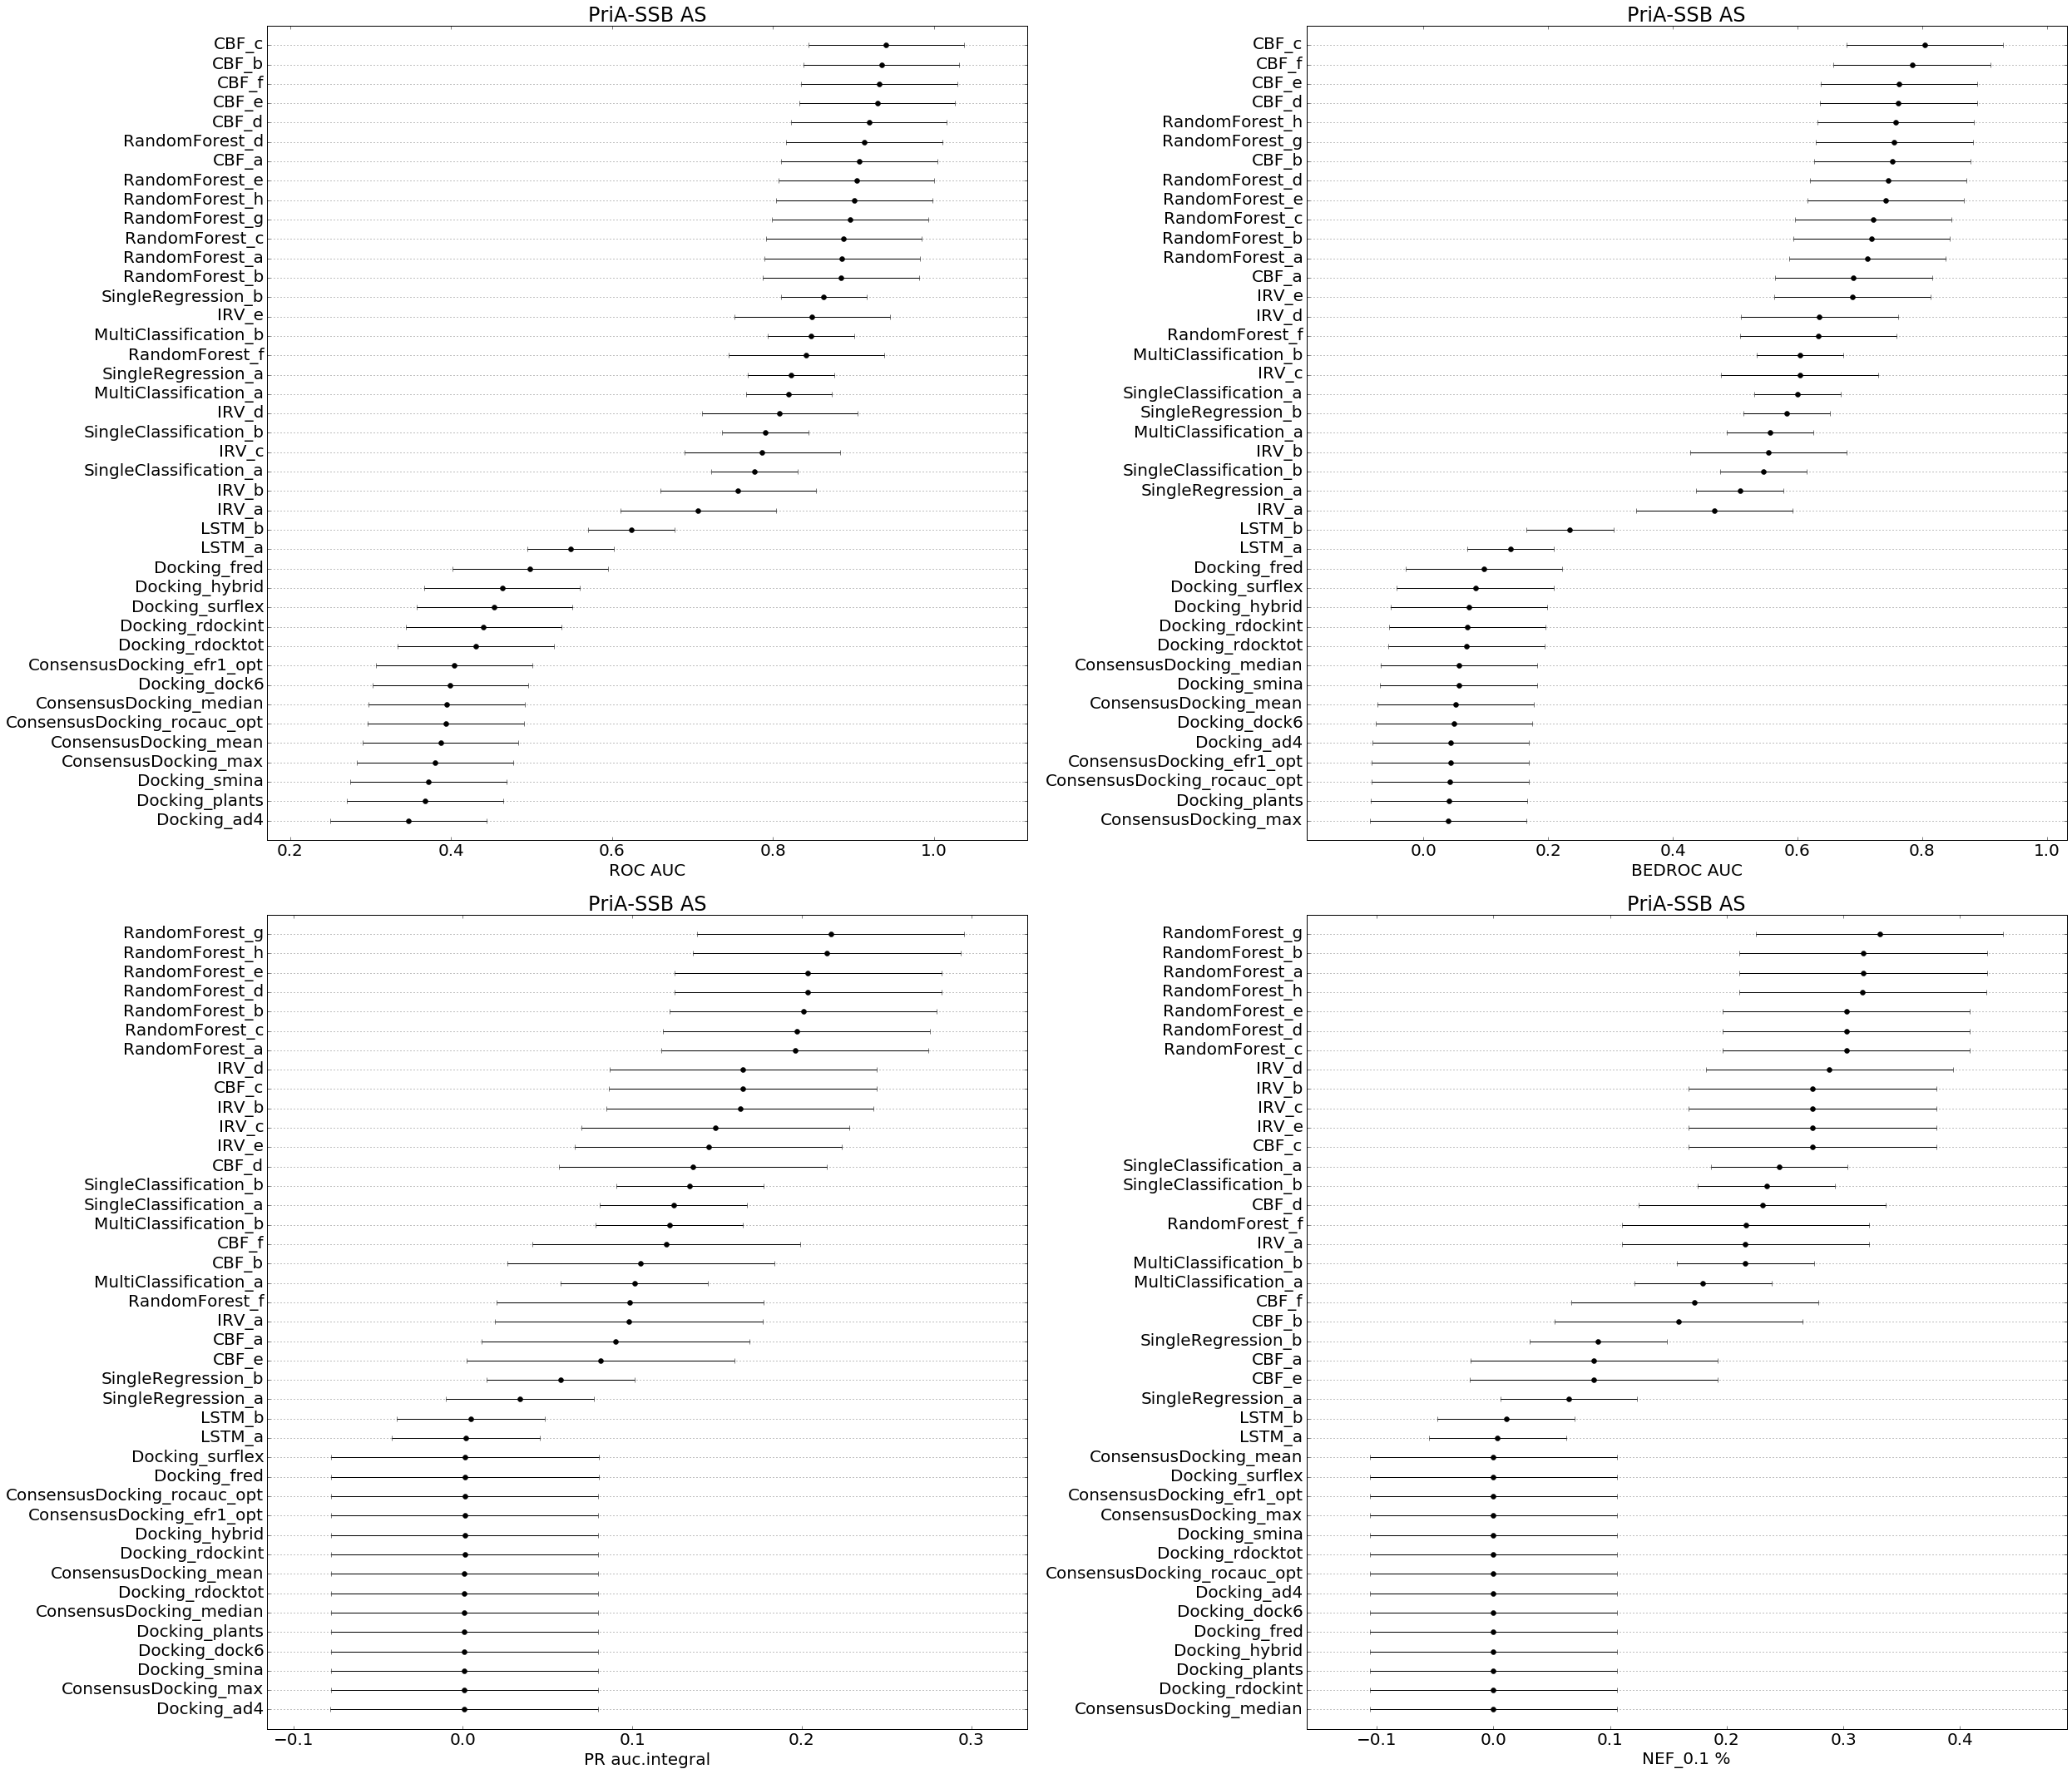

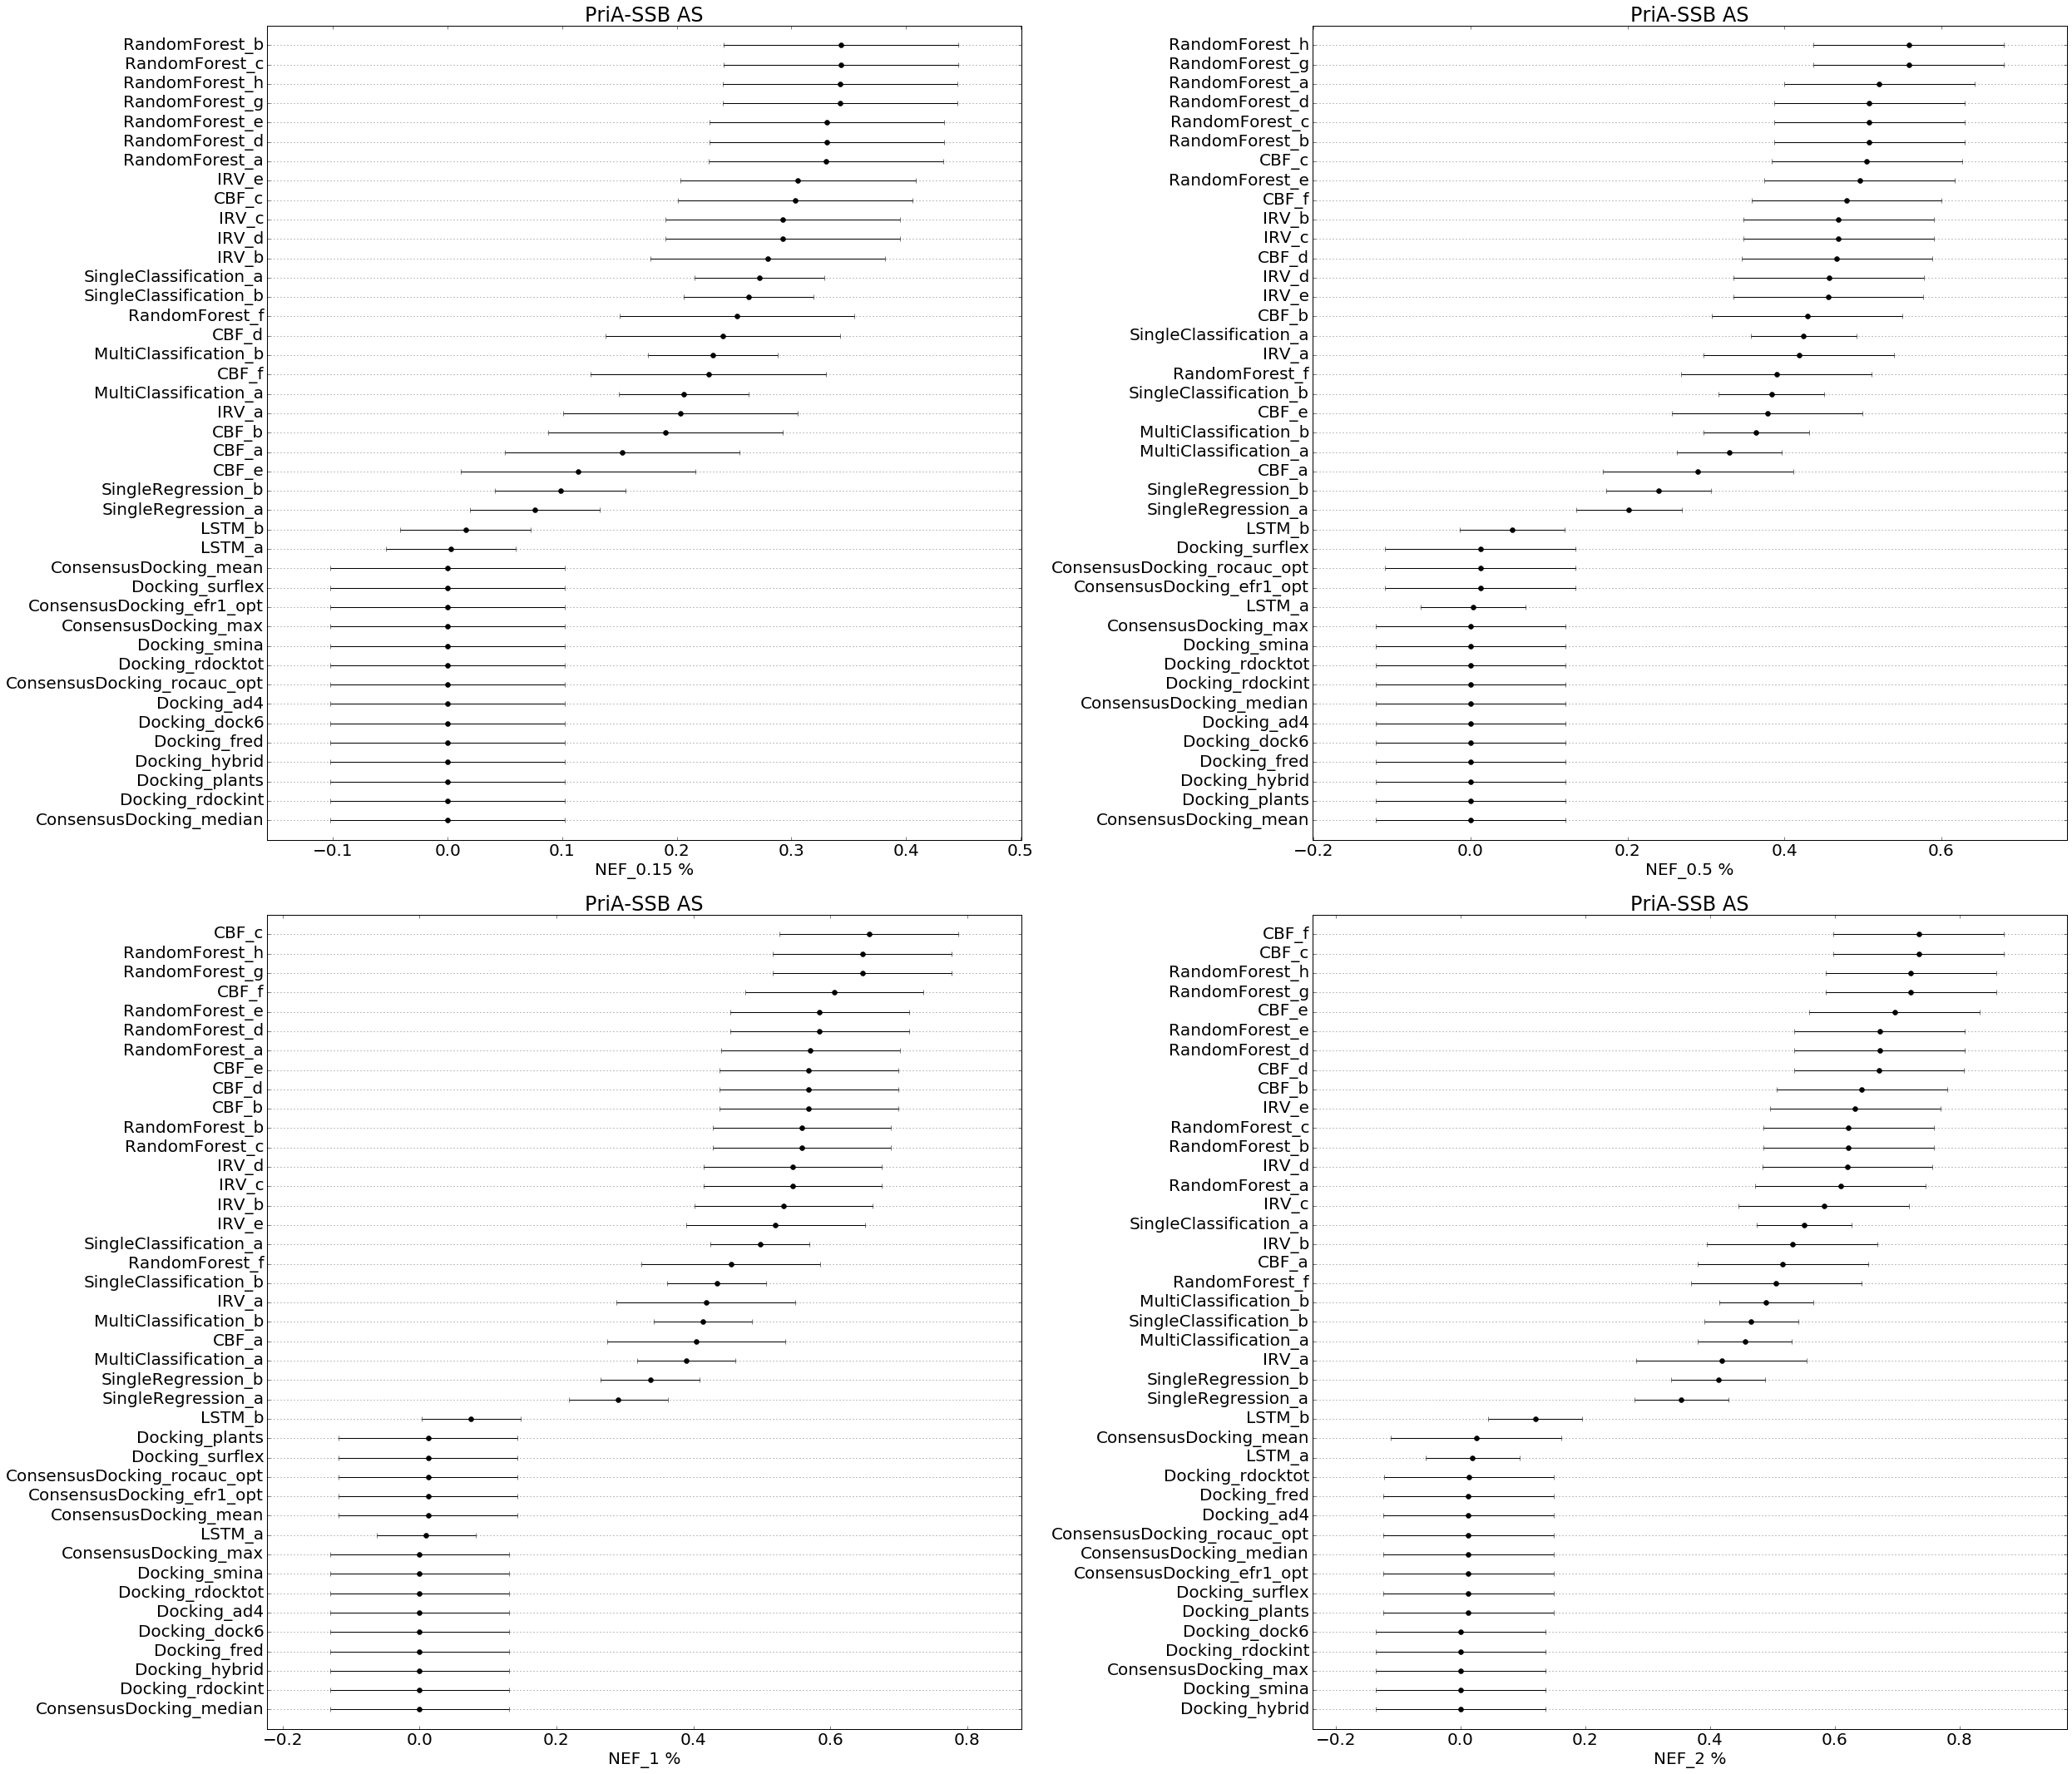

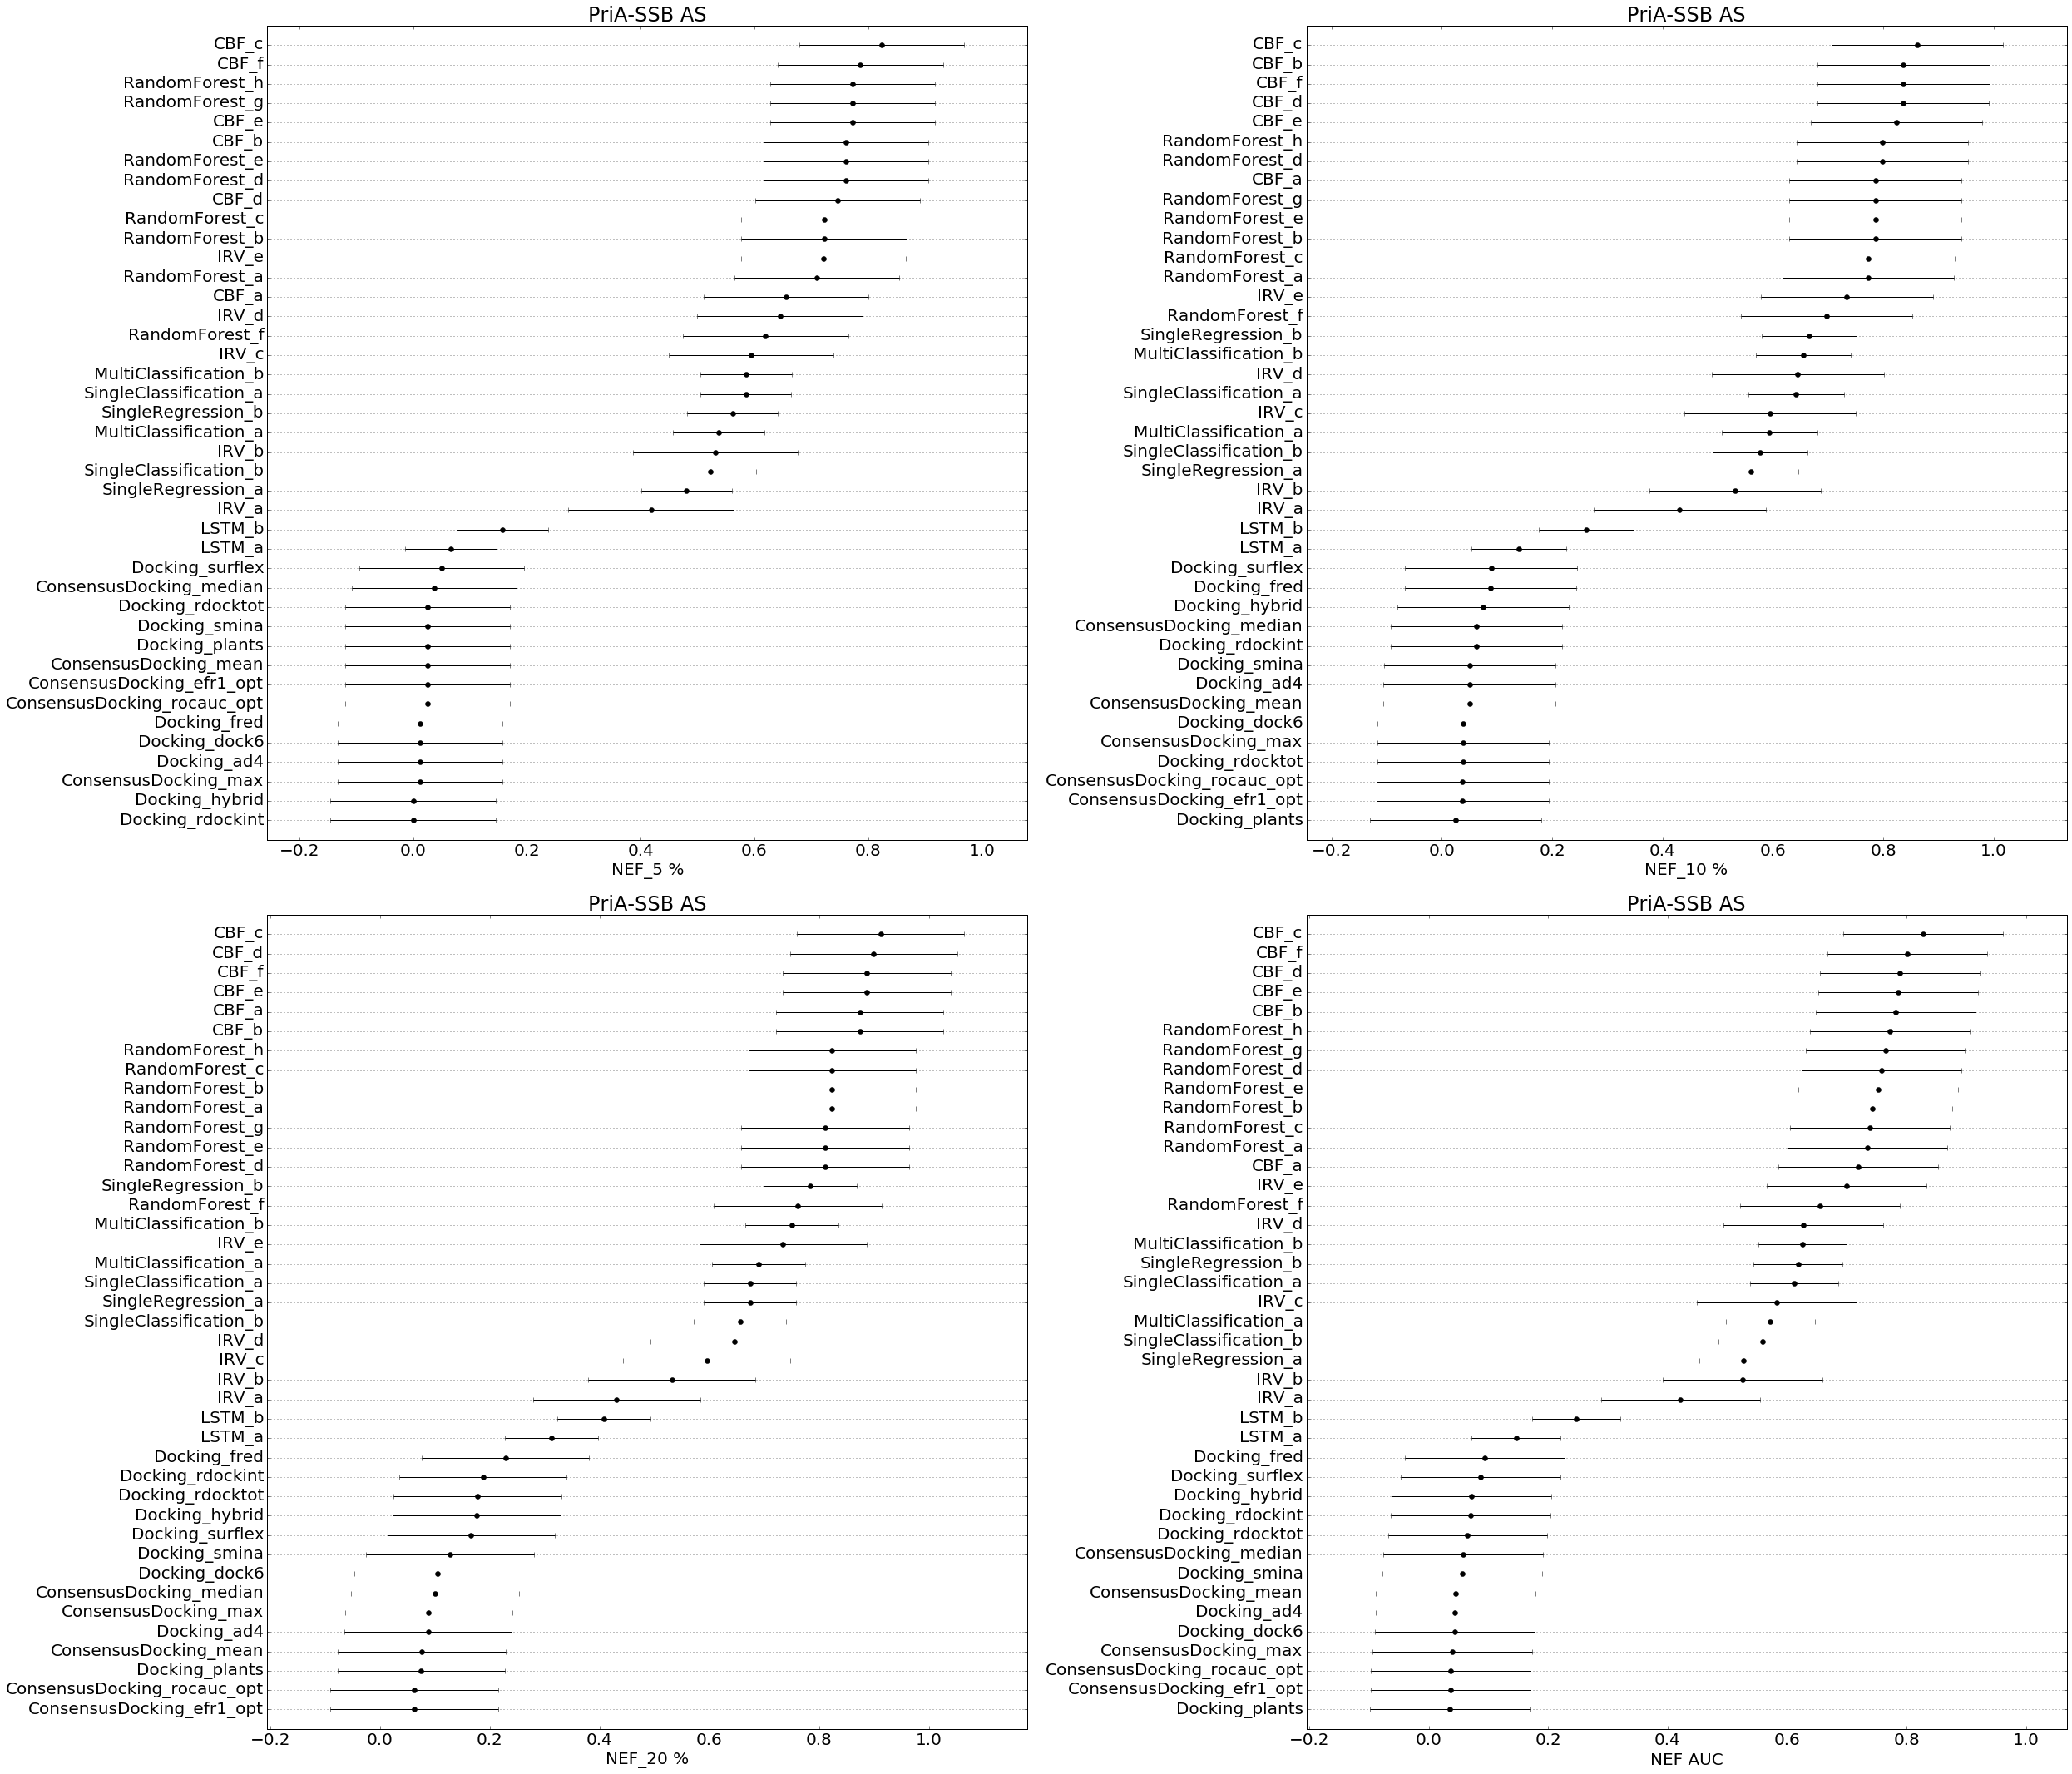

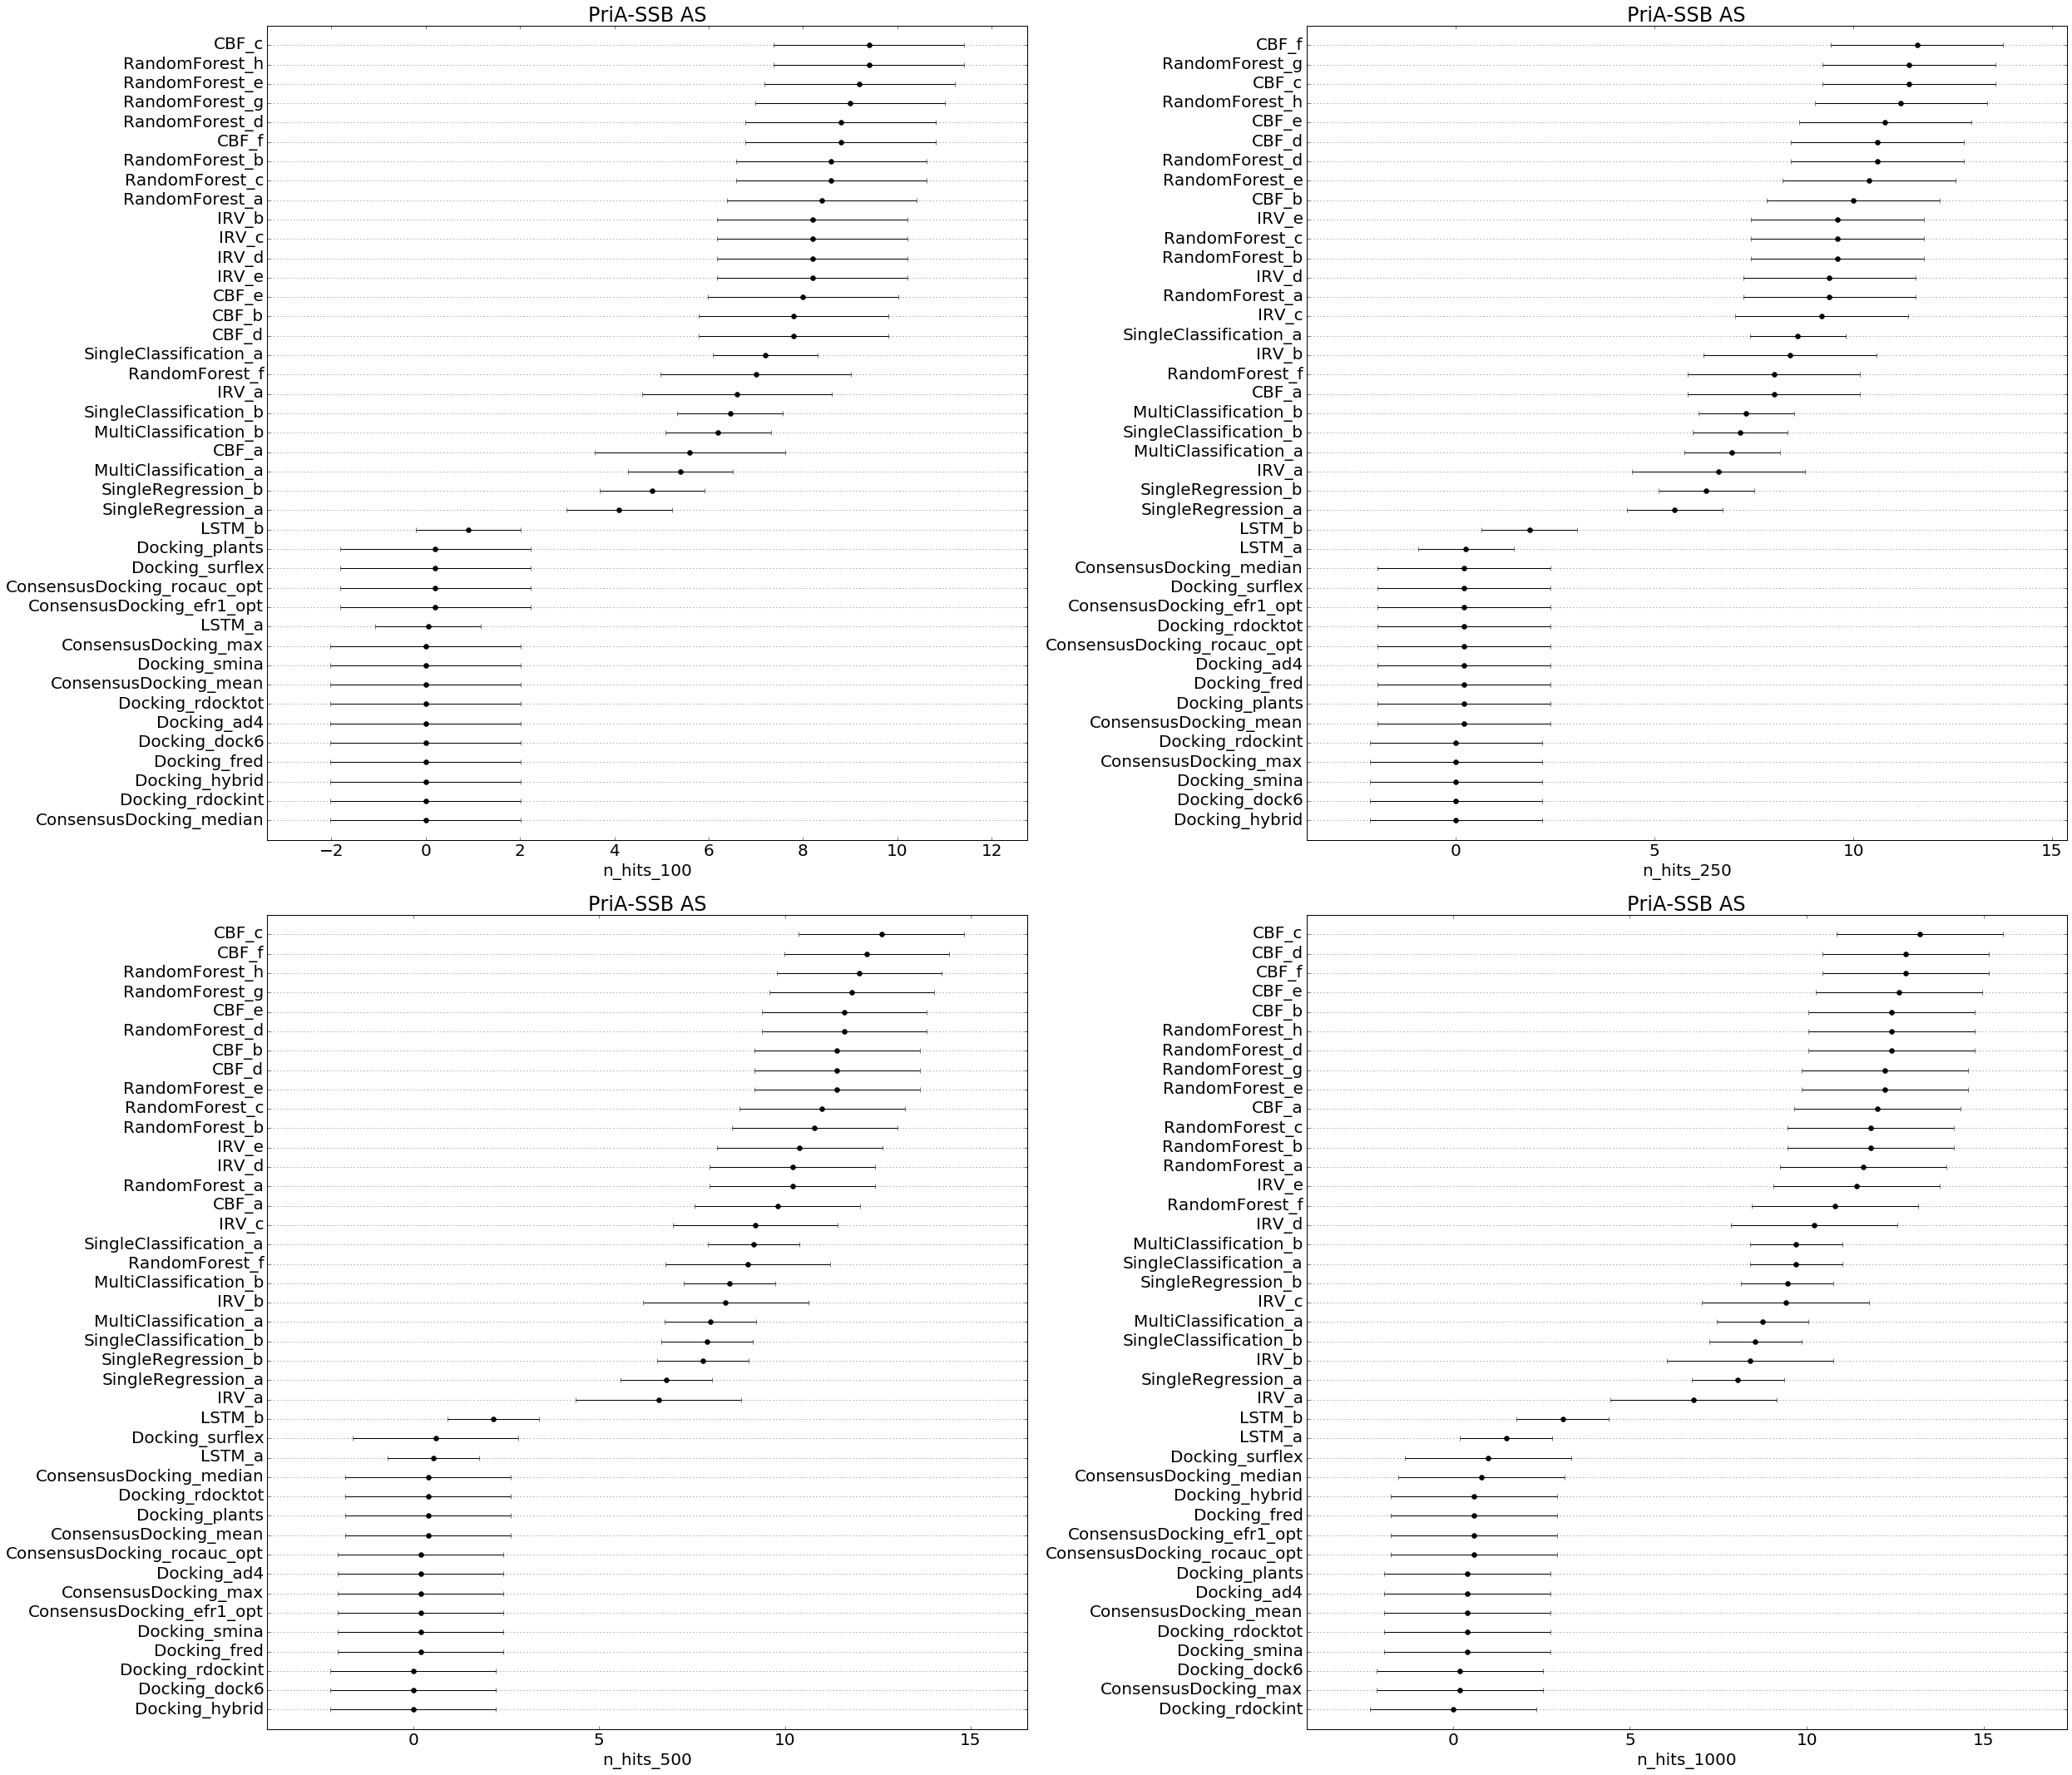

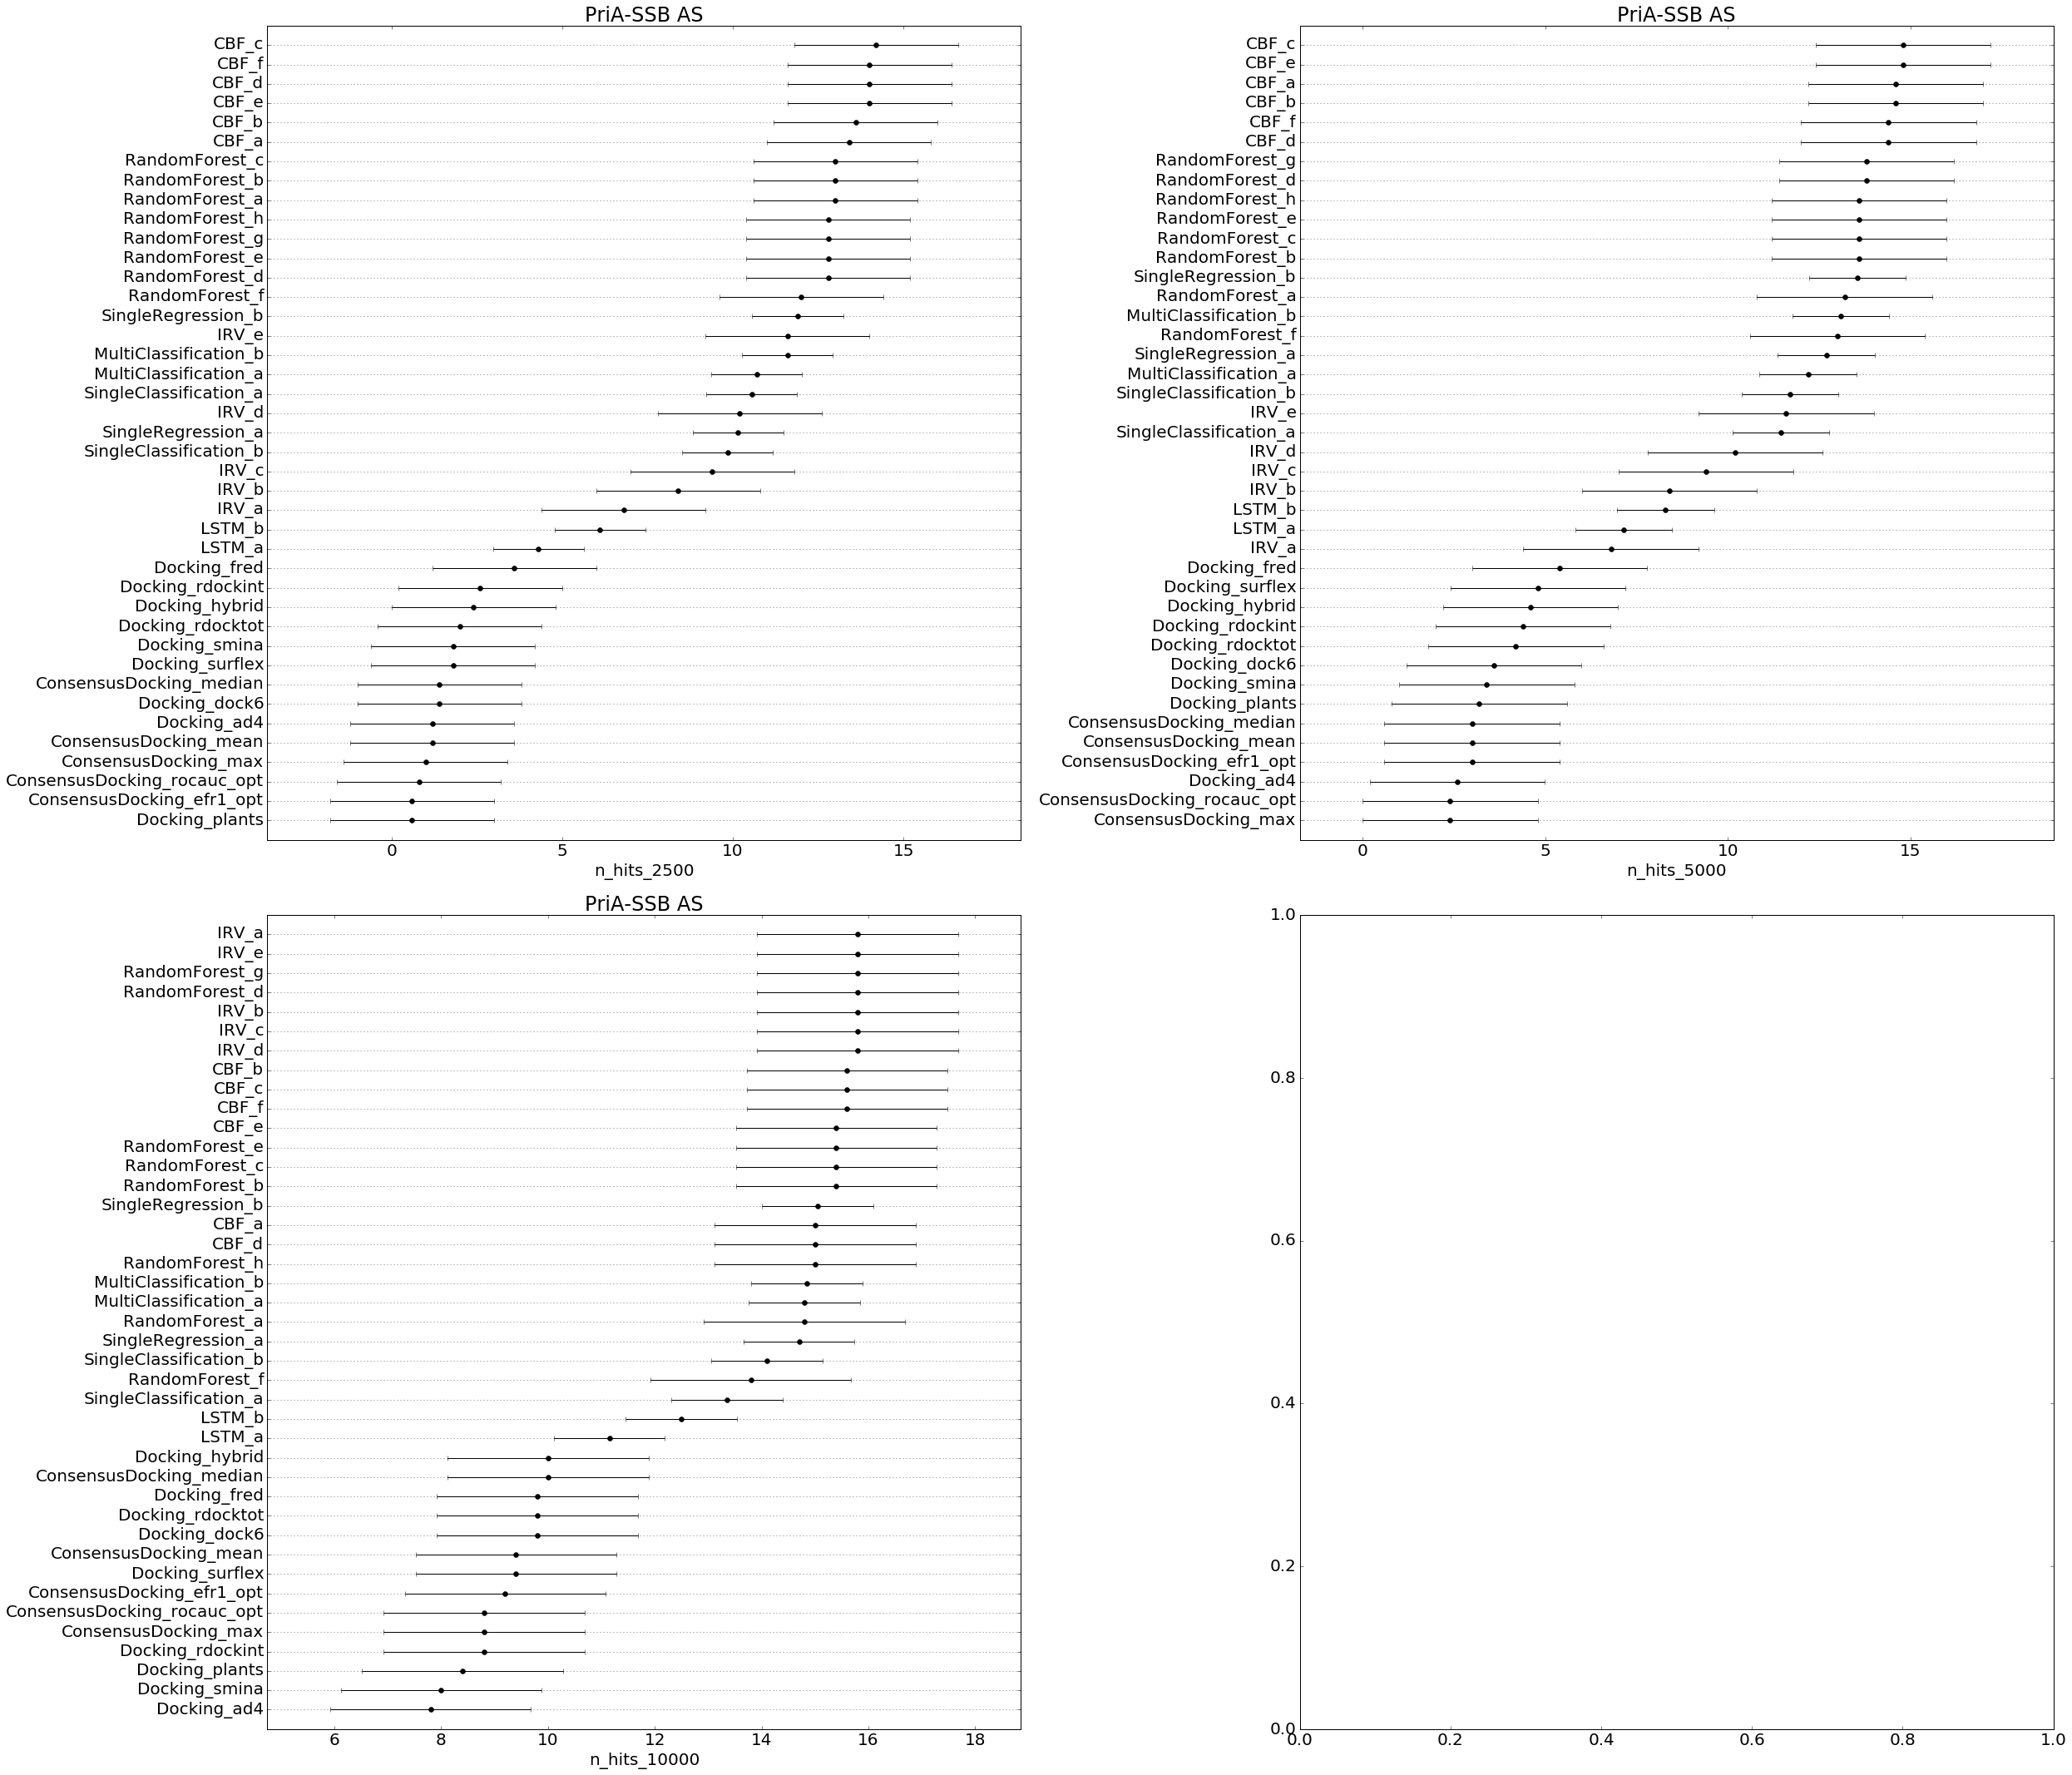

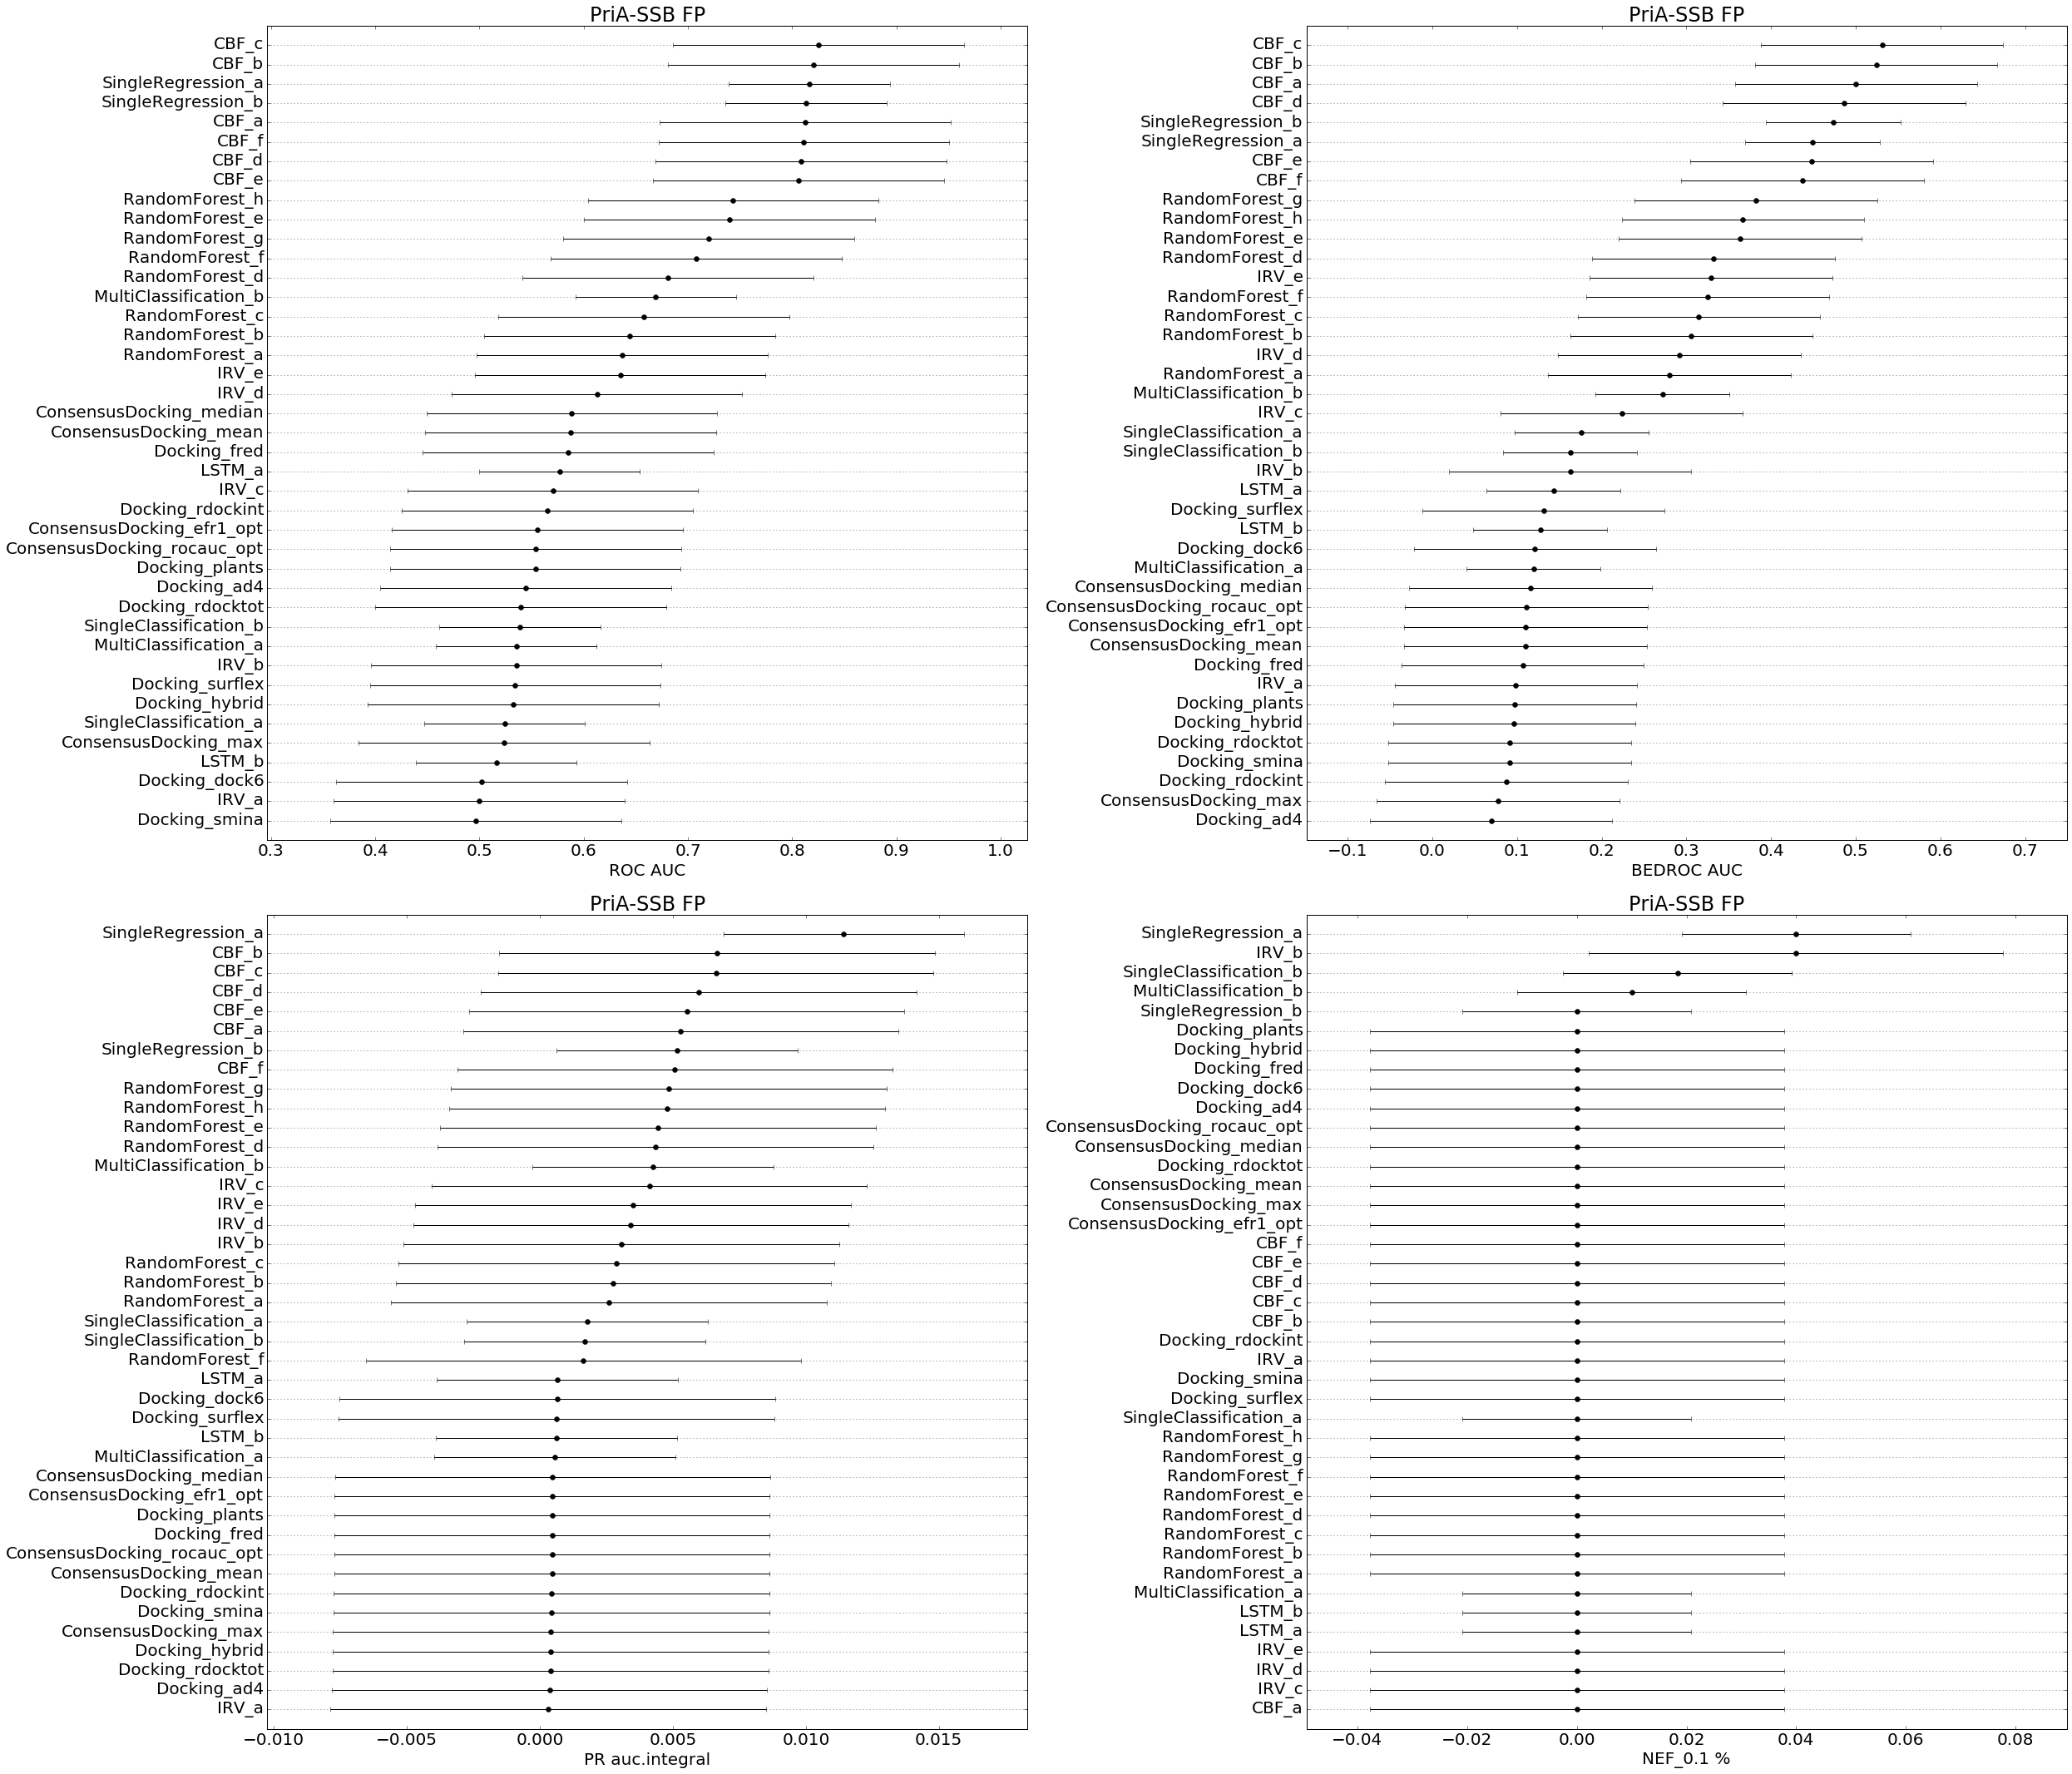

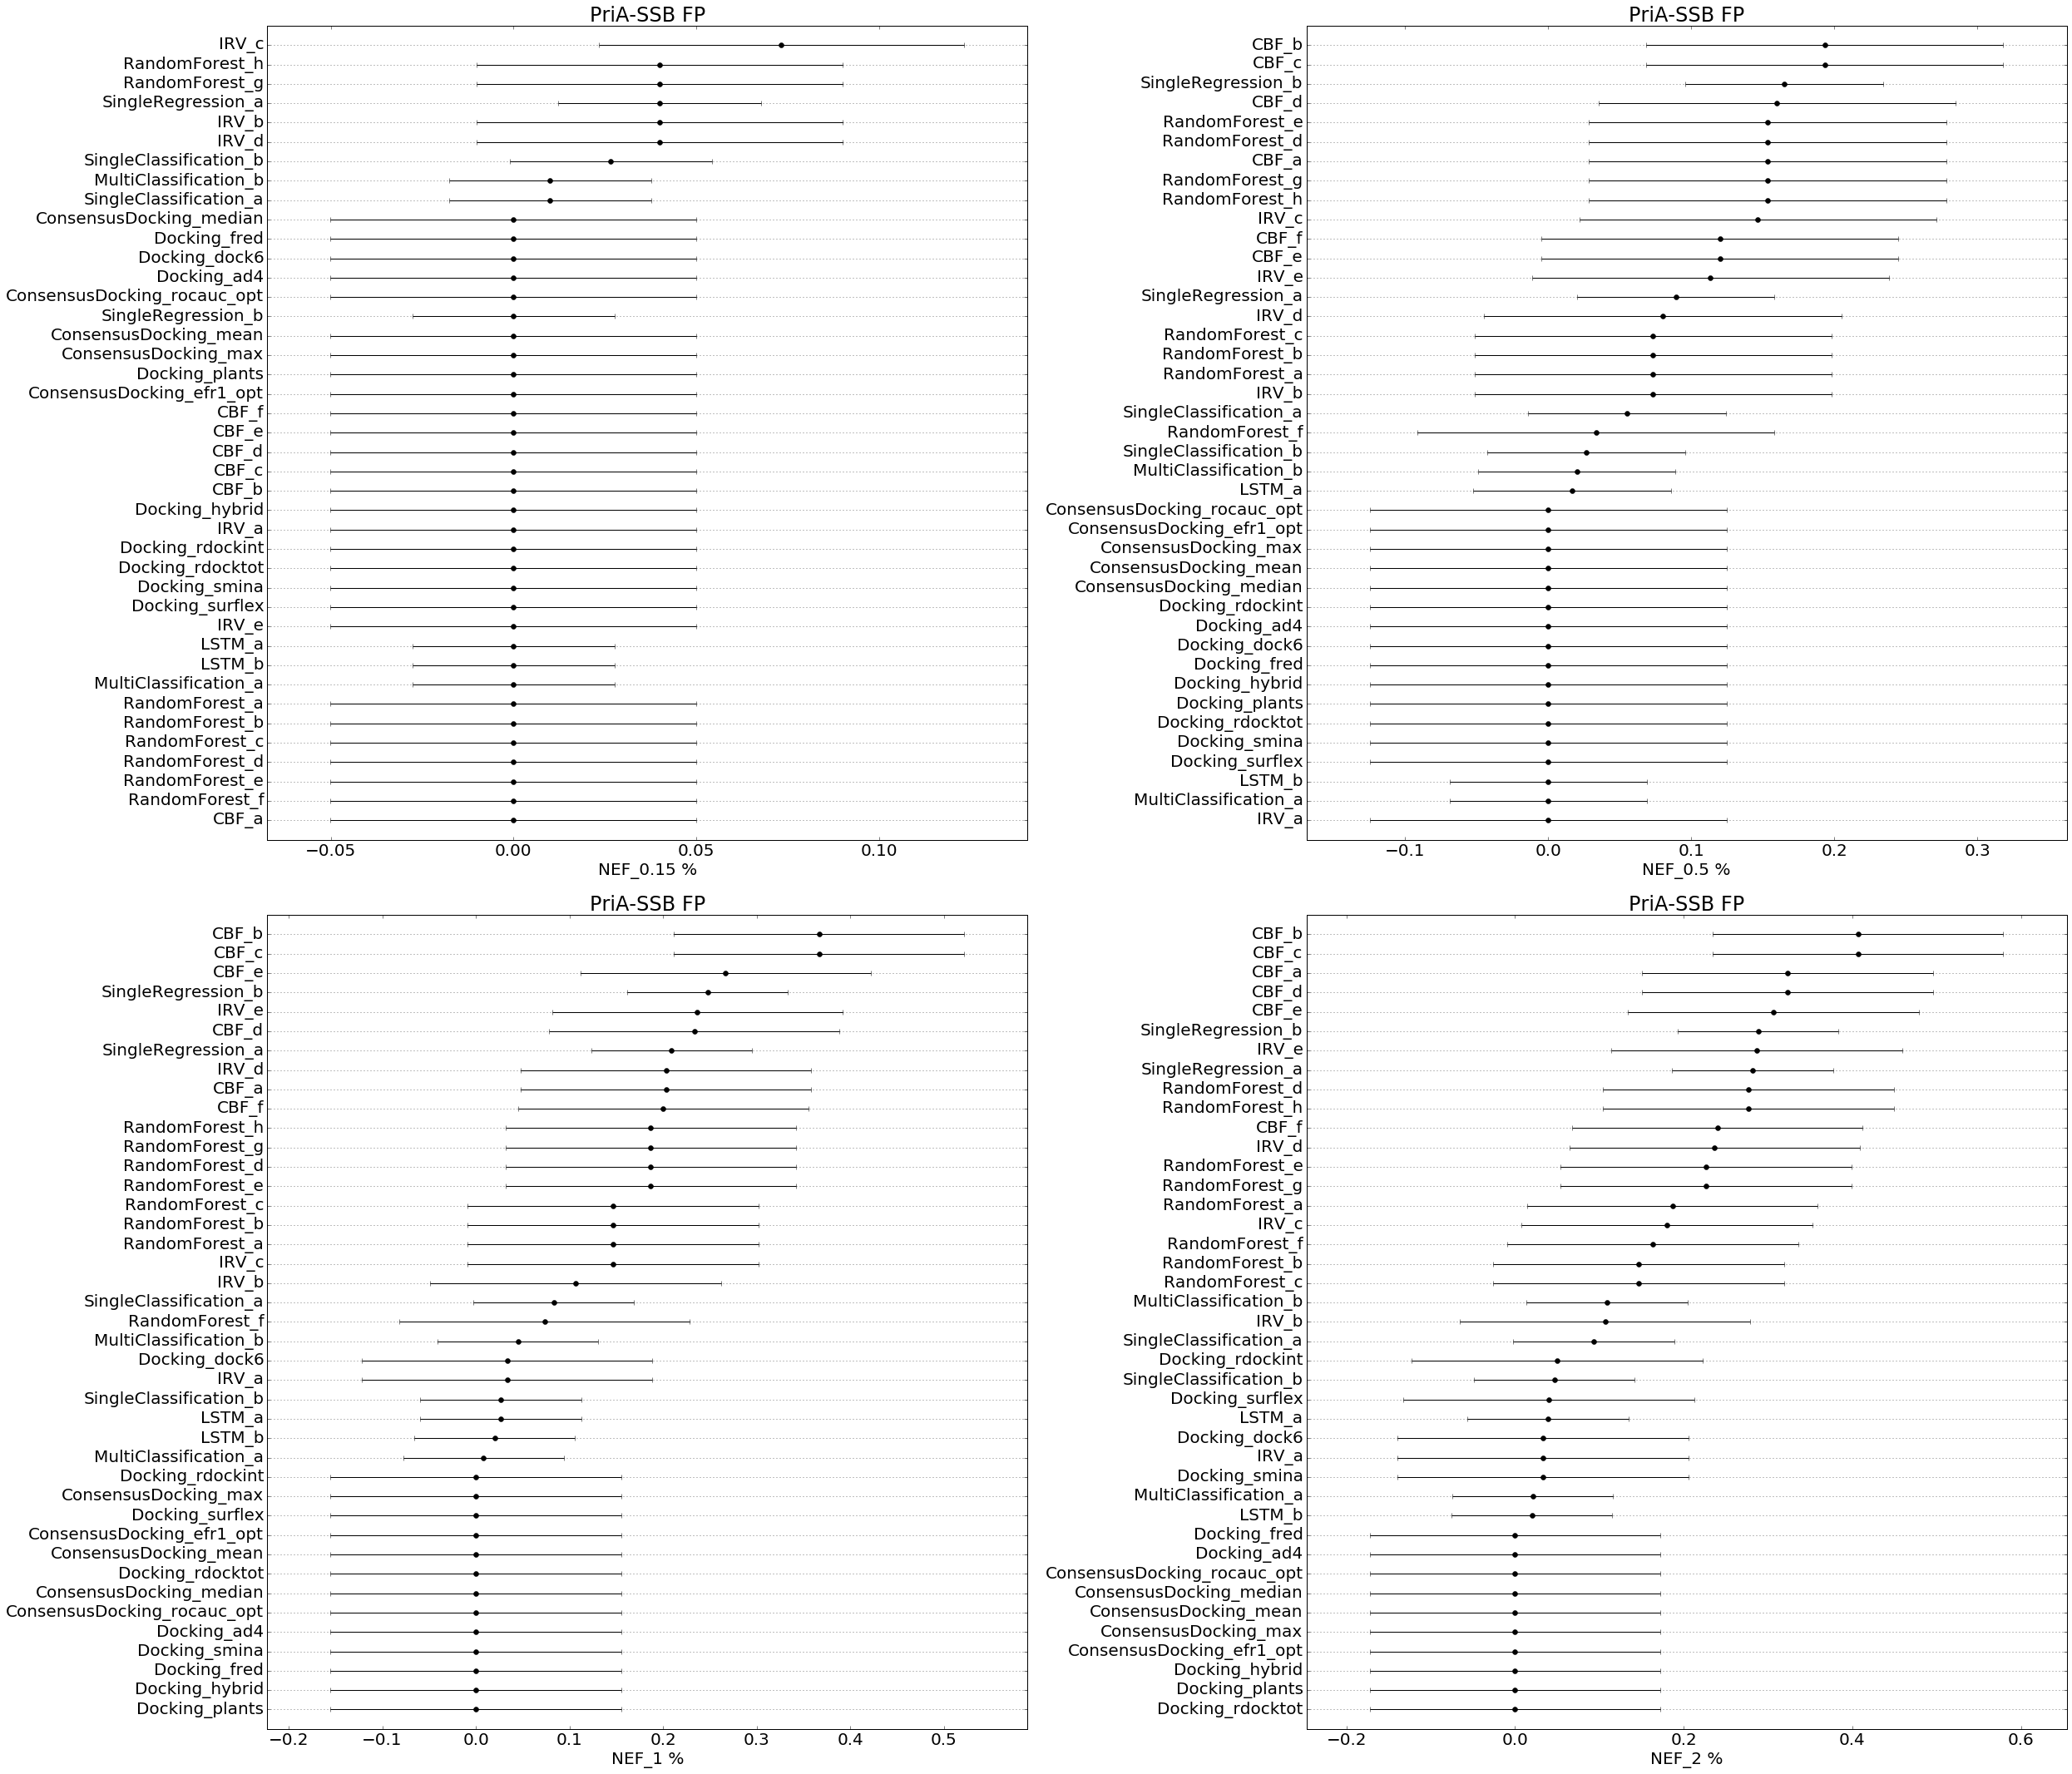

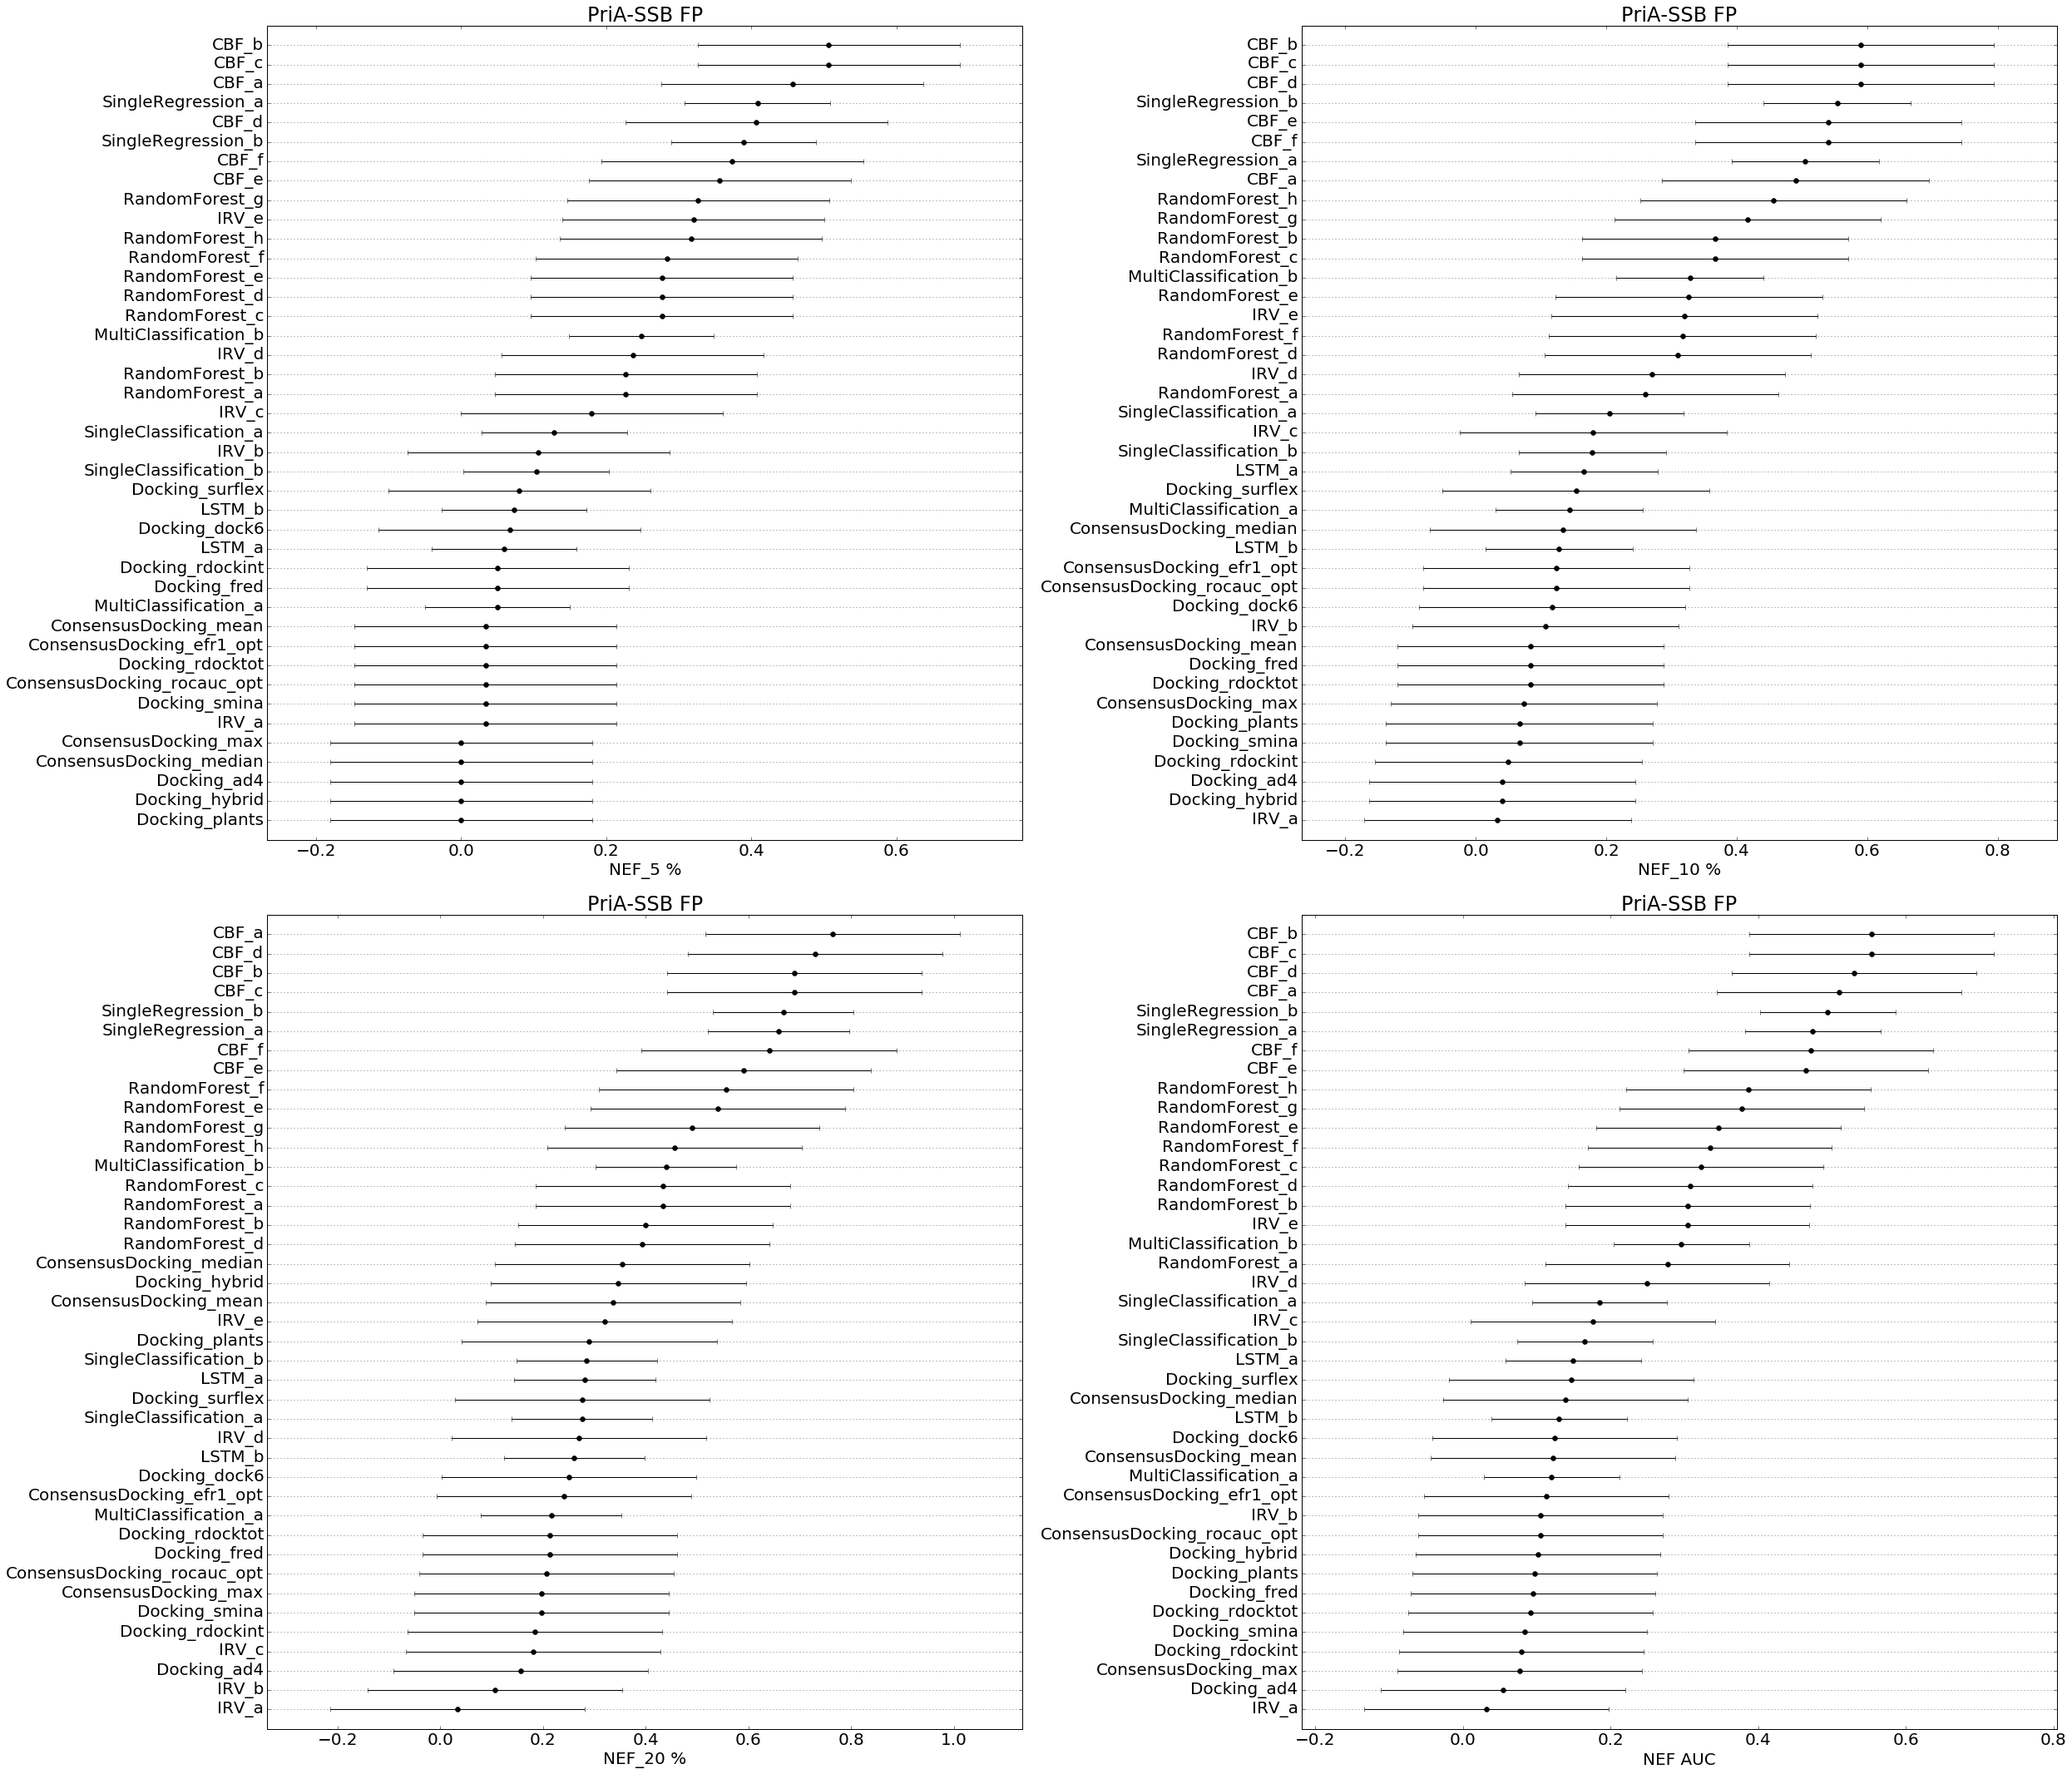

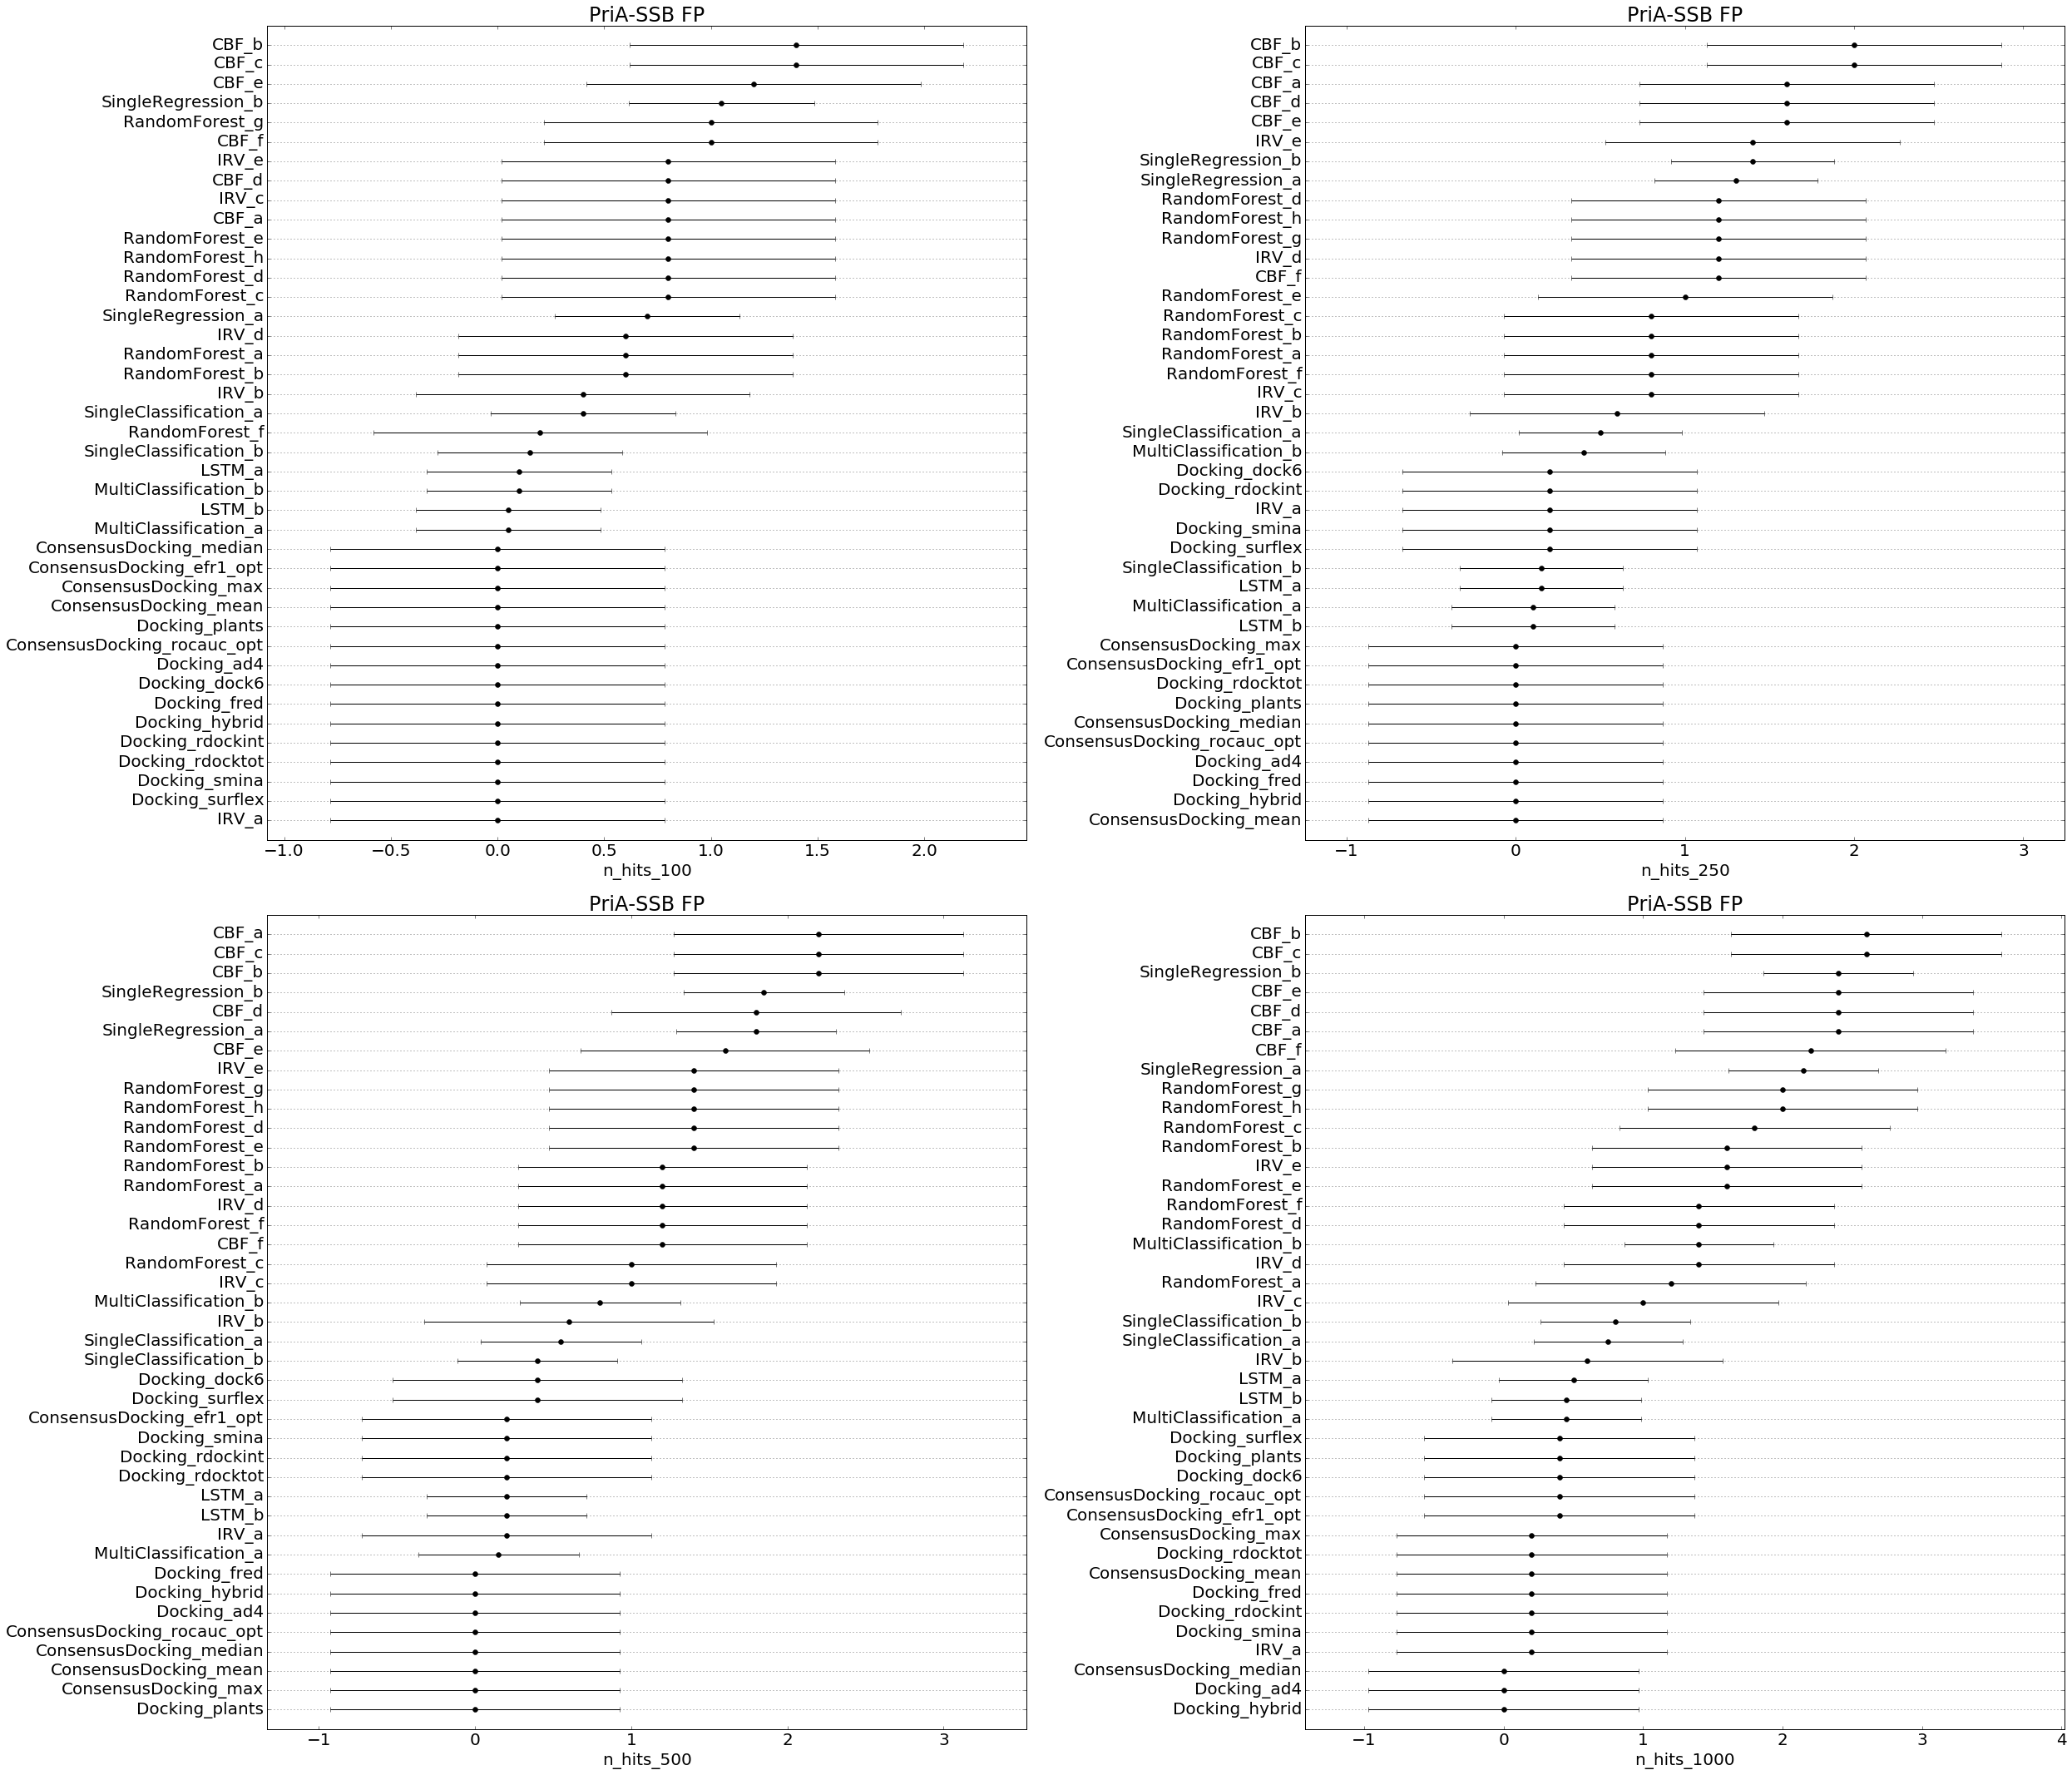

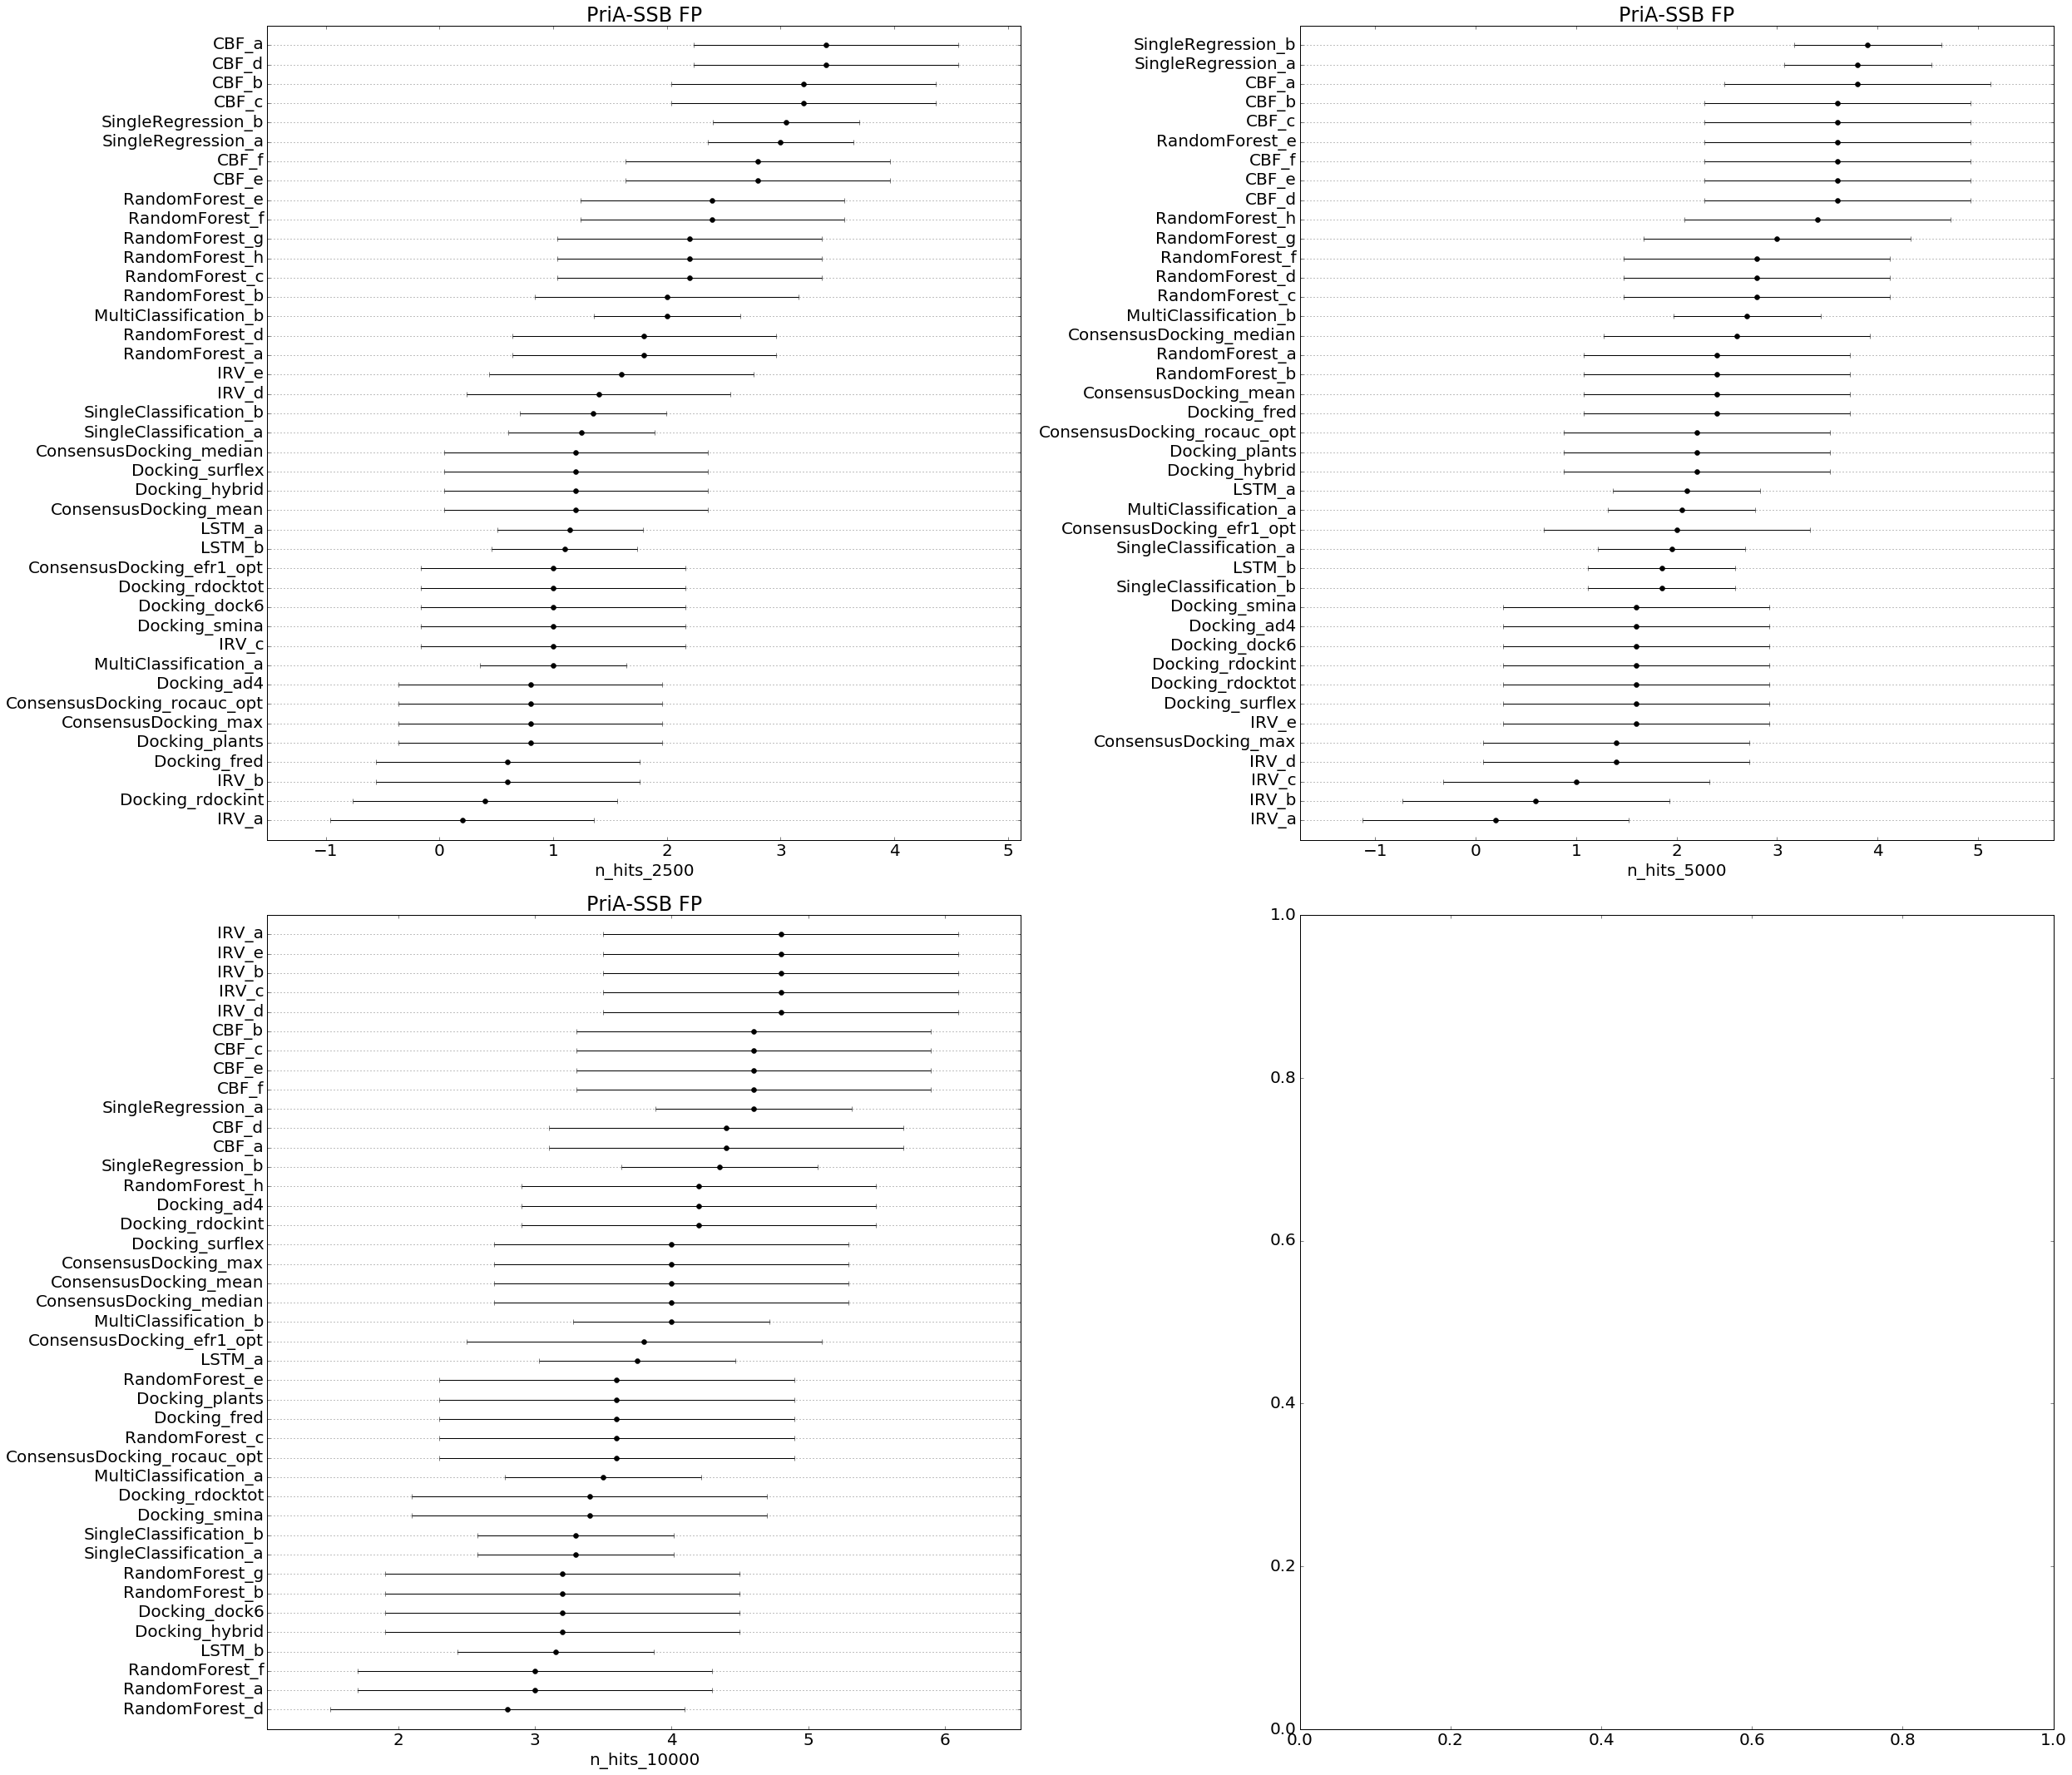

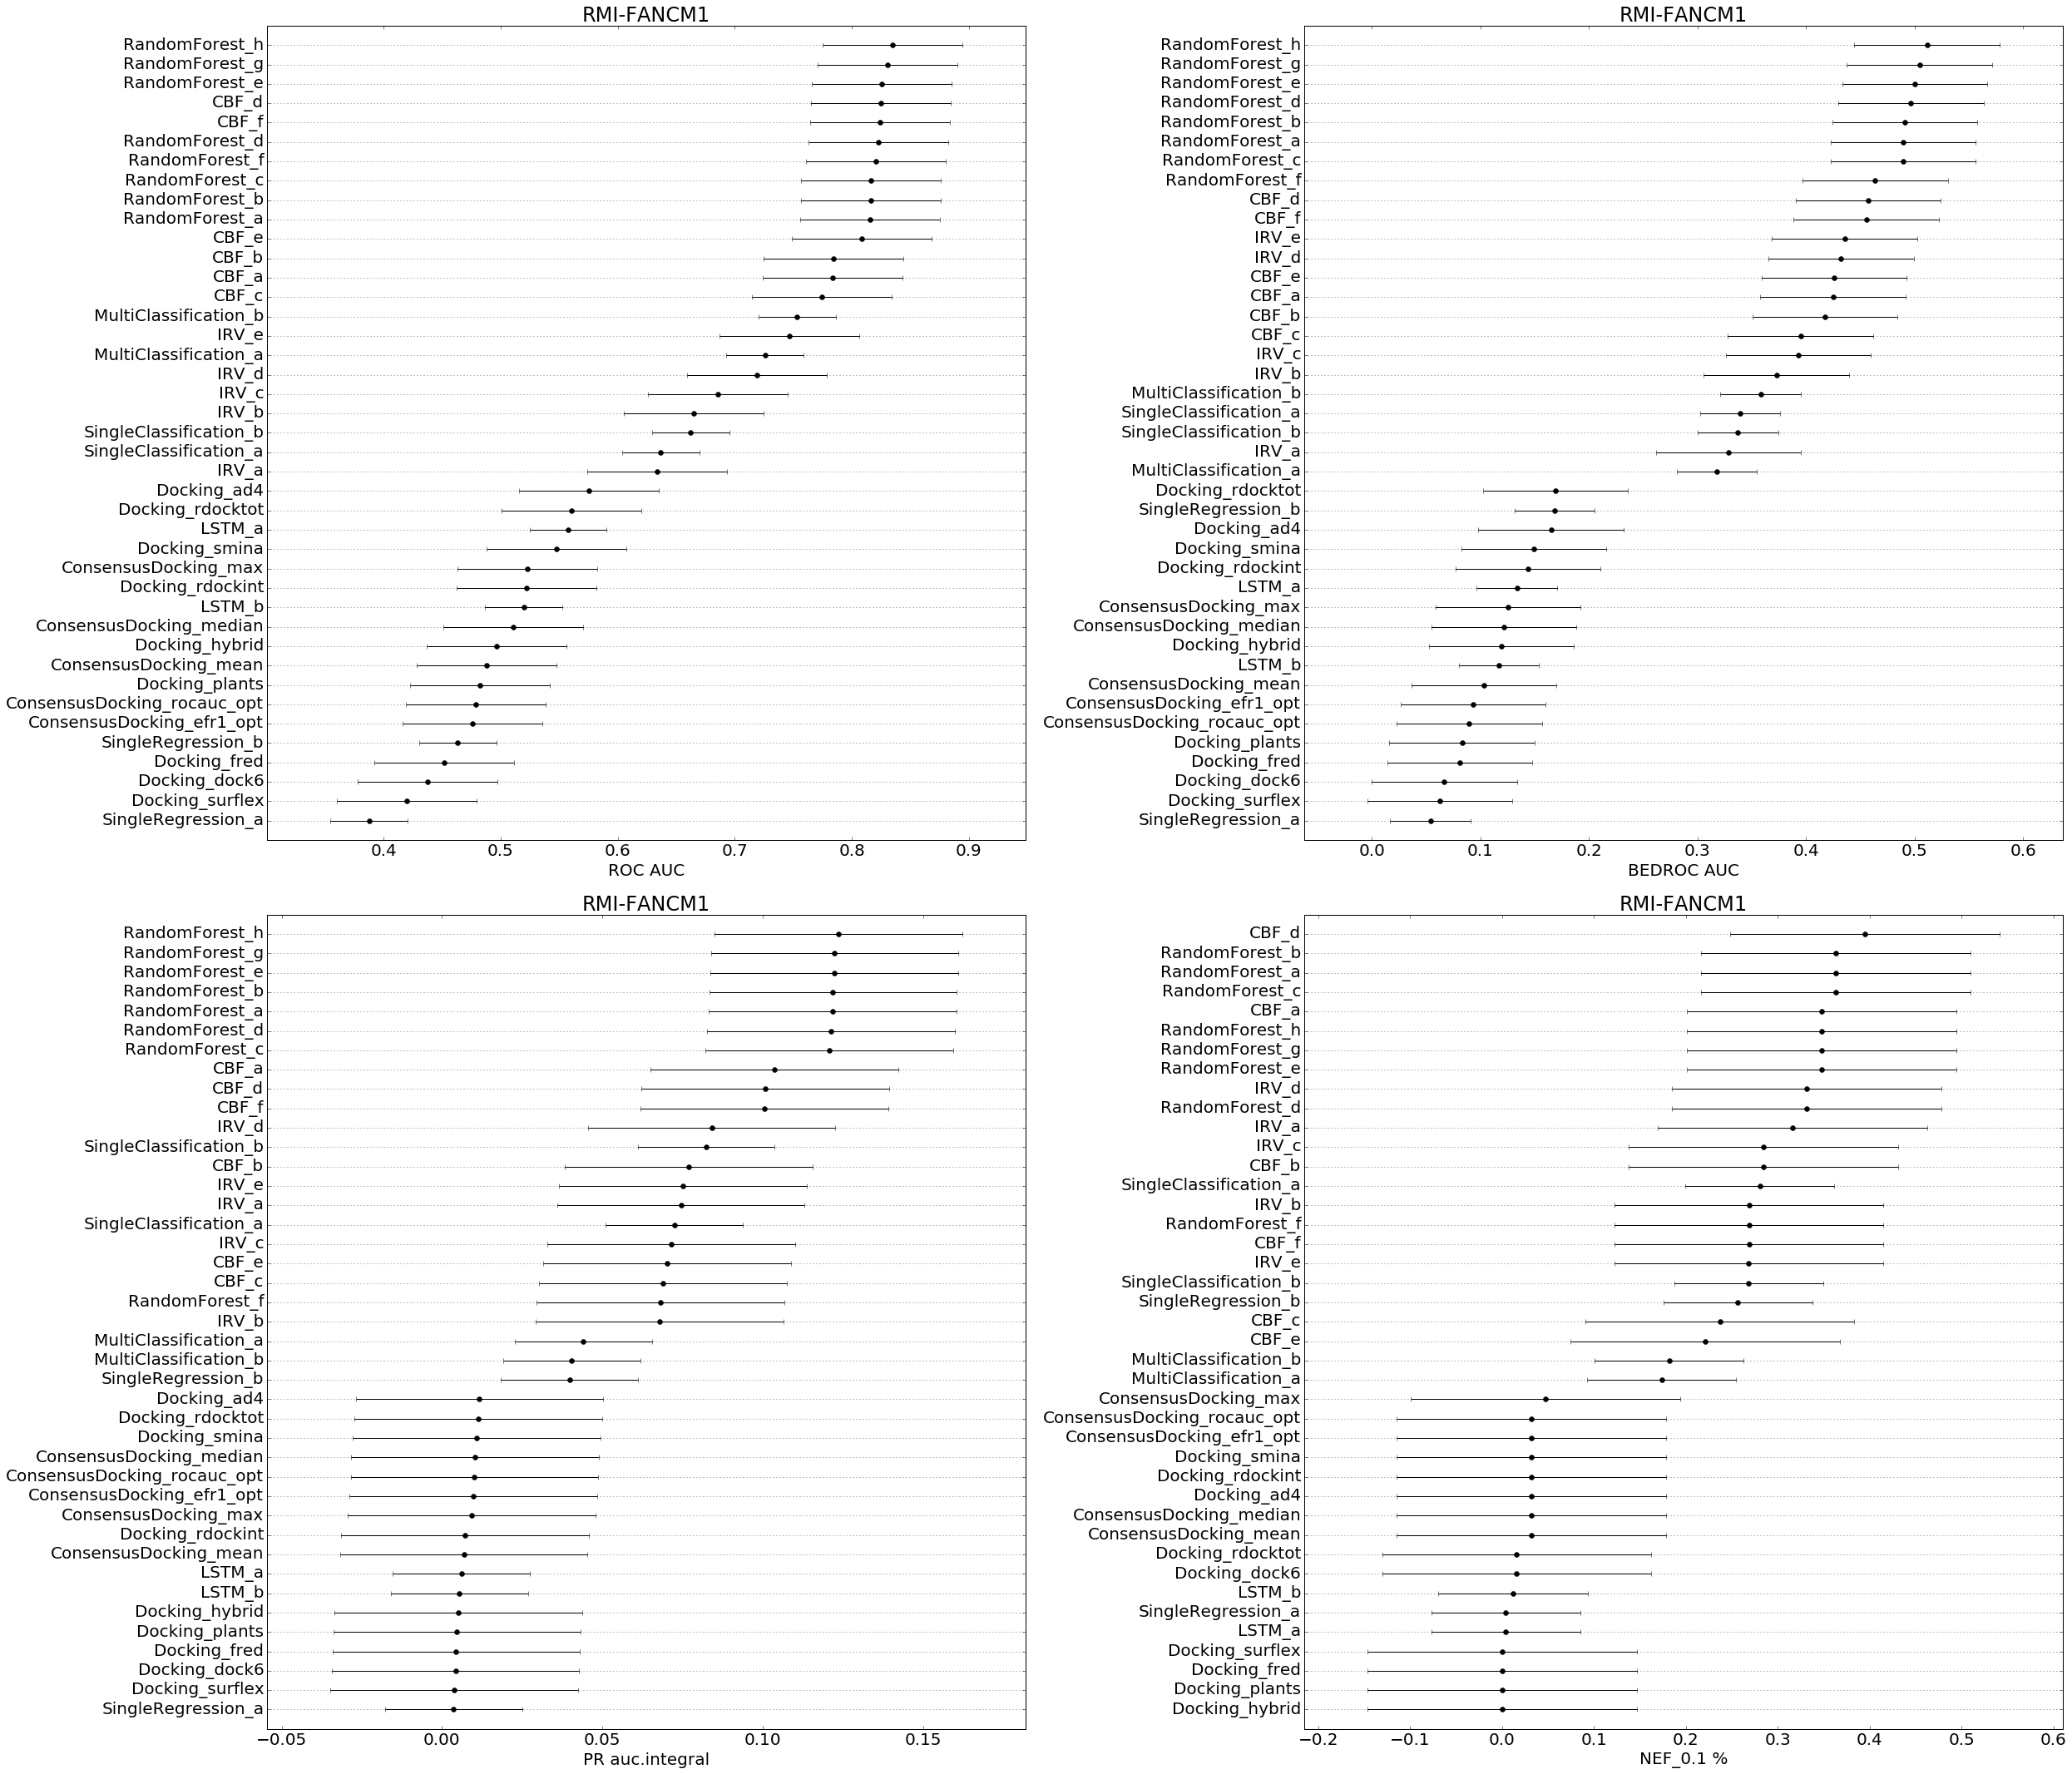

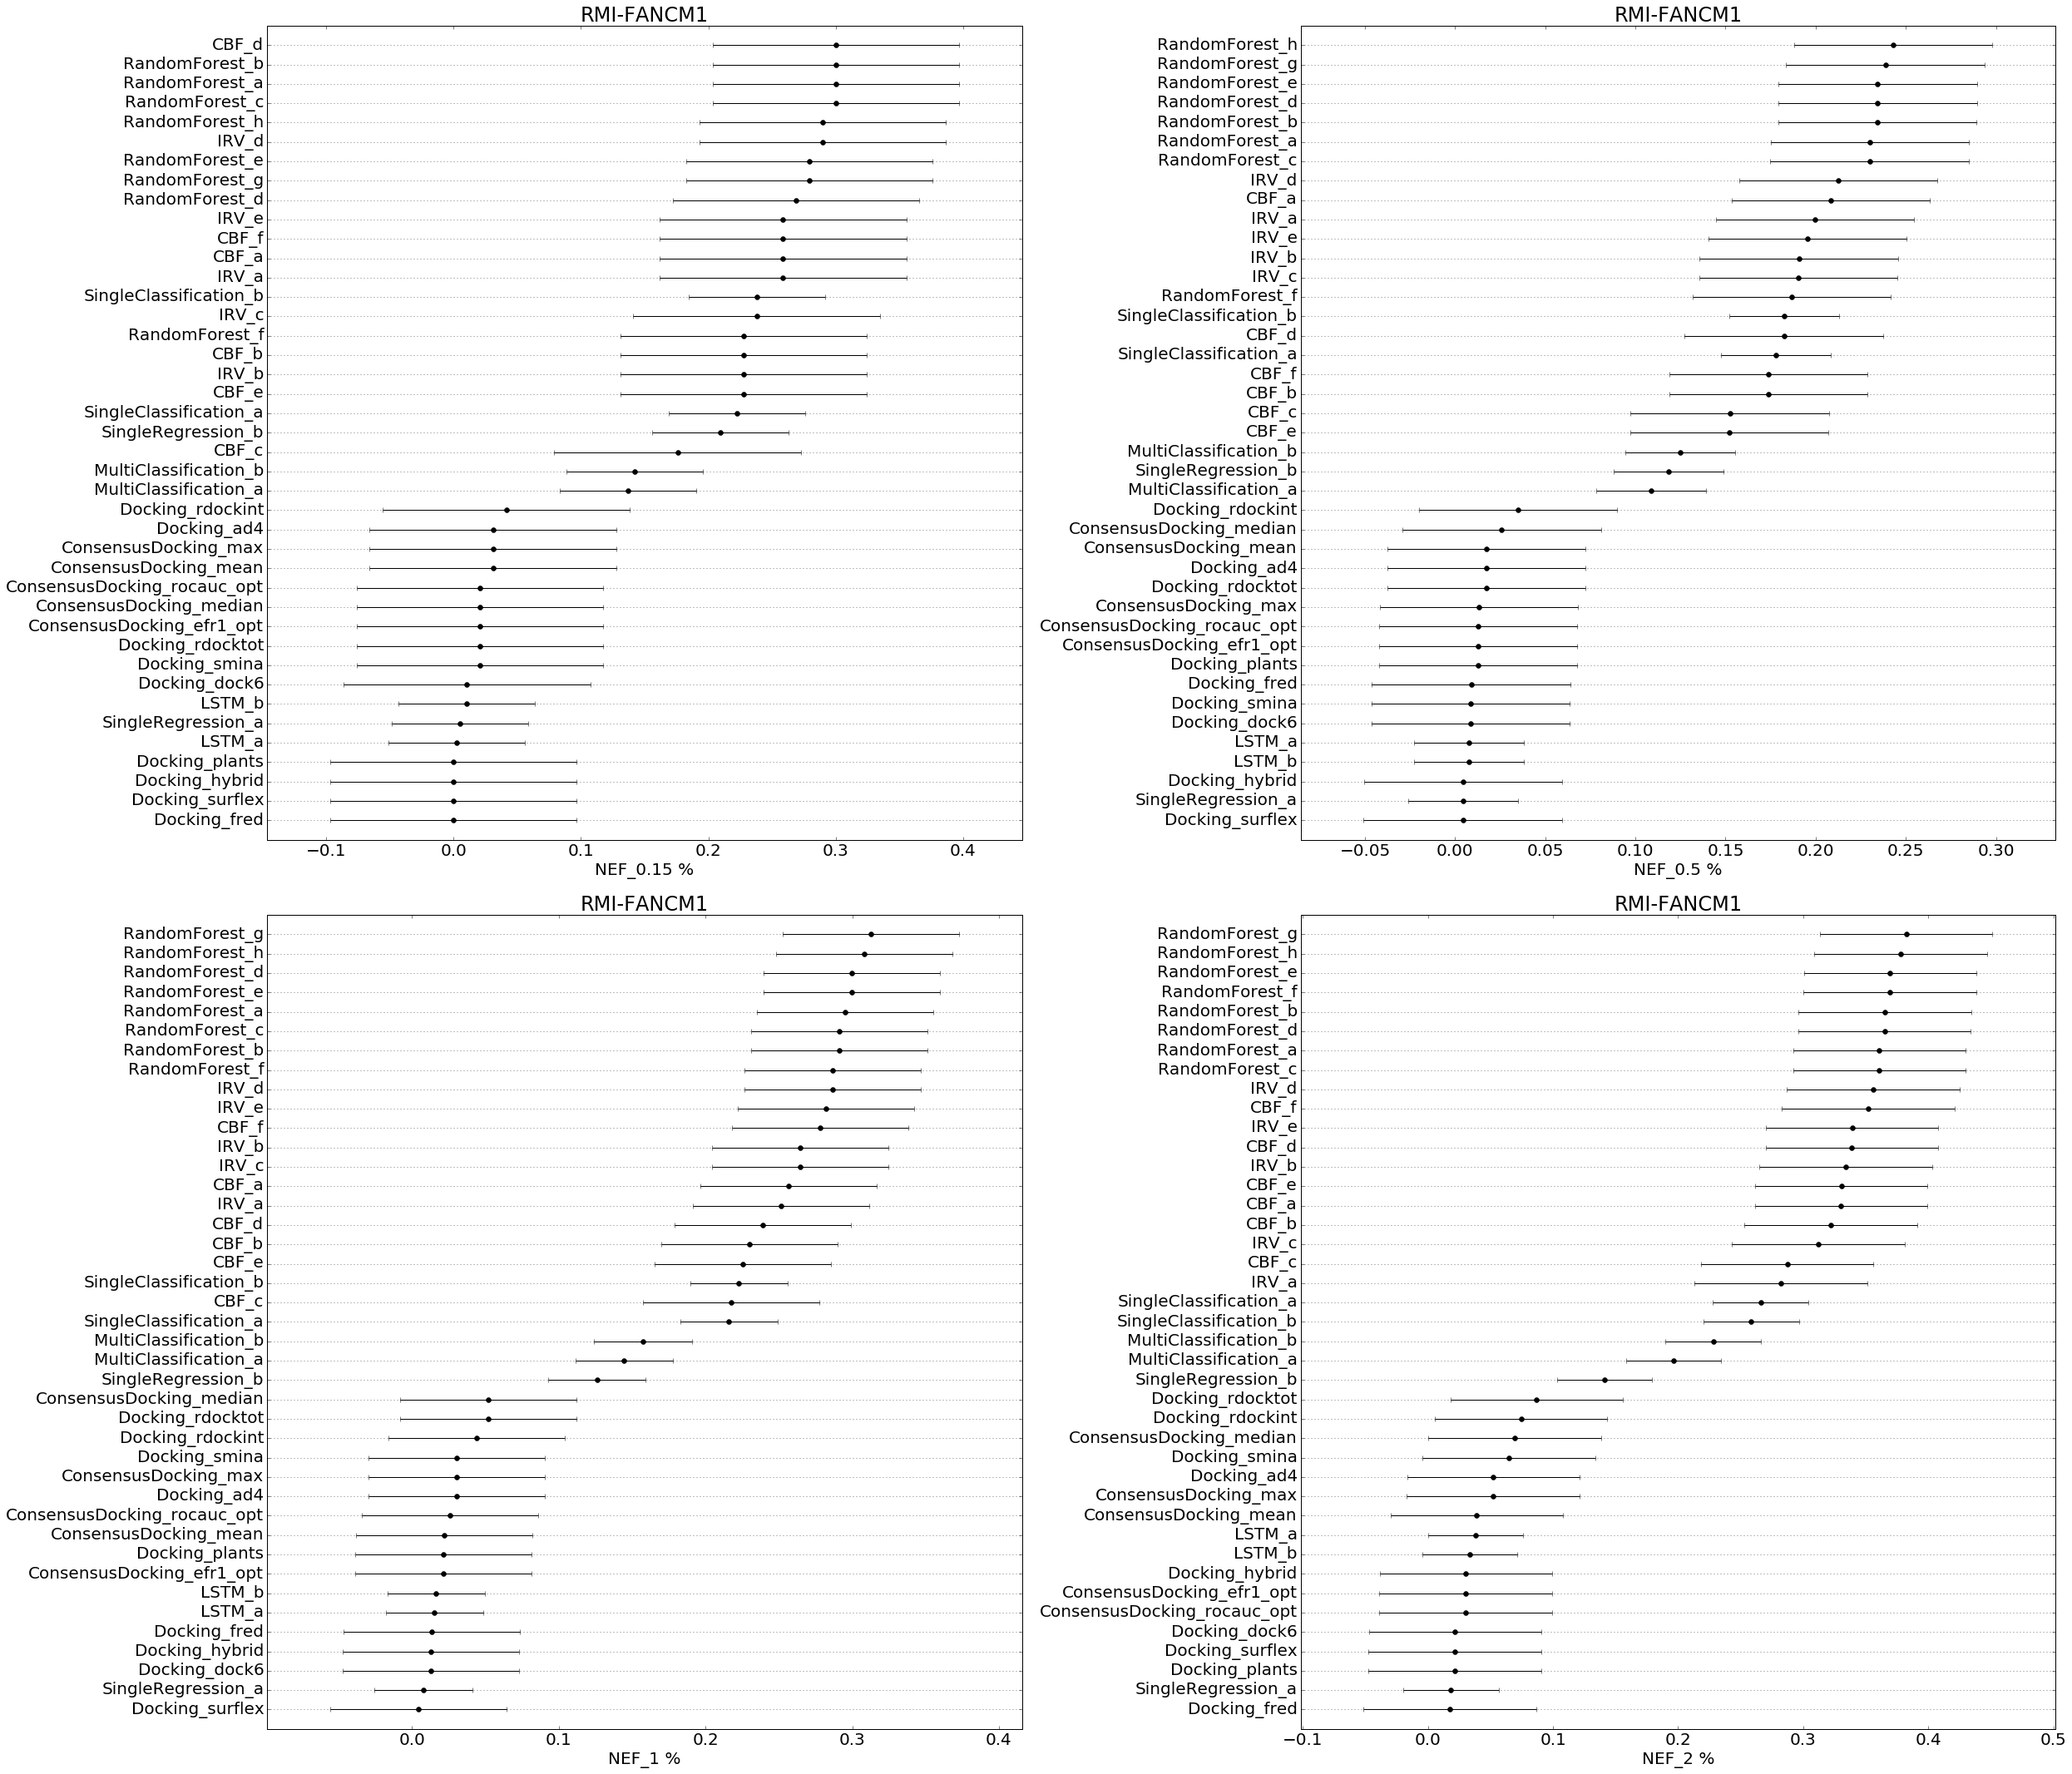

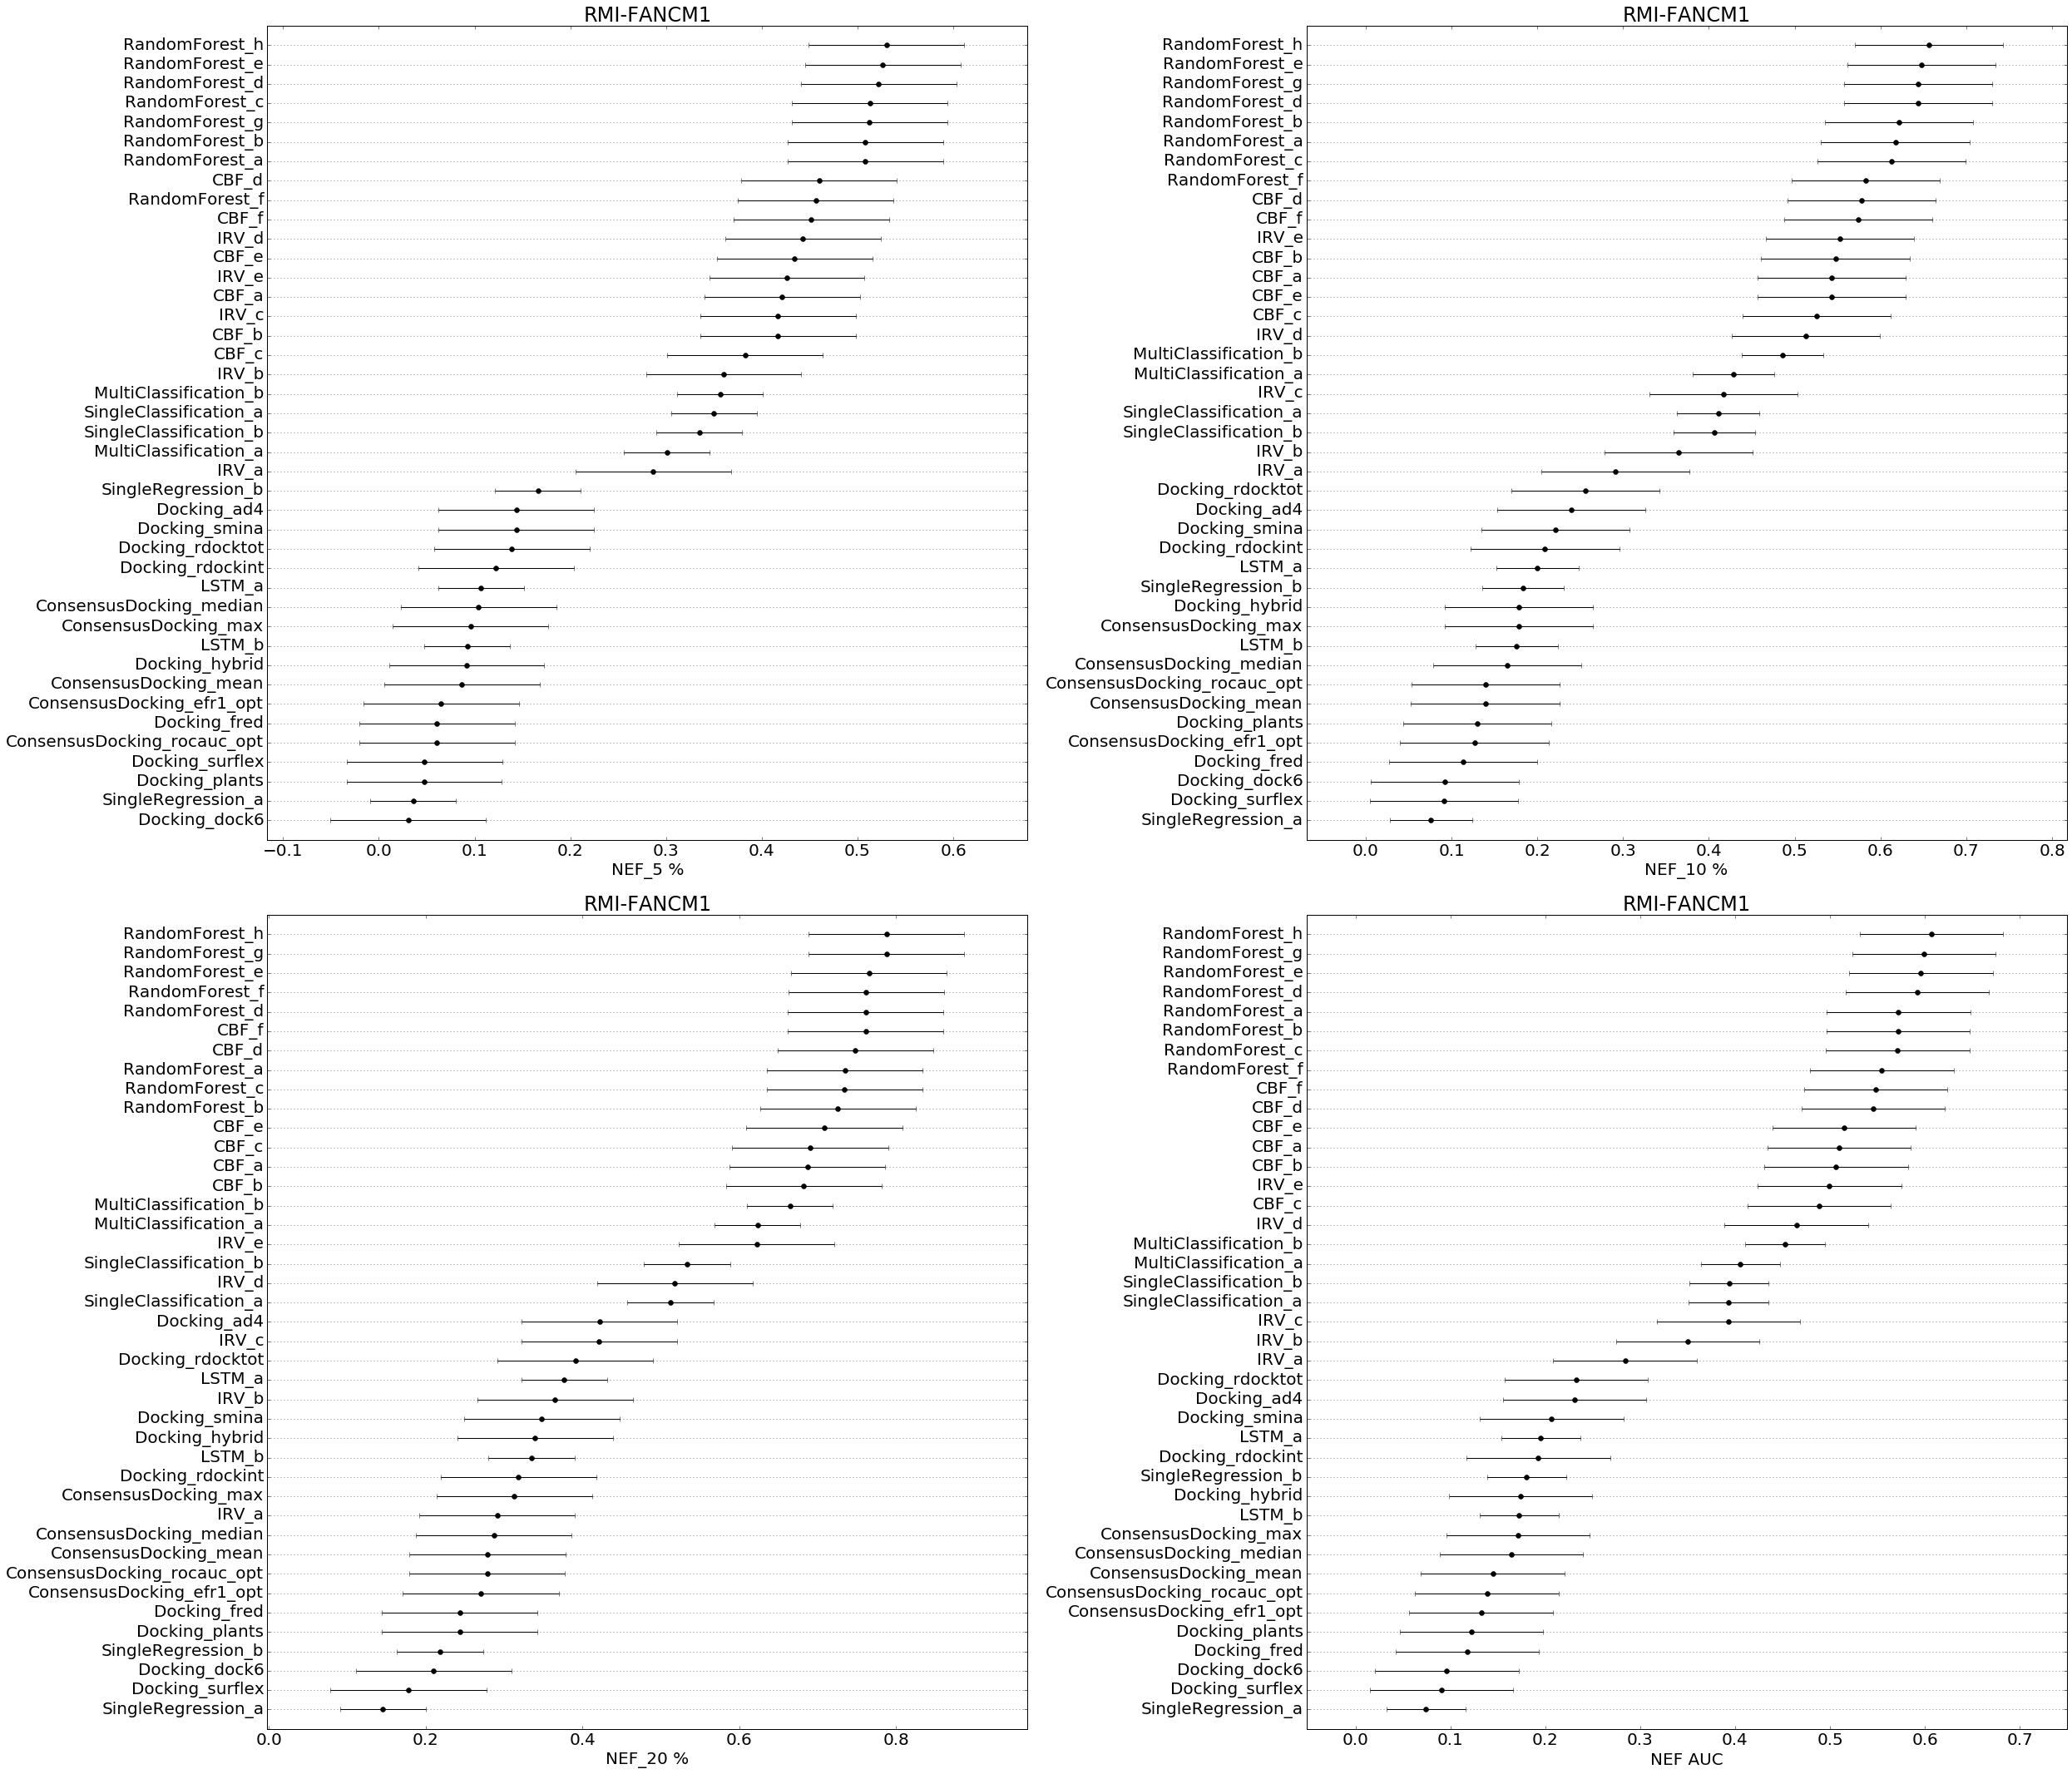

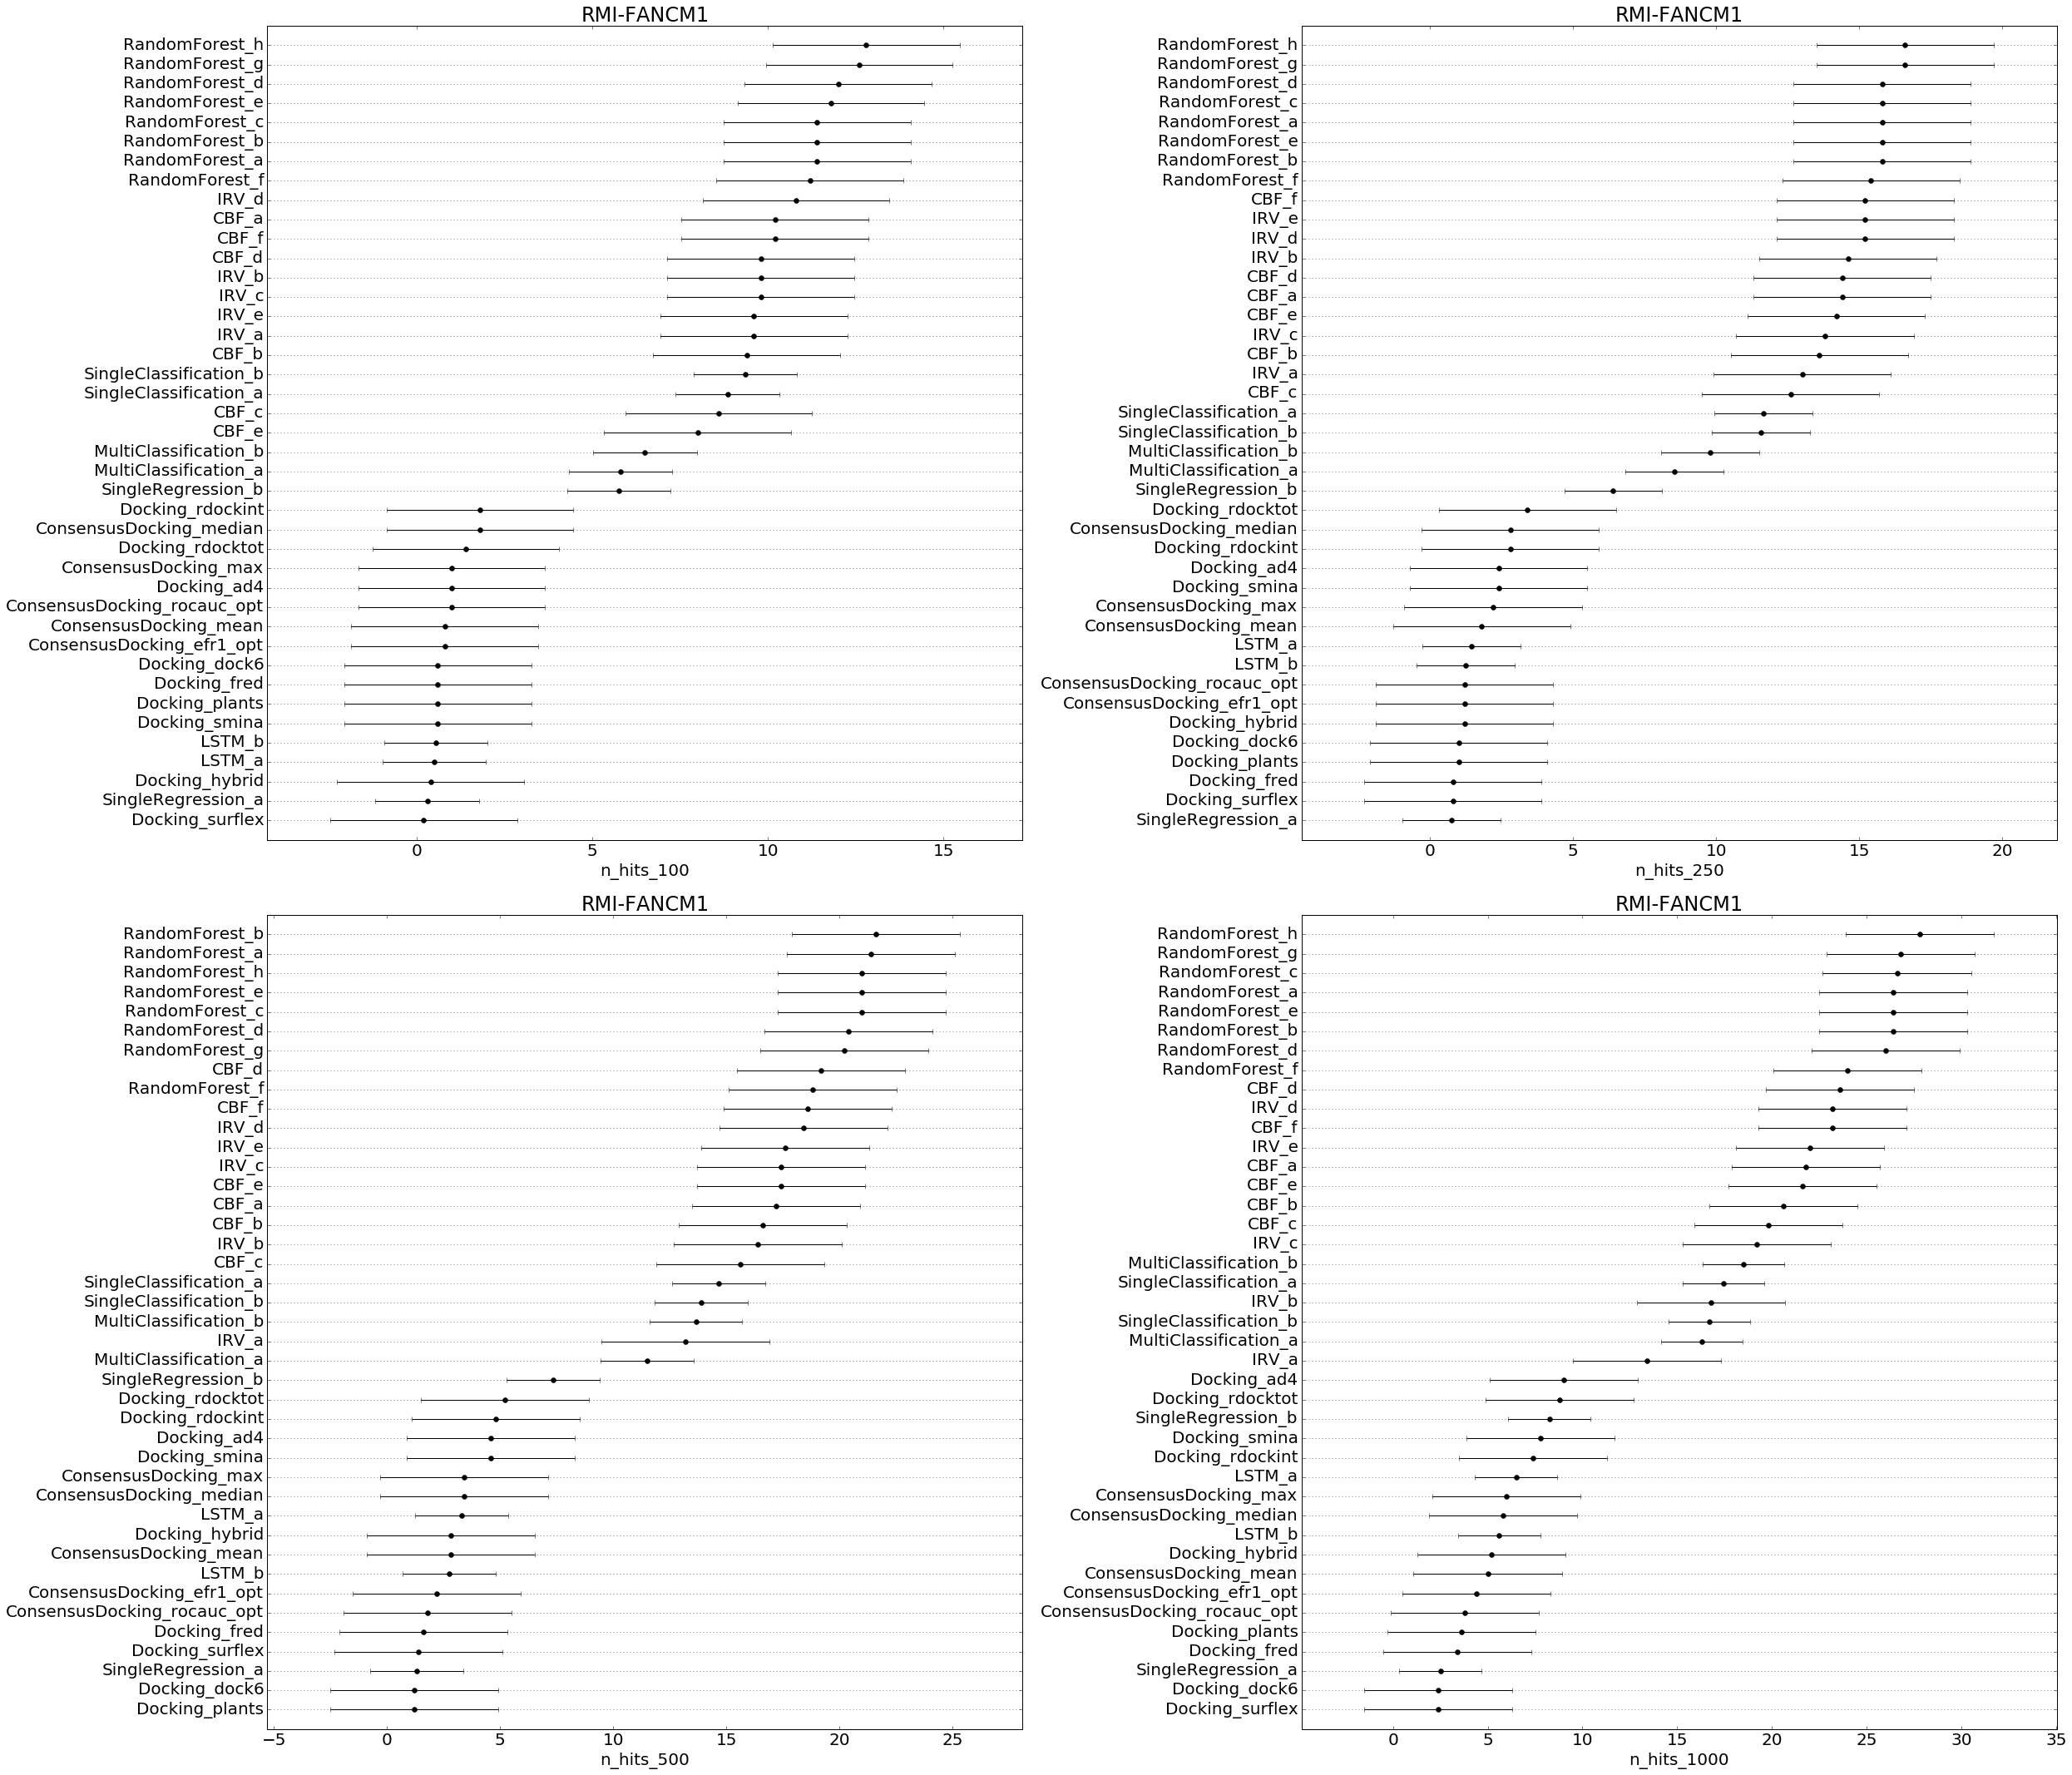

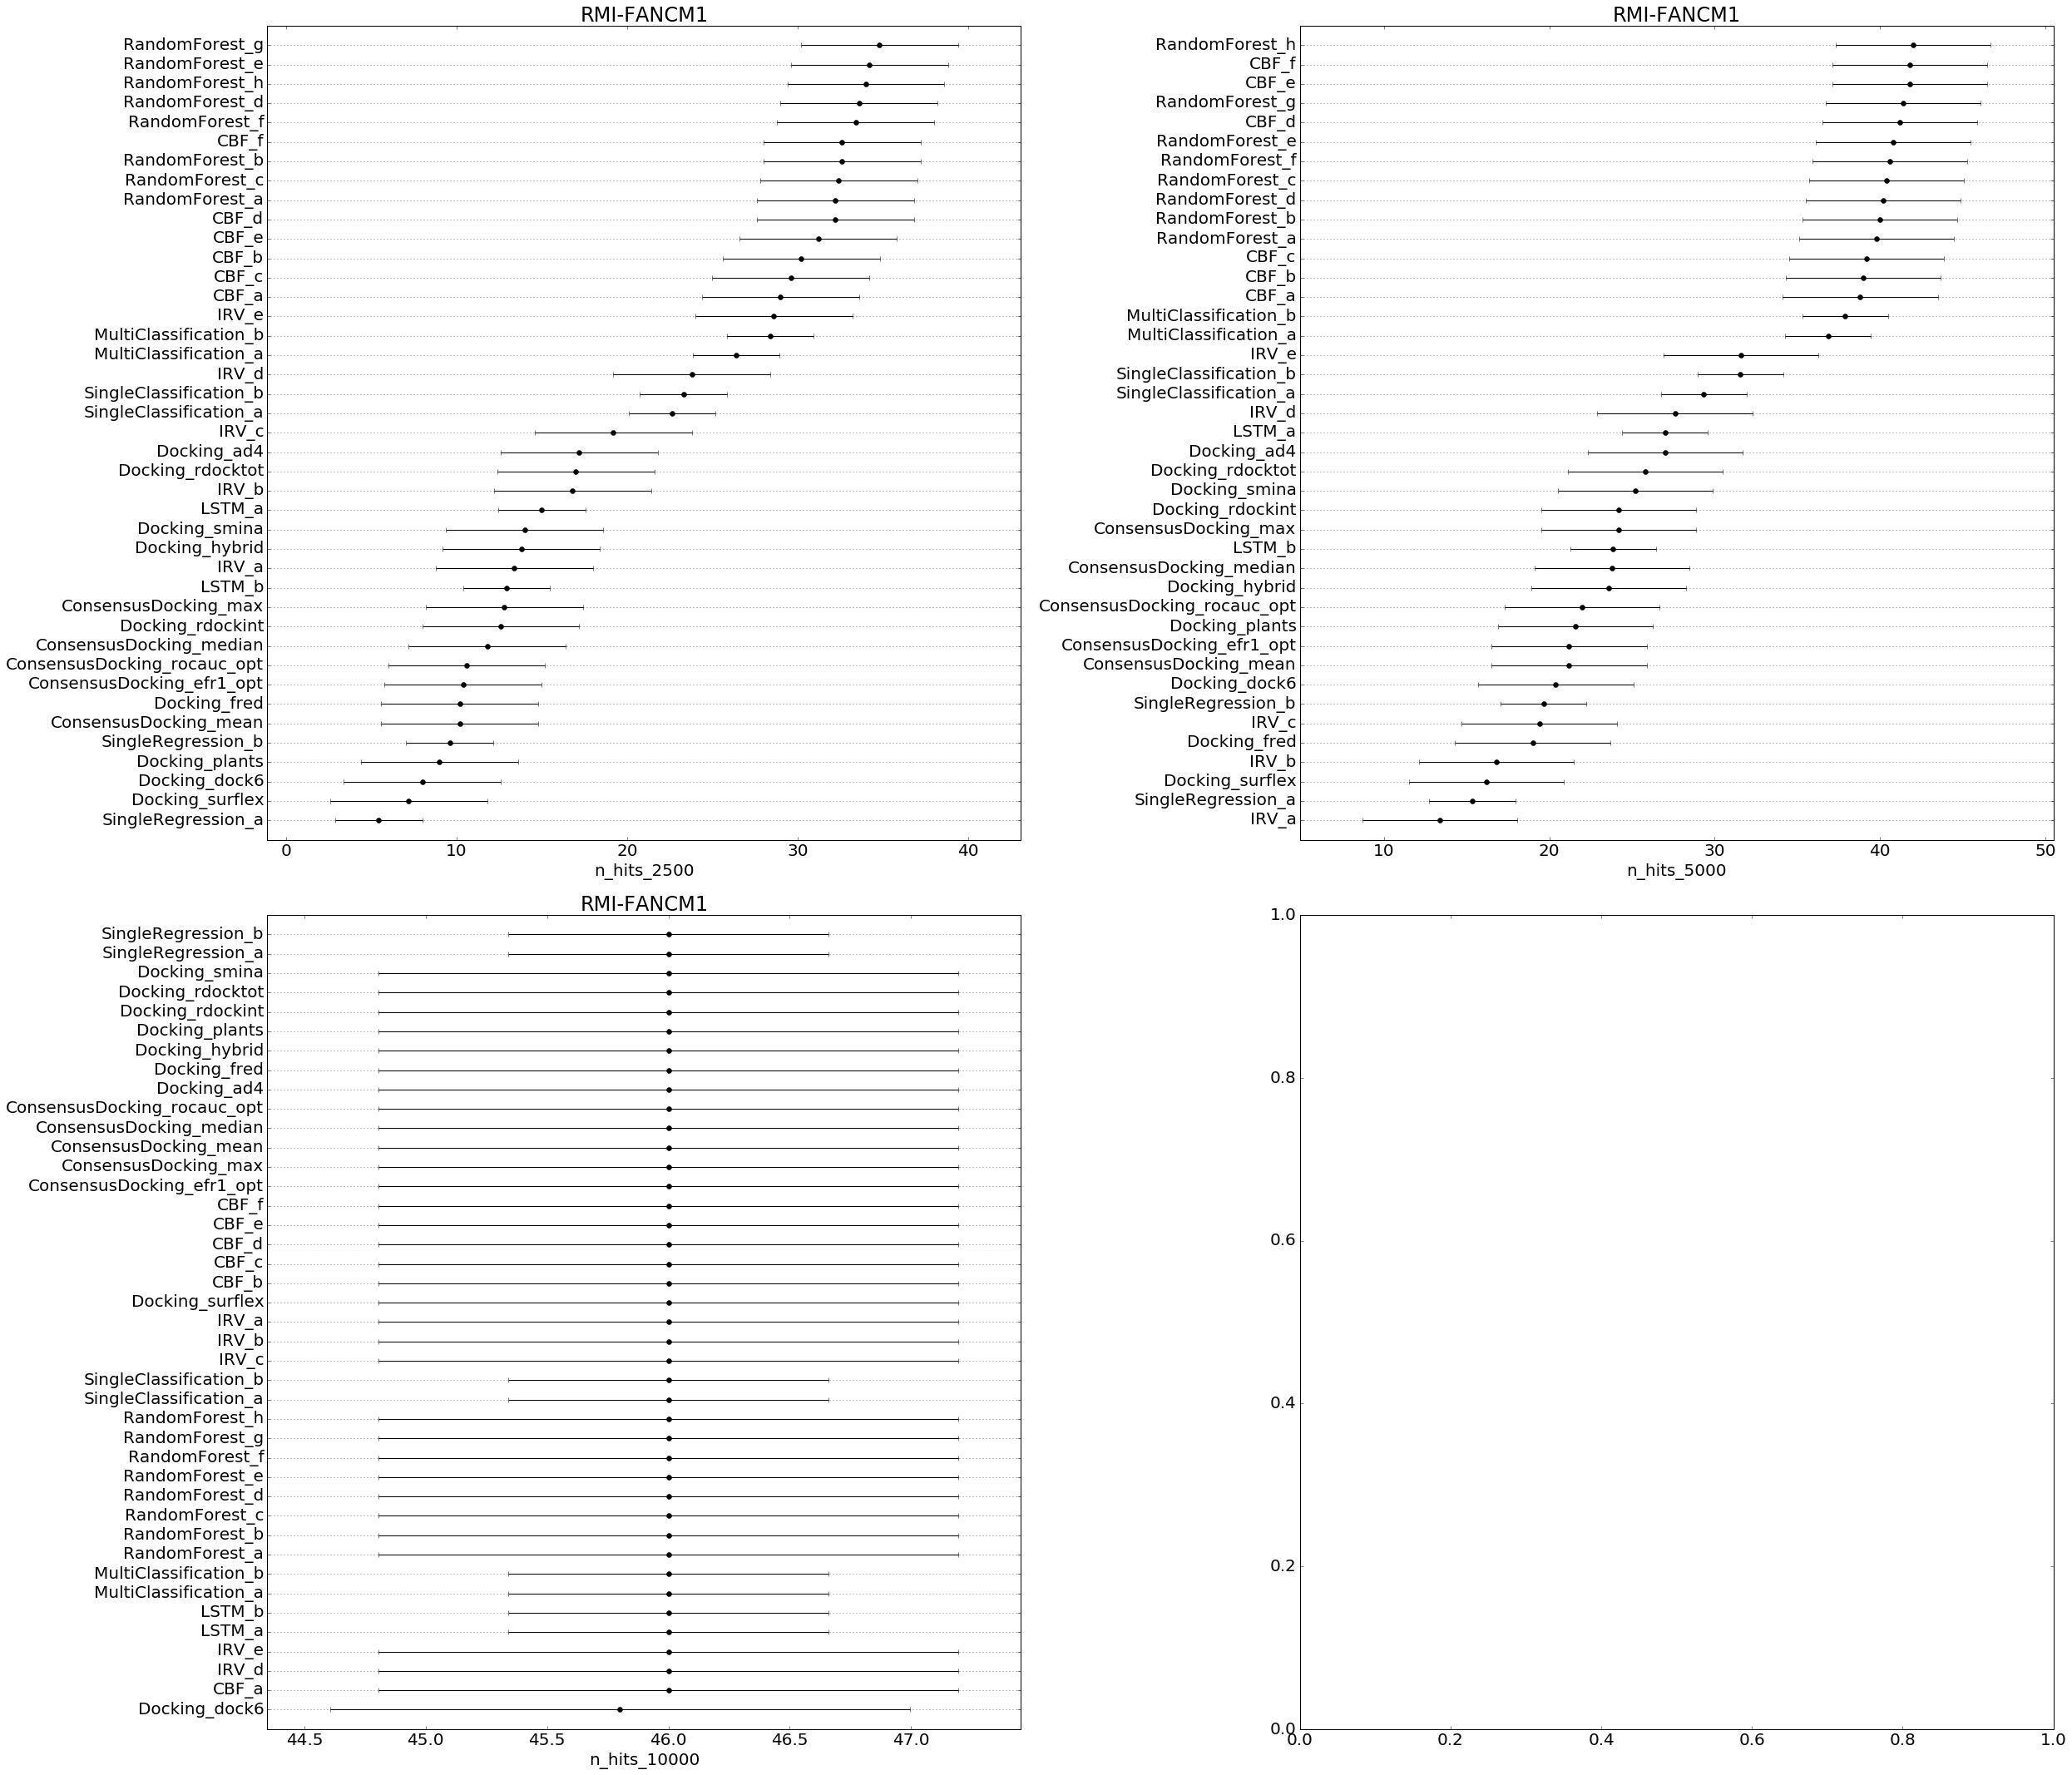

In [11]:
#plot uconf for all metrics
matplotlib.rcParams.update({'font.size': 20})
labels=['PriA-SSB AS','PriA-SSB FP','RMI-FANCM1']
plot_uconf_grid(tukey_dict, metric_names, labels, save_dir='./cv_ps_figures/cv_uconf_complete/', figsize=(35,30))

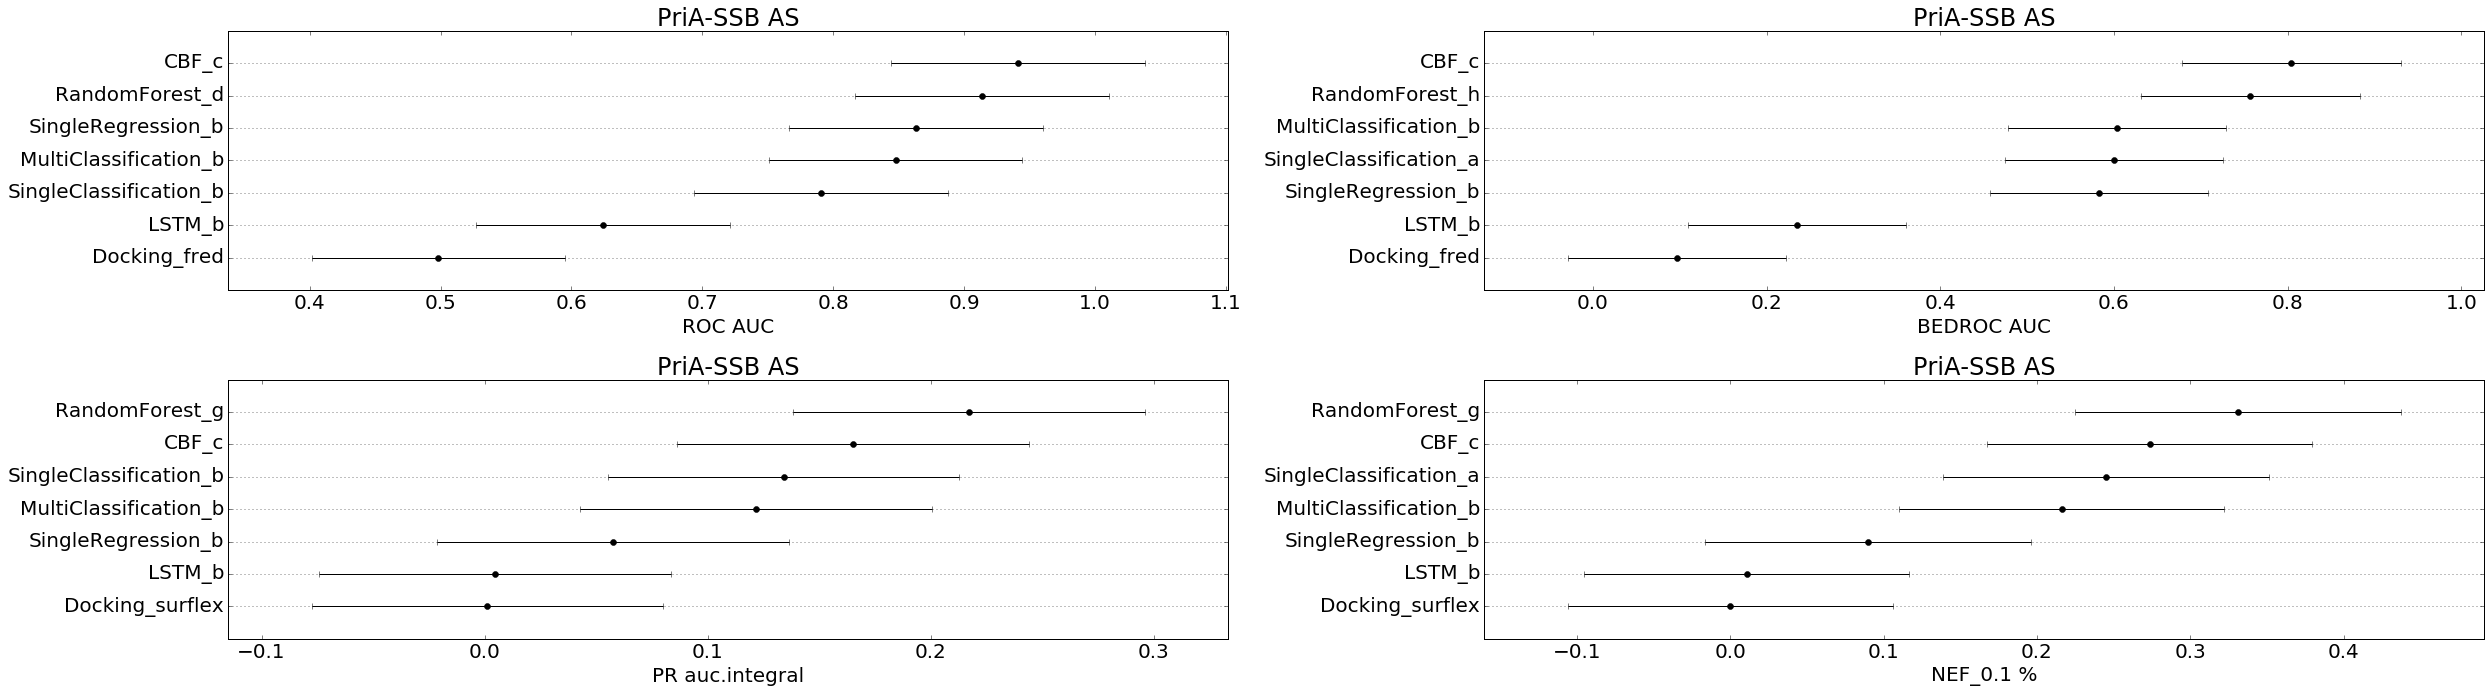

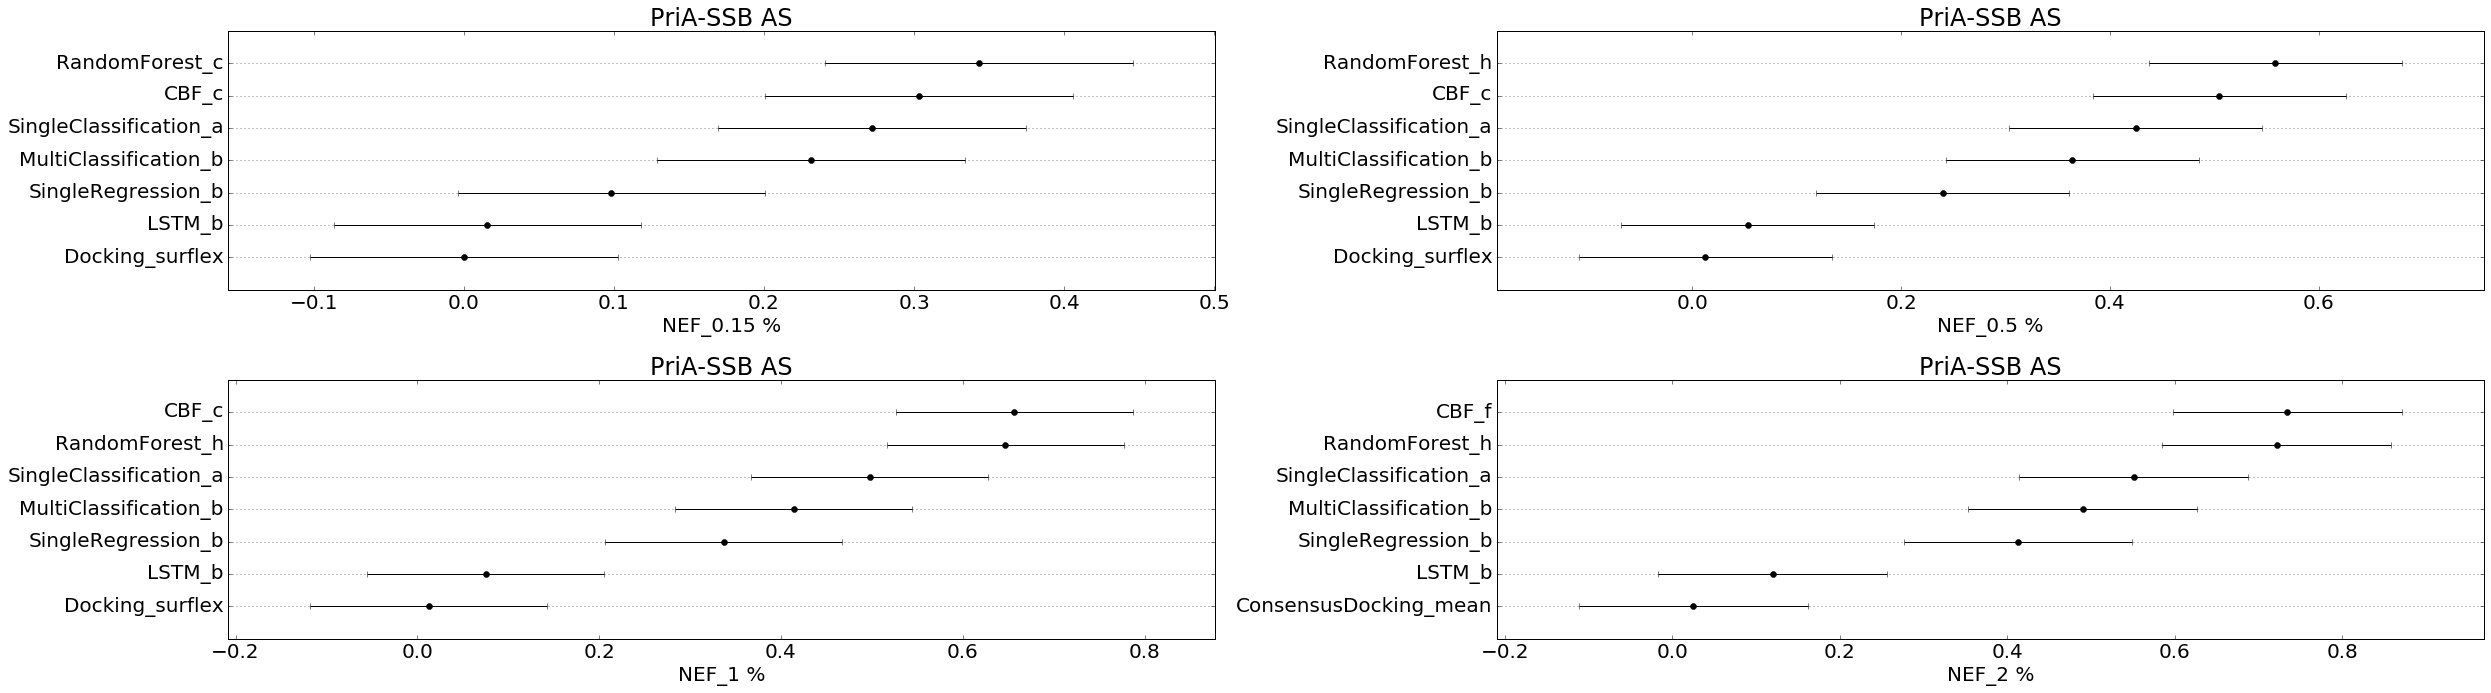

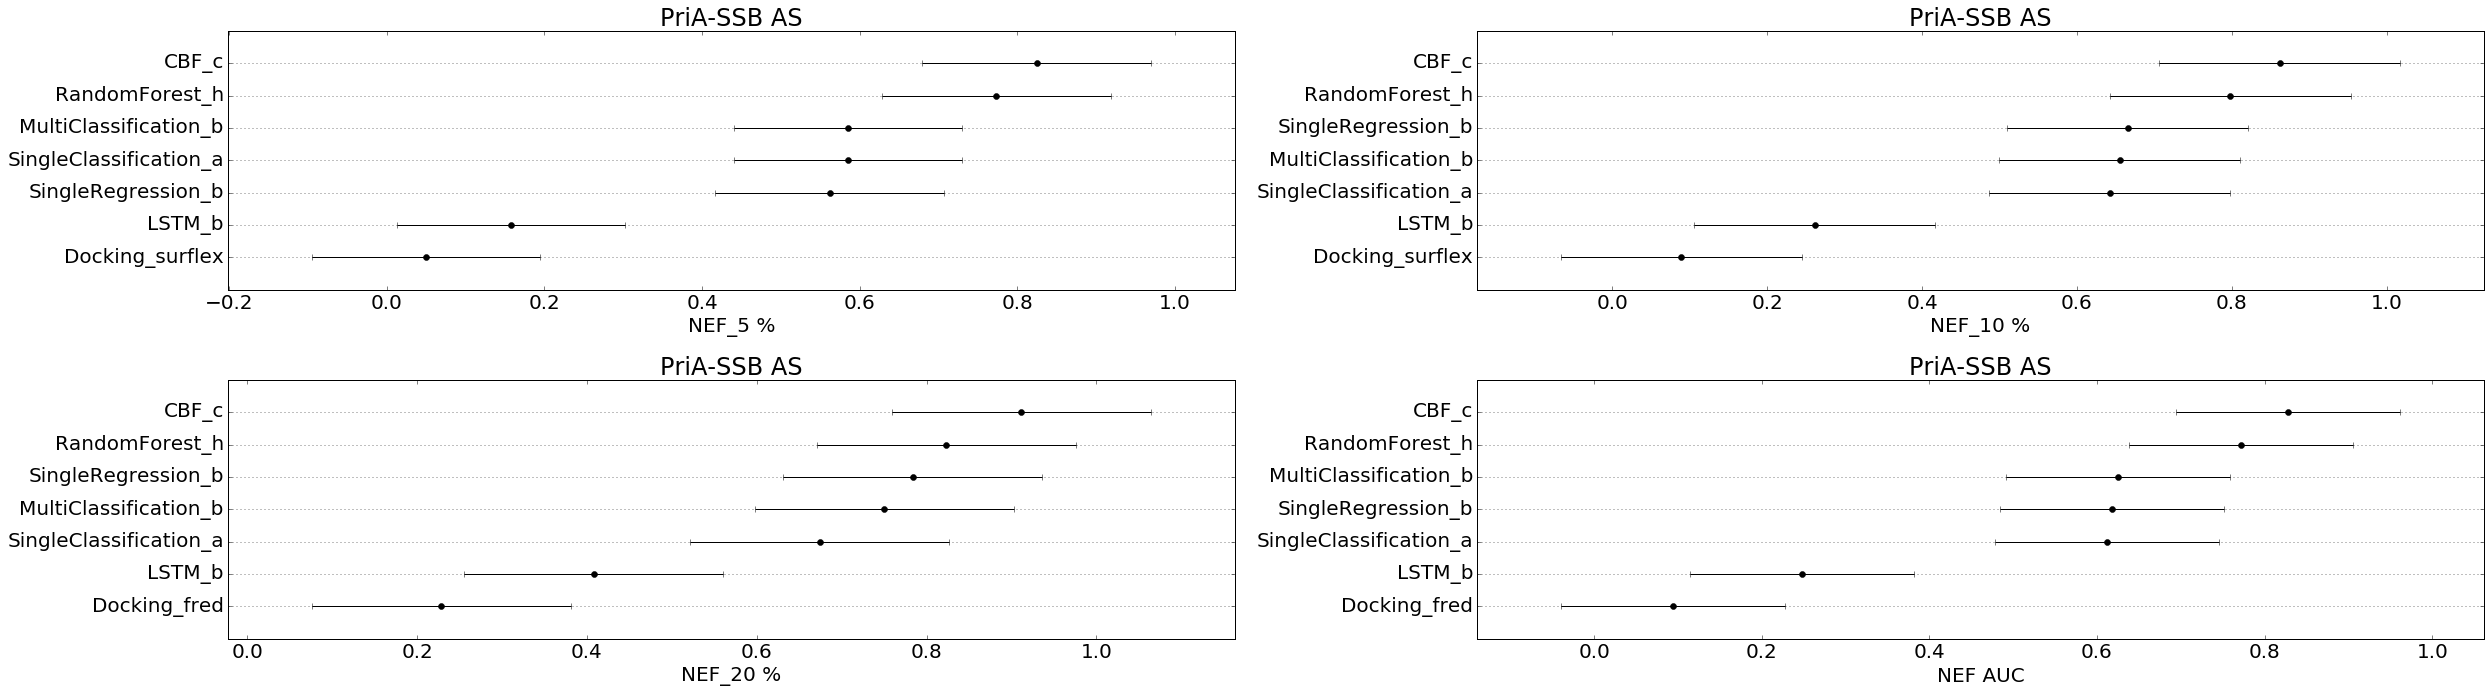

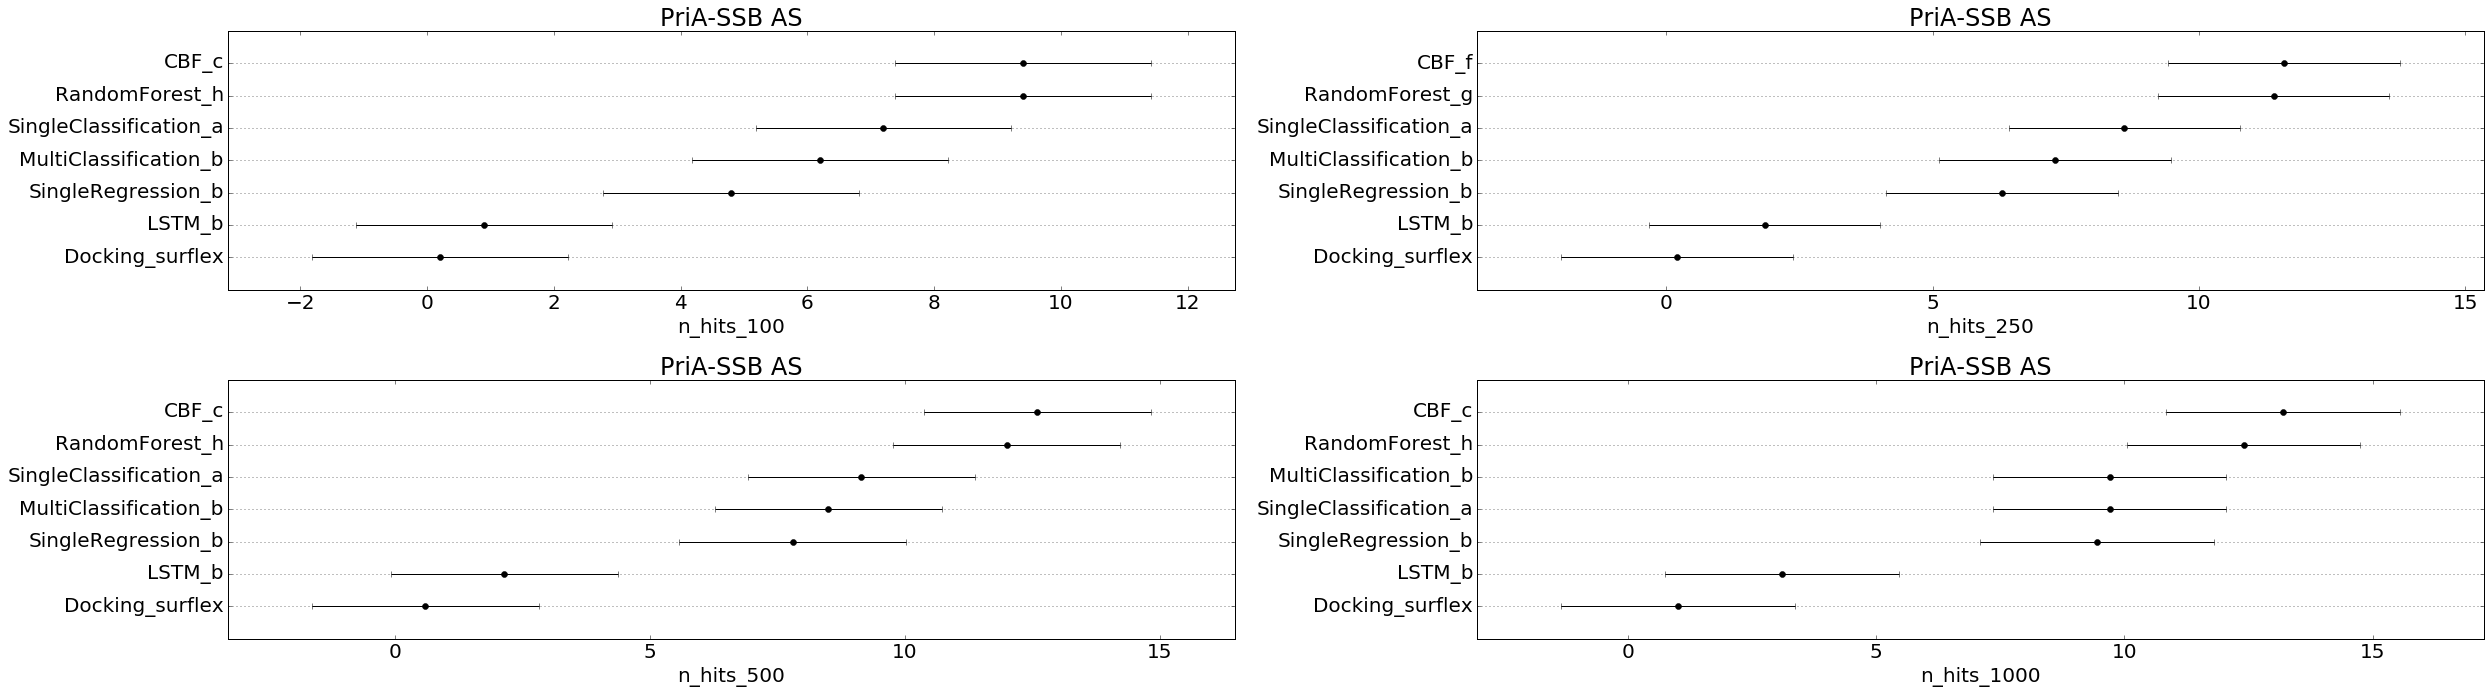

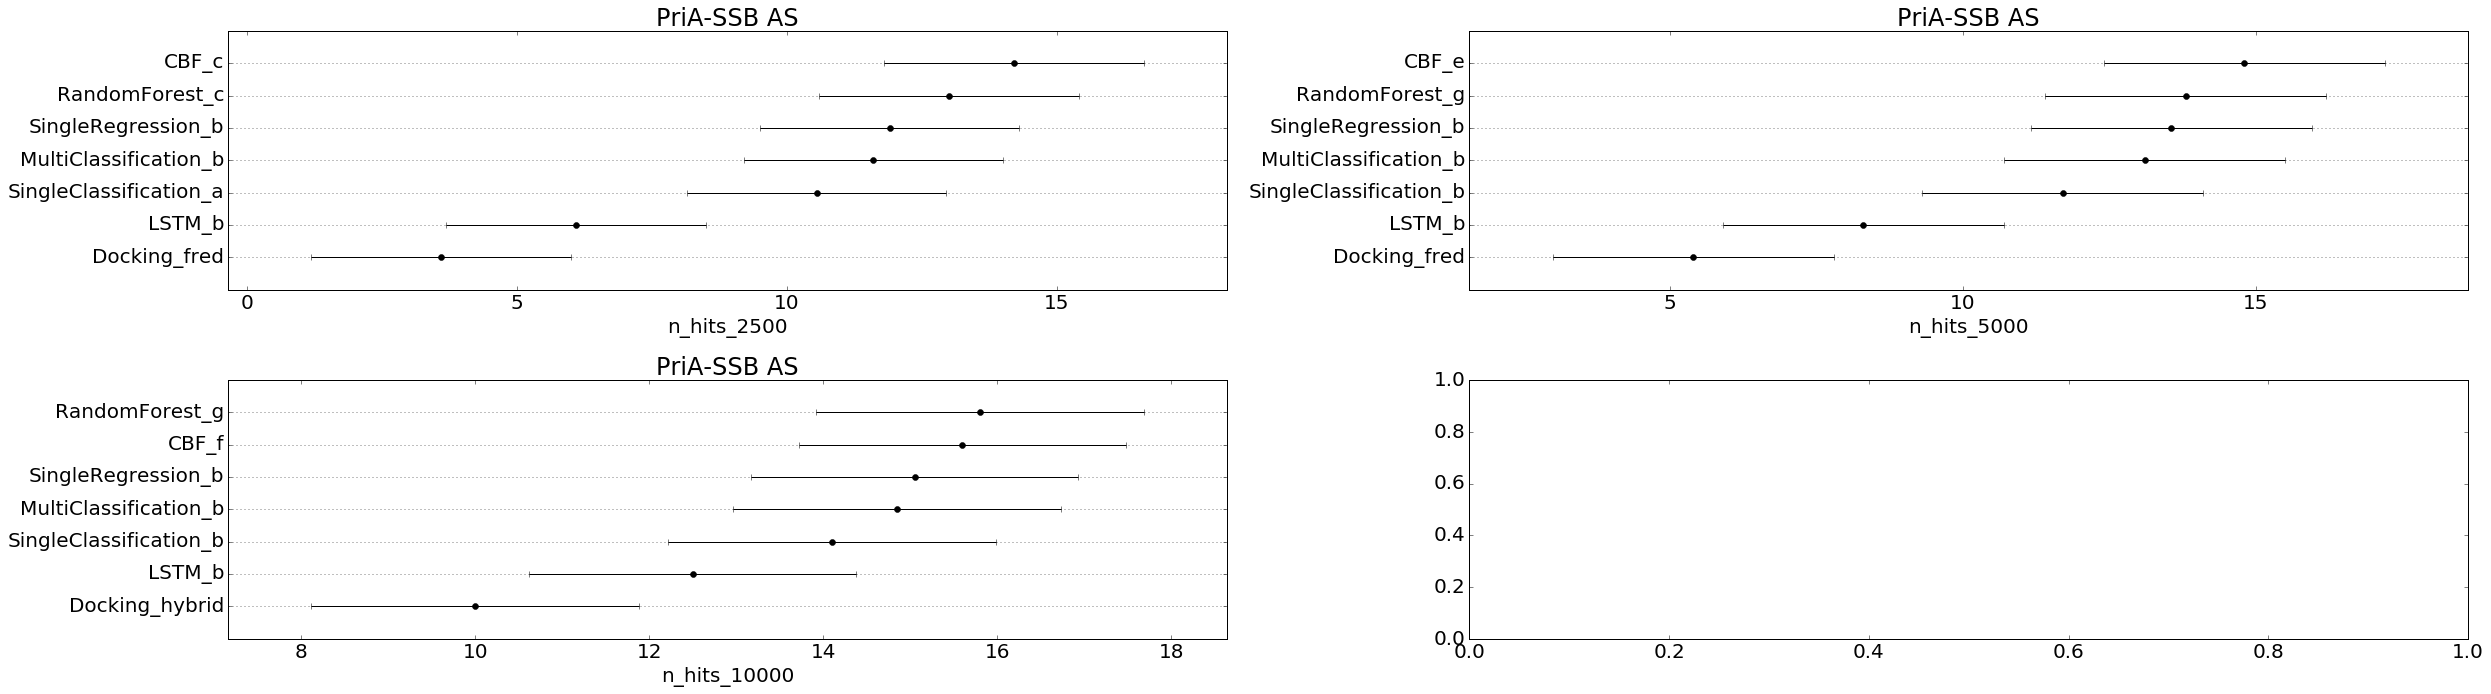

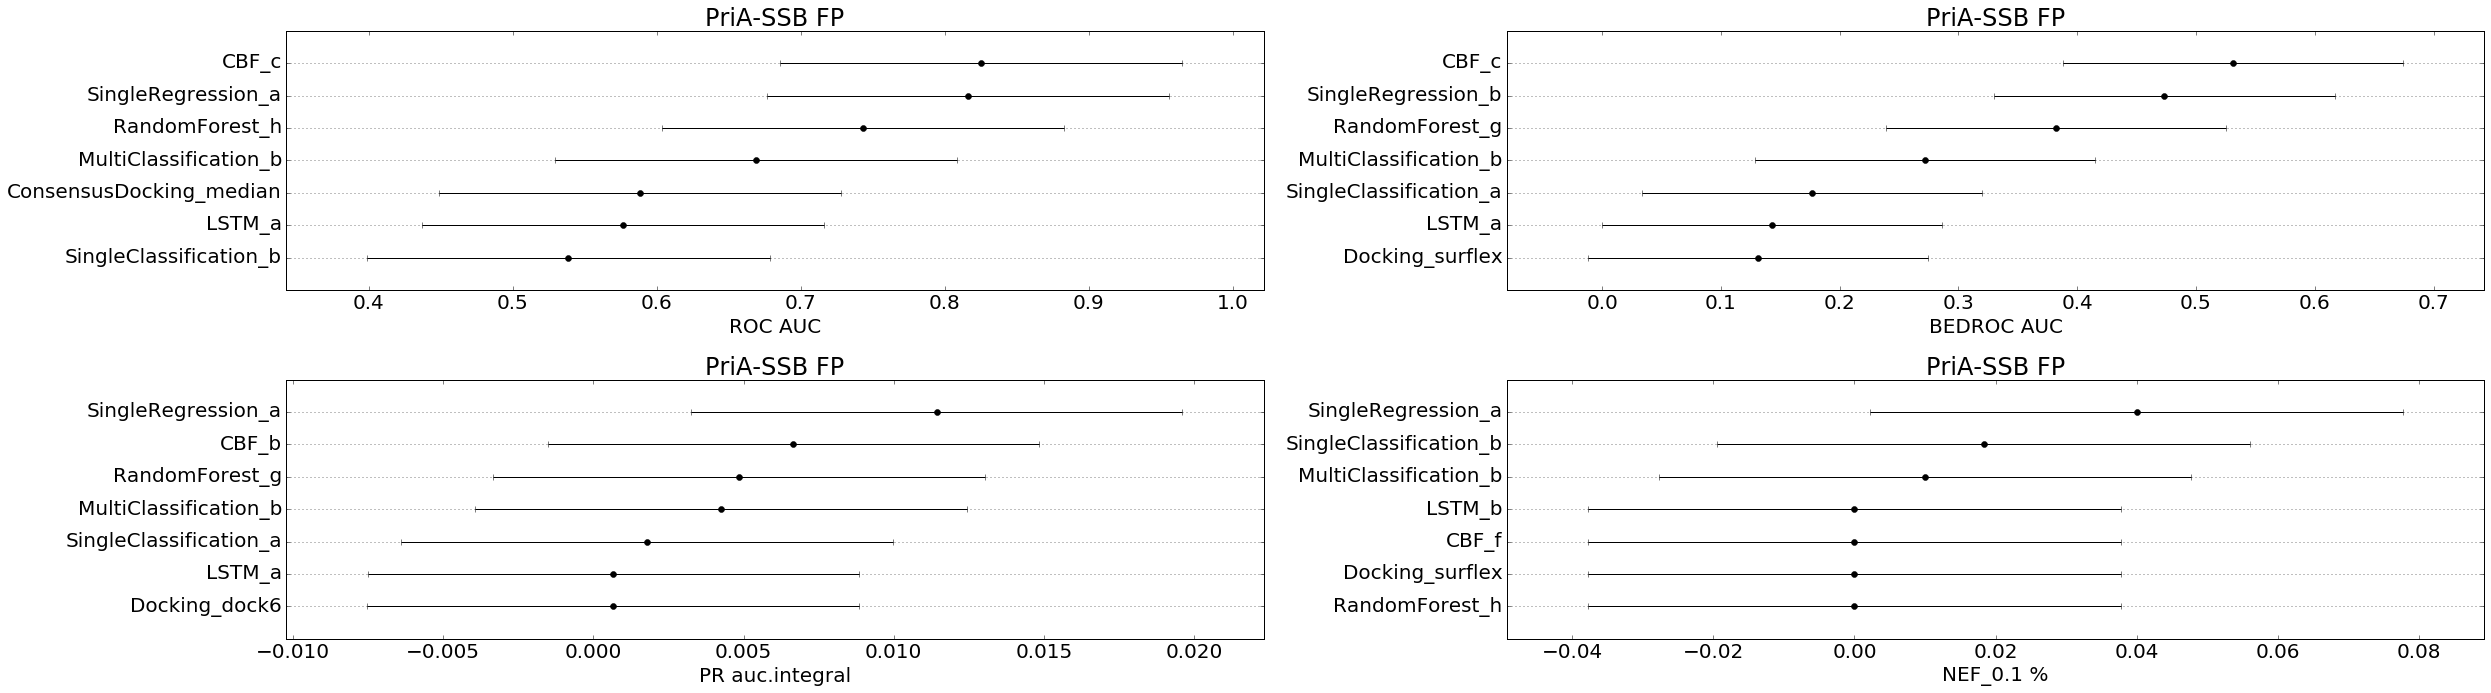

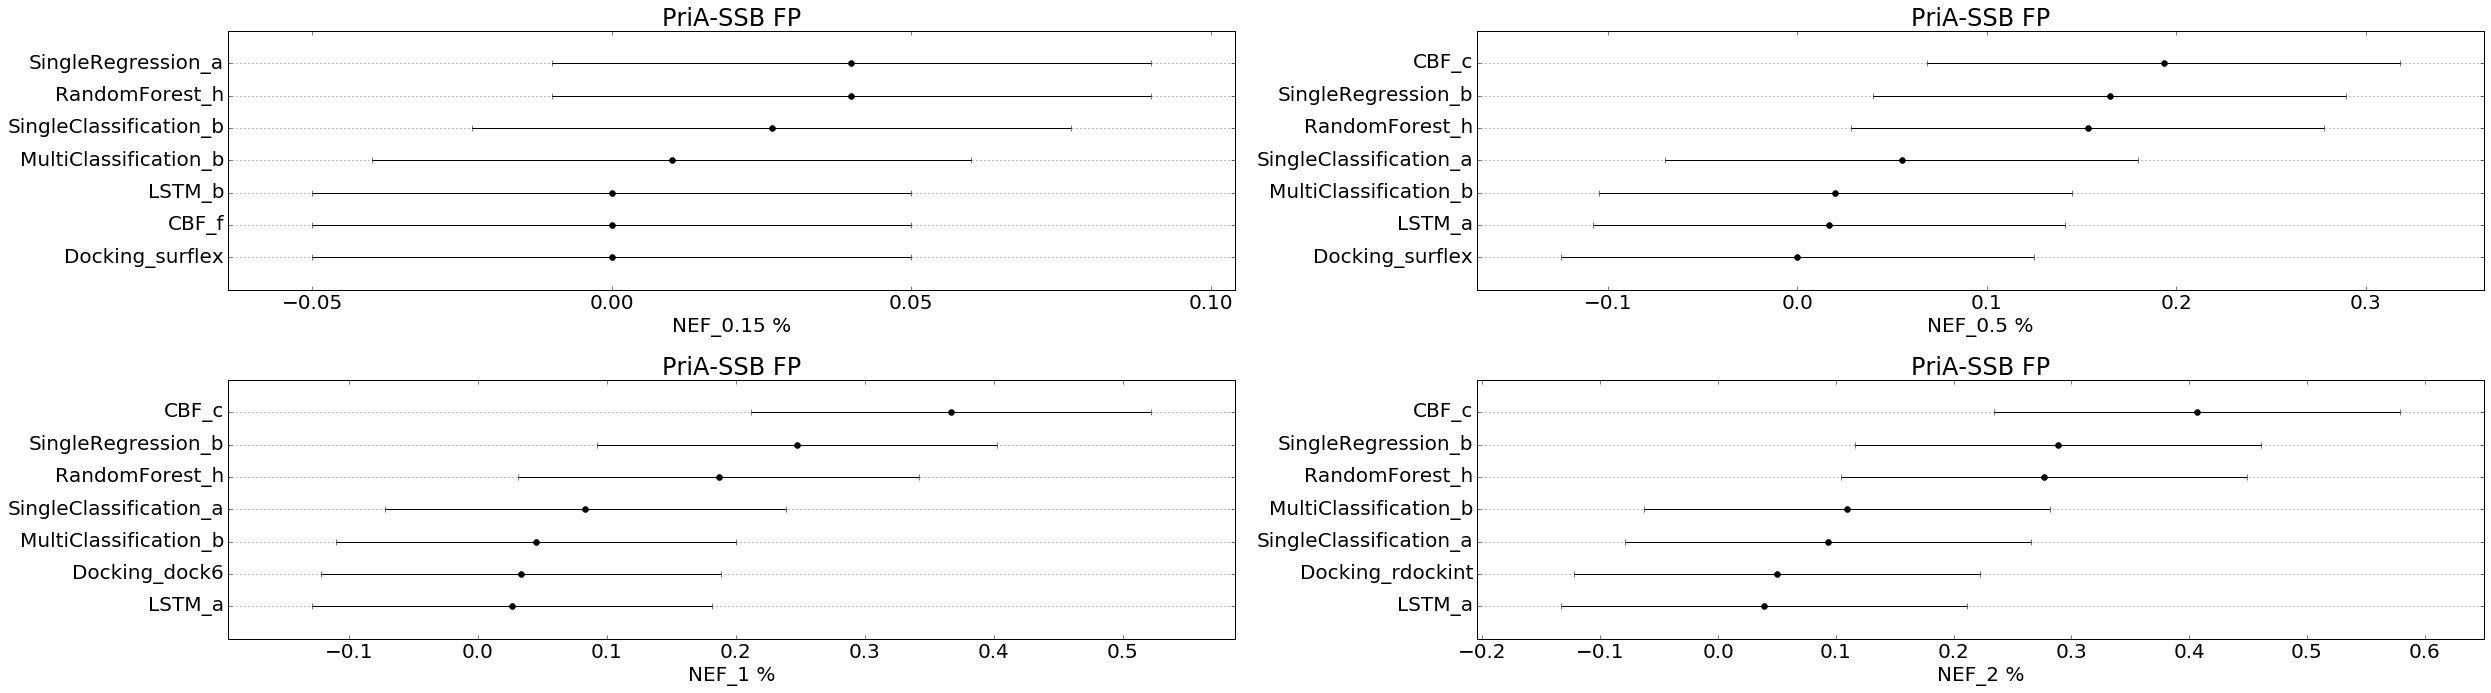

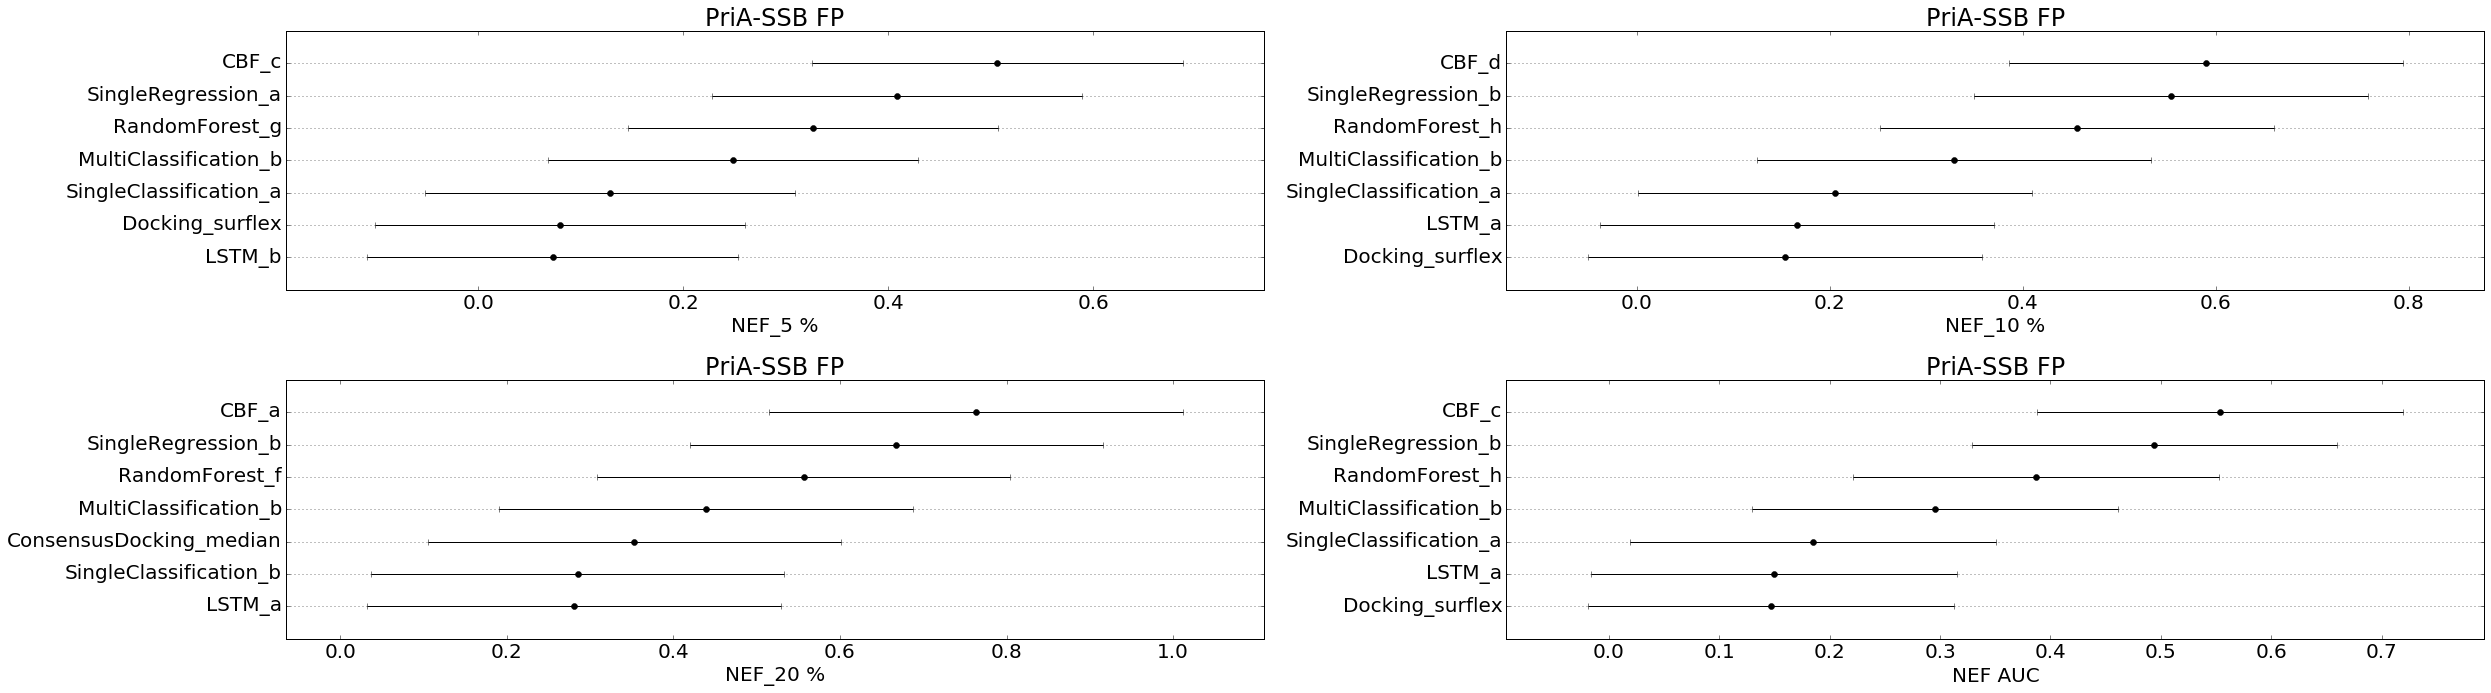

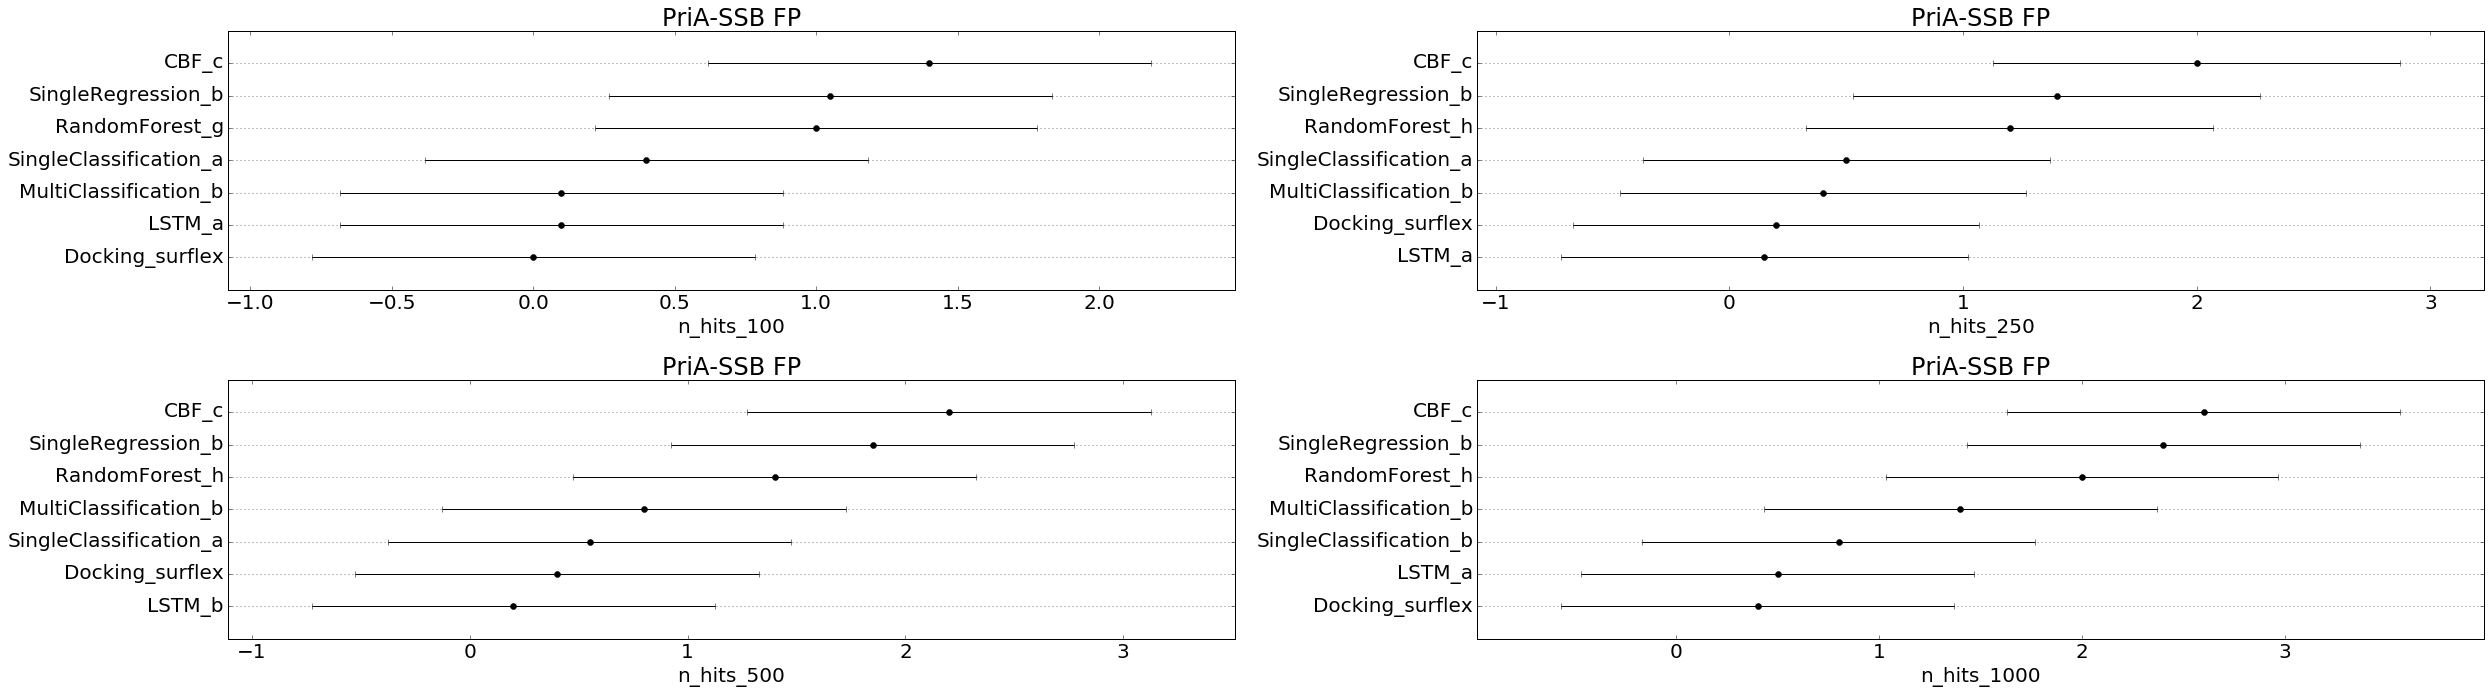

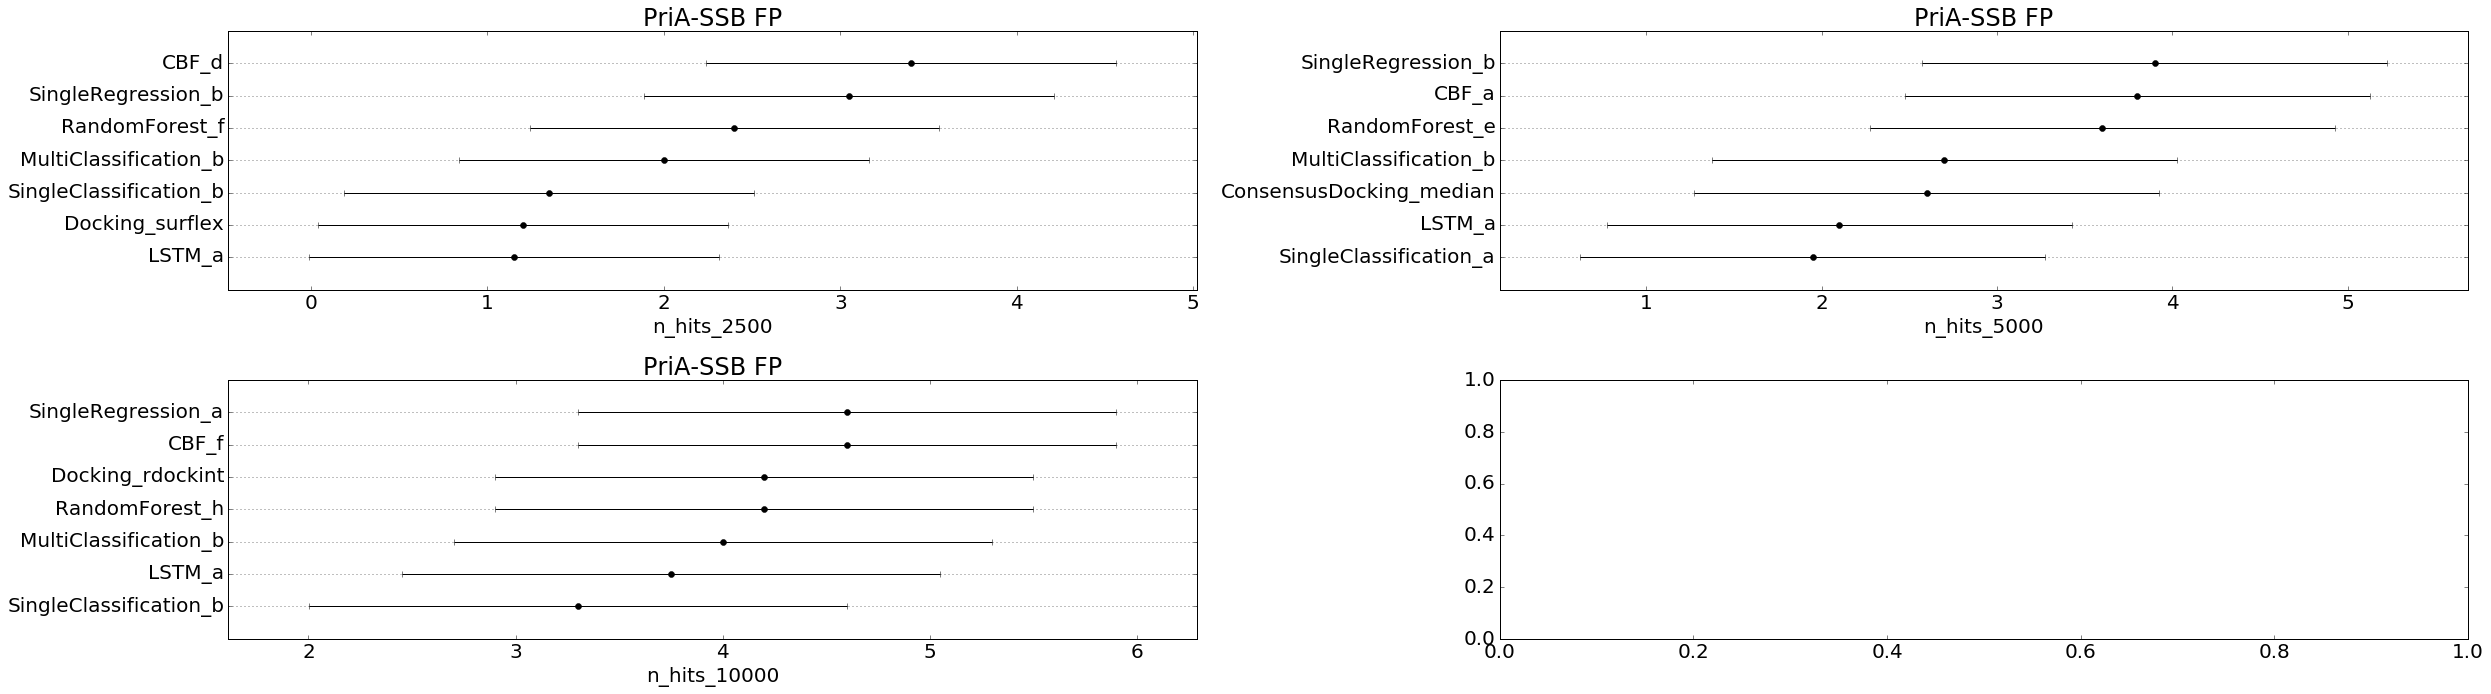

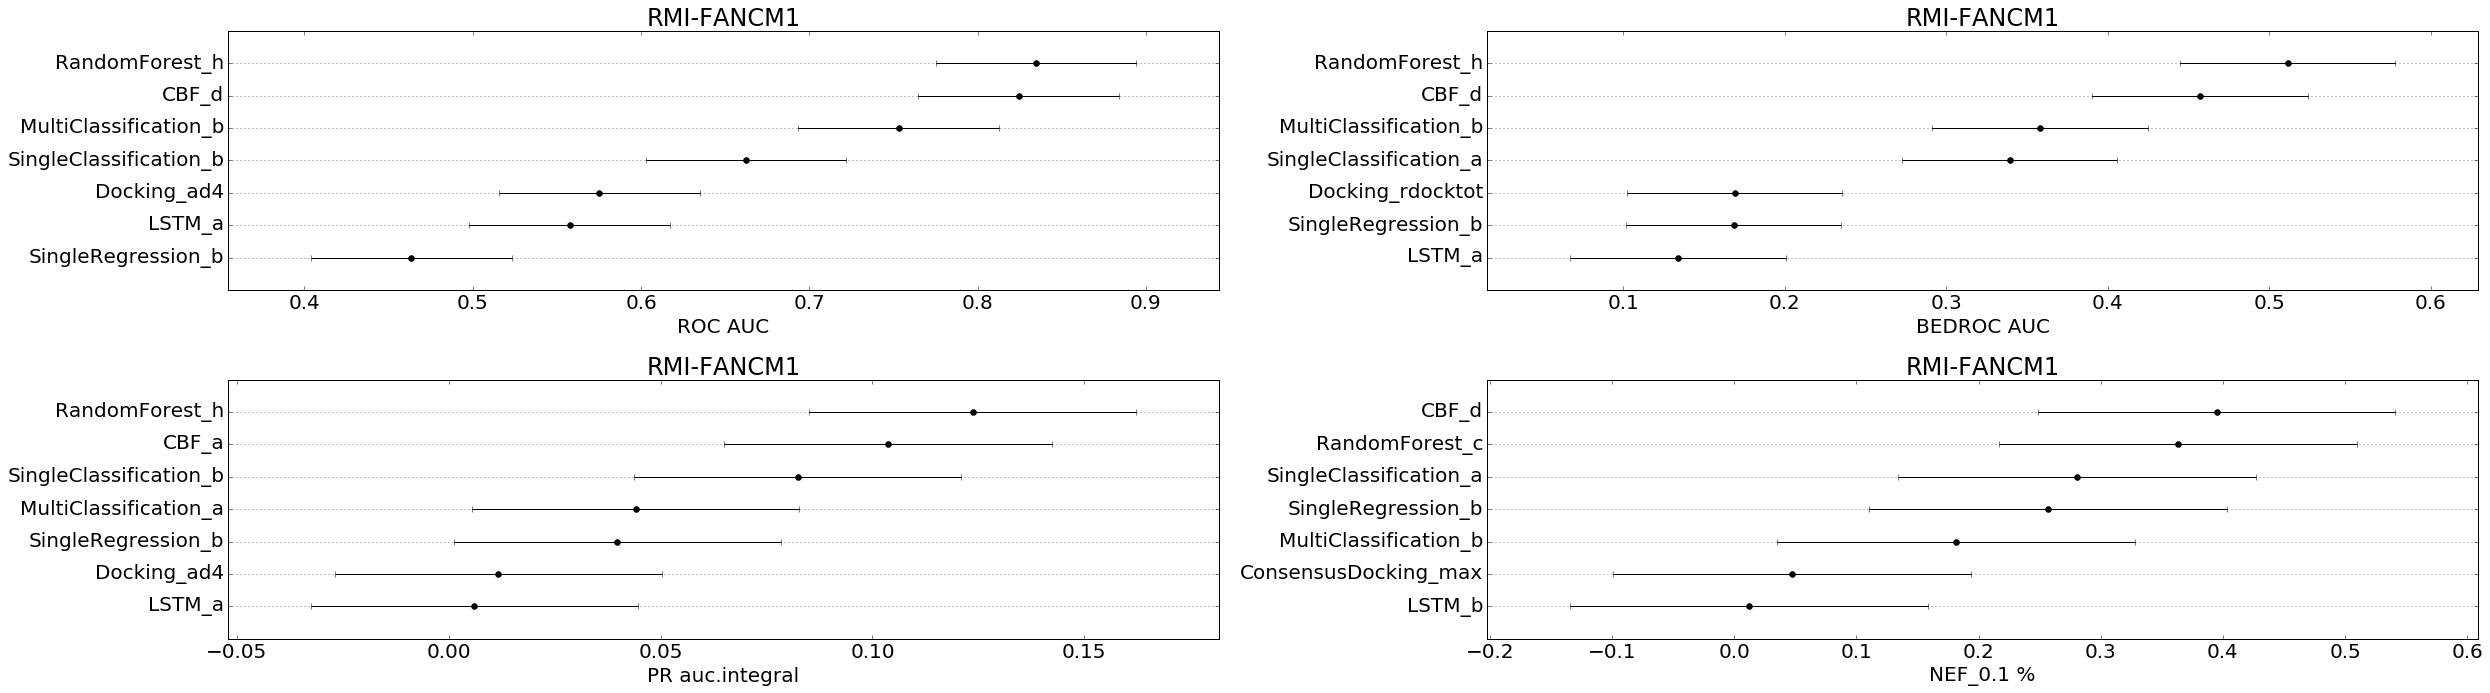

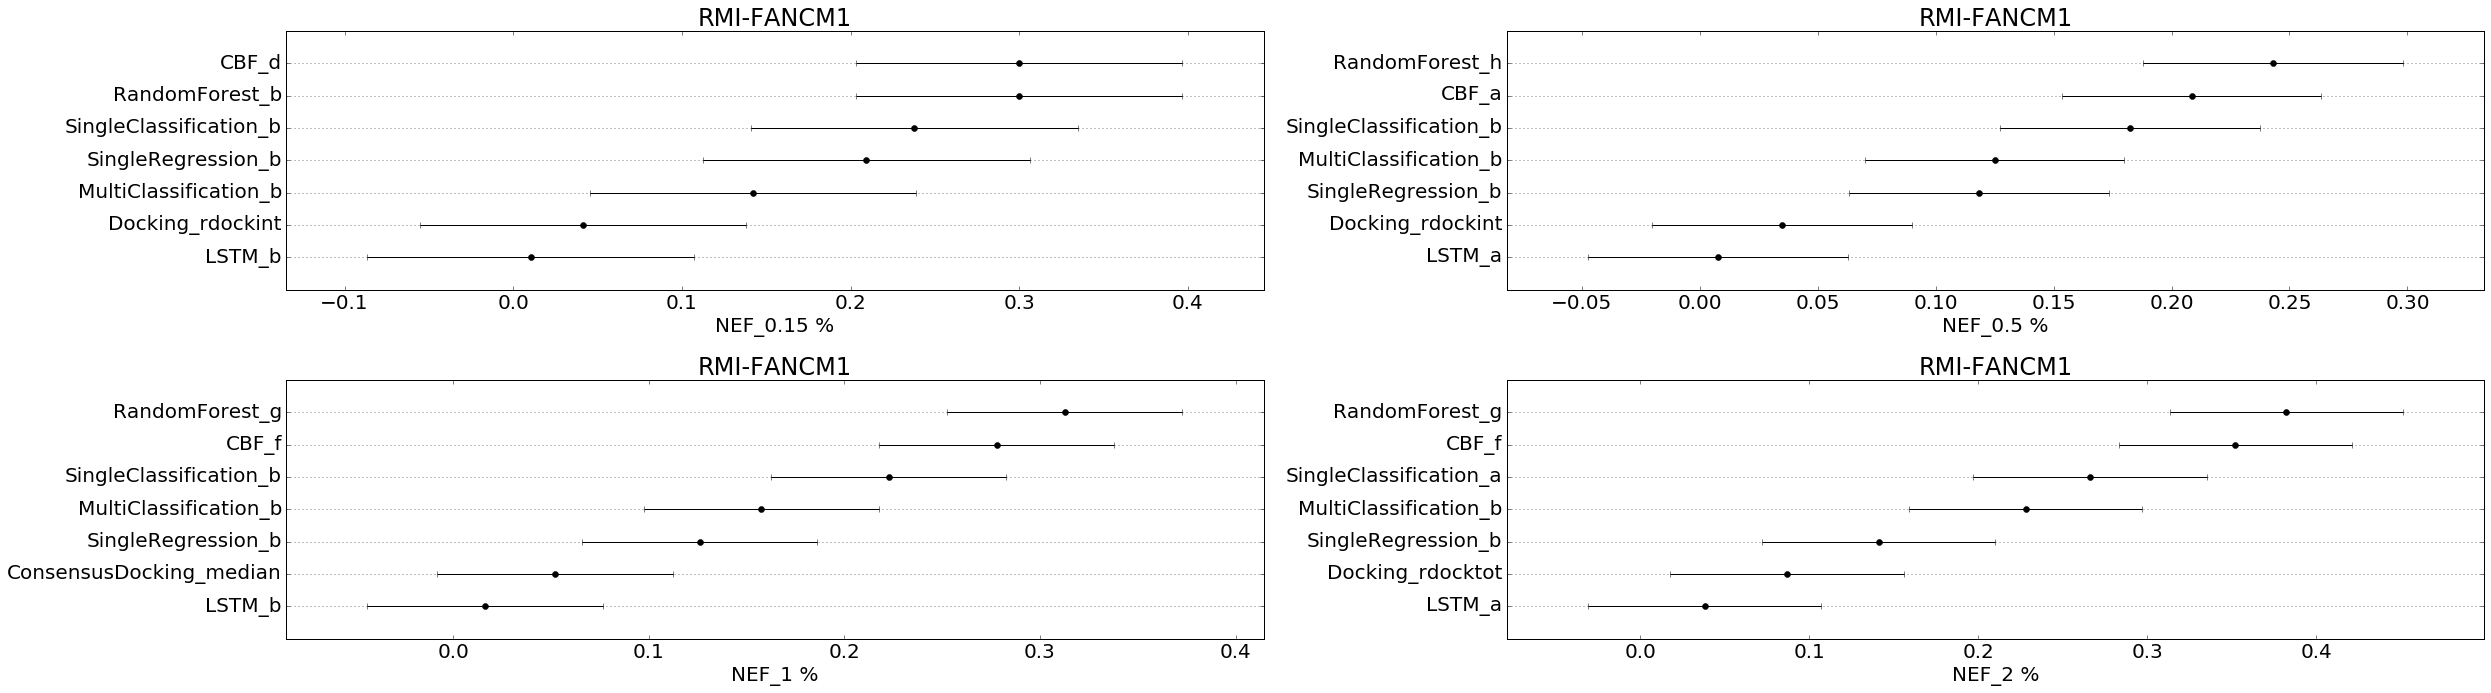

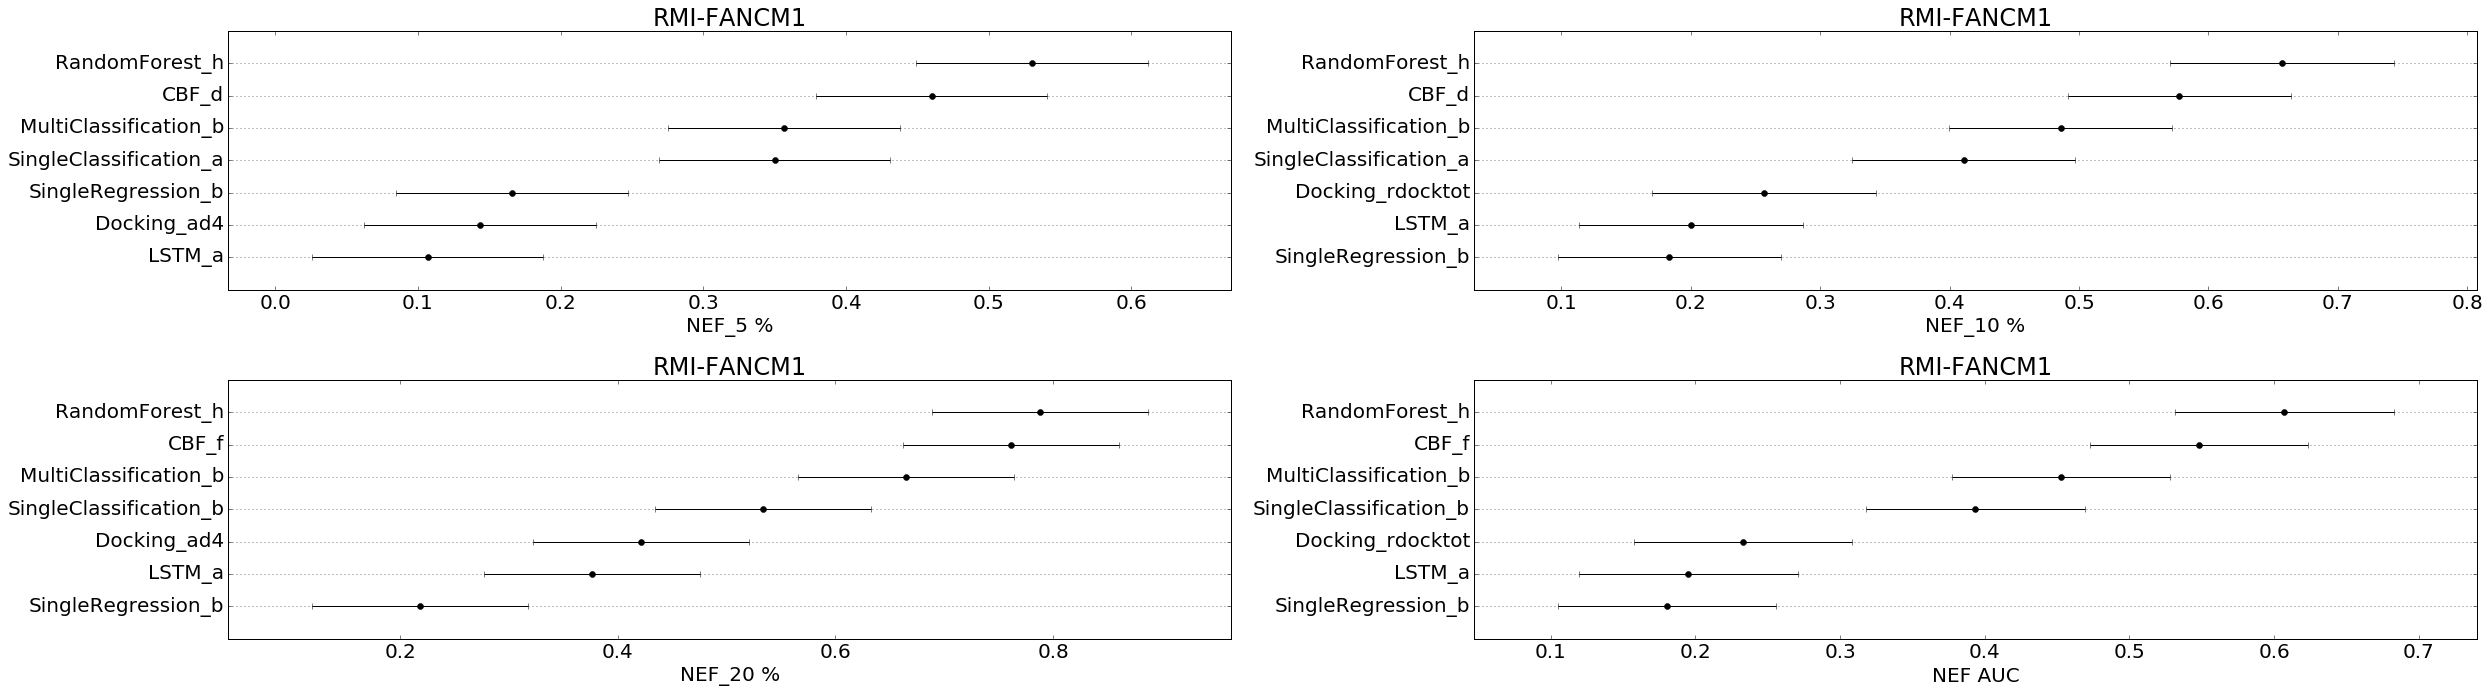

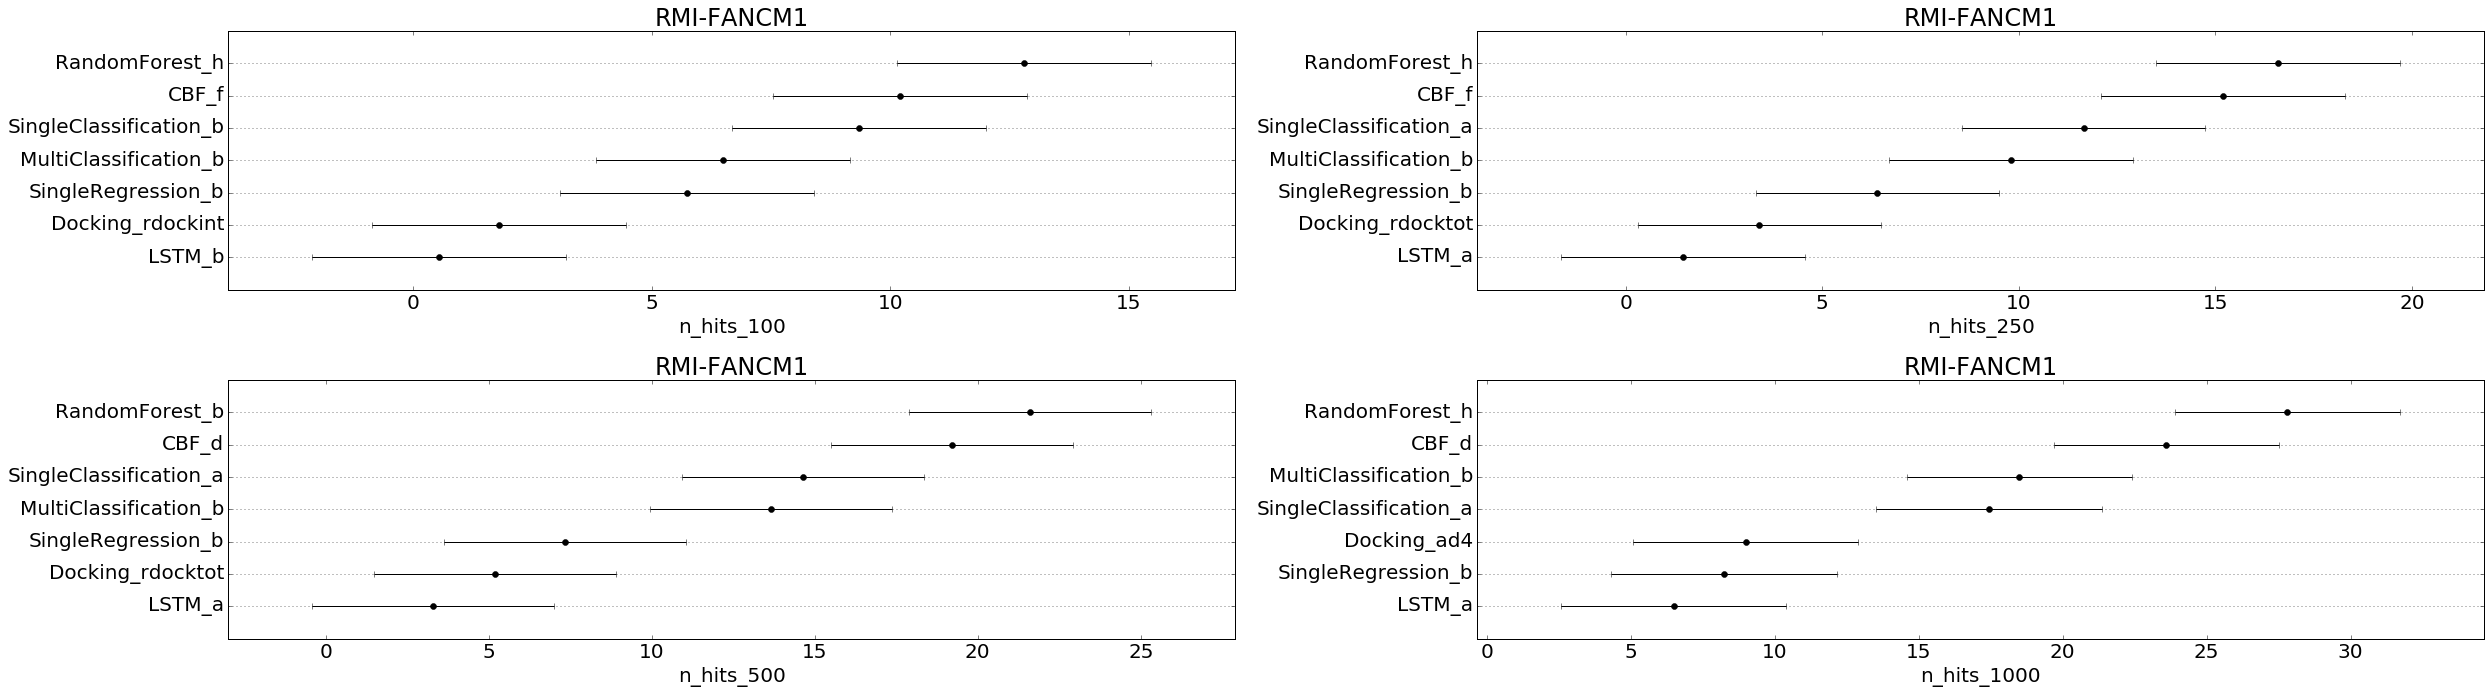

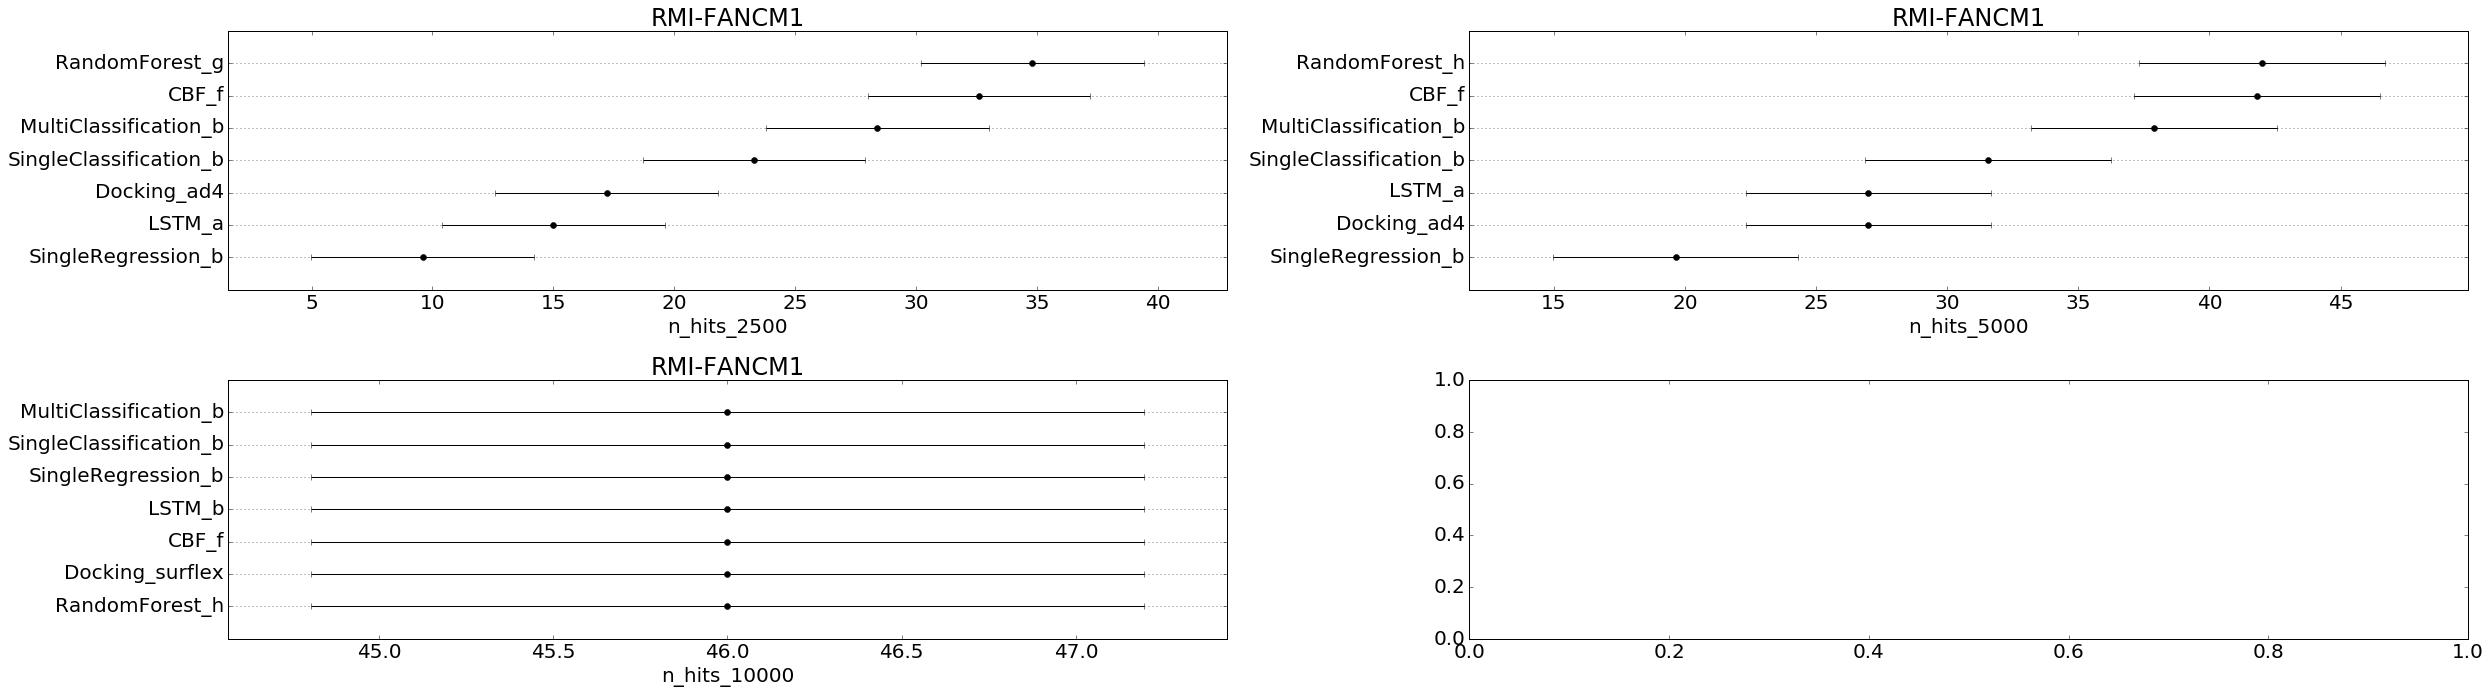

In [12]:
classes_reps = ['']
plot_uconf_grid(tukey_dict, metric_names, labels, save_dir='./cv_ps_figures/cv_uconf_small/', figsize=(35,10), alt=True)

####  The confidence intervals are computed for the 'means' at the 0.05 significance using Tukey's Q critical value, so this confidence interval will capture the true-mean 95% of the time. If confidence intervals don't overlap, then we can conclude there is significance.

[1] Hochberg, Y., and A. C. Tamhane. Multiple Comparison Procedures.
           Hoboken, NJ: John Wiley & Sons, 1987.